# **Prepare Data**

## **Import Library**

In [1]:
# Import library
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

## **Load Data**

In [2]:
# Load Data
path = "../Data Arduino 4 treatment/fixed_formatData.xlsx"
df = pd.read_excel(path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 67.7 KB


## **Checking Outliers**

### **Visualisasi Outliers**

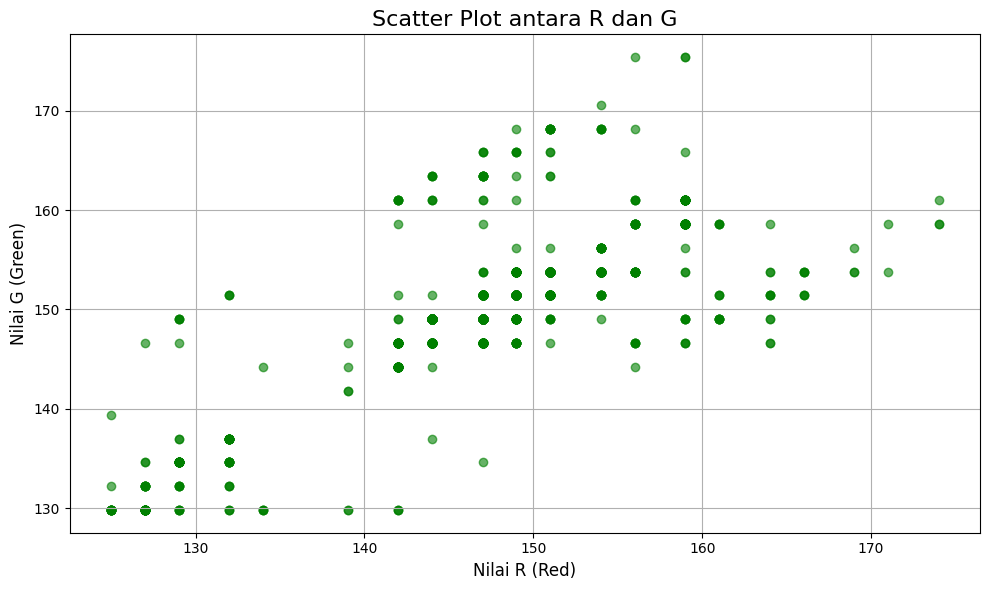

In [4]:
# Scatter plot antara R dan G
plt.figure(figsize=(10, 6))
plt.scatter(df['R'], df['G'], c='green', alpha=0.6)
plt.title("Scatter Plot antara R dan G", fontsize=16)
plt.xlabel("Nilai R (Red)", fontsize=12)
plt.ylabel("Nilai G (Green)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

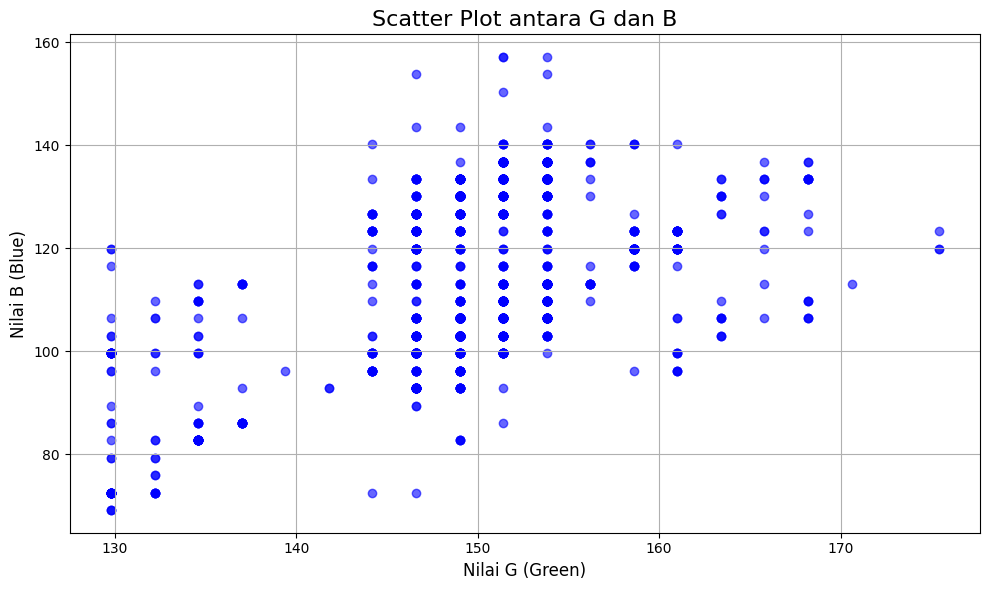

In [5]:
# Scatter plot antara G dan B
plt.figure(figsize=(10, 6))
plt.scatter(df['G'], df['B'], c='blue', alpha=0.6)
plt.title("Scatter Plot antara G dan B", fontsize=16)
plt.xlabel("Nilai G (Green)", fontsize=12)
plt.ylabel("Nilai B (Blue)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

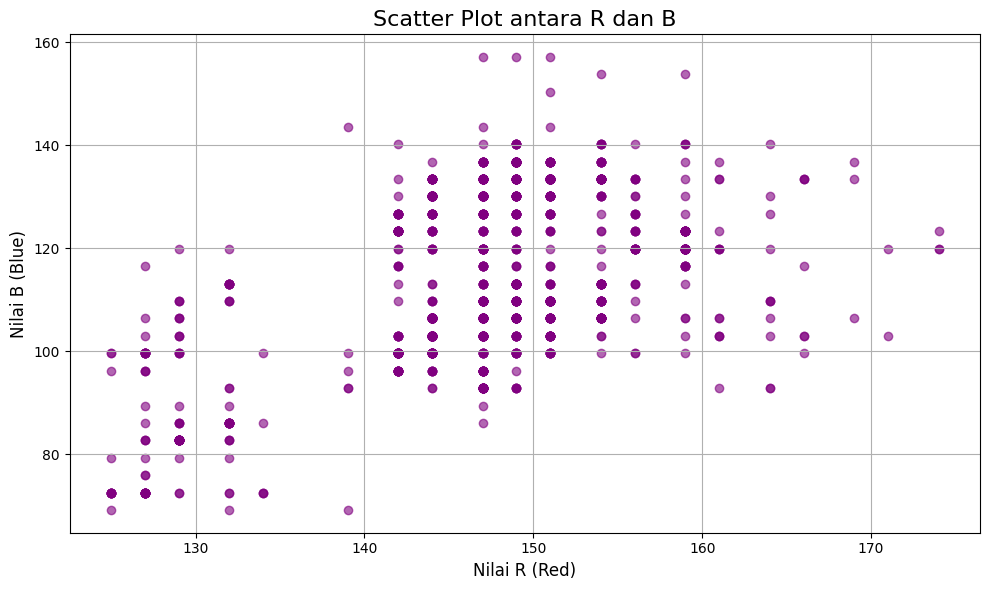

In [6]:
# Scatter plot antara R dan B
plt.figure(figsize=(10, 6))
plt.scatter(df['R'], df['B'], c='purple', alpha=0.6)
plt.title("Scatter Plot antara R dan B", fontsize=16)
plt.xlabel("Nilai R (Red)", fontsize=12)
plt.ylabel("Nilai B (Blue)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

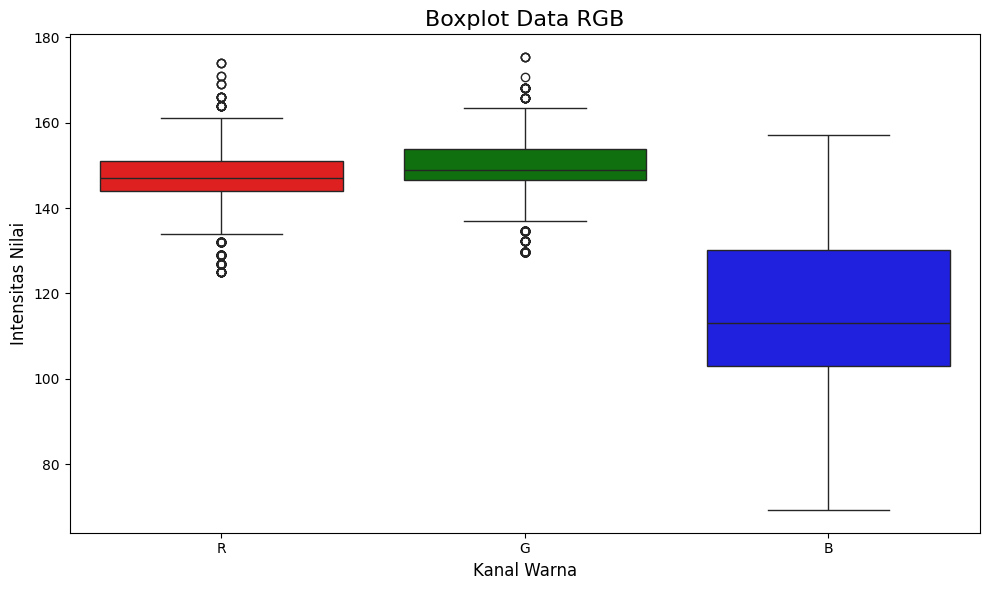

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()


### **Mengatasi Outliers**

In [8]:
# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound), lower_bound, upper_bound

In [9]:
# Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
df_cleaned = df.copy()

# Ubah kolom 'R' menjadi tipe data float
df_cleaned['R'] = df_cleaned['R'].astype(float)

for col in ['R', 'G', 'B']:
    outliers_mask, lower_bound, upper_bound = detect_outliers_iqr(df_cleaned[col])
    
    # Tampilkan data yang merupakan outlier
    outliers_data = df_cleaned.loc[outliers_mask, col]
    print(f"\nOutliers in column '{col}':")
    print(outliers_data)
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    # Ganti nilai outlier
    df_cleaned.loc[outliers_mask, col] = np.where(
        df_cleaned.loc[outliers_mask, col] < lower_bound,
        lower_bound,
        upper_bound
    )


Outliers in column 'R':
33      164.0
55      164.0
73      164.0
254     132.0
255     129.0
        ...  
1215    164.0
1222    171.0
1229    174.0
1257    164.0
1263    164.0
Name: R, Length: 158, dtype: float64
Lower bound: 133.5, Upper bound: 161.5

Outliers in column 'G':
27      165.8
254     132.2
255     129.8
256     132.2
257     132.2
        ...  
1199    165.8
1220    175.4
1241    175.4
1372    165.8
1416    165.8
Name: G, Length: 144, dtype: float64
Lower bound: 135.79999999999995, Upper bound: 164.60000000000002

Outliers in column 'B':
Series([], Name: B, dtype: float64)
Lower bound: 62.45999999999999, Upper bound: 170.62


In [10]:
# # # Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
# df_cleaned = df.copy()

# # Terapkan Winsorization langsung pada kolom R, G, dan B
# df_cleaned['R'] = winsorize(df_cleaned['R'], limits=[0.05, 0.05])
# df_cleaned['G'] = winsorize(df_cleaned['G'], limits=[0.05, 0.05])
# df_cleaned['B'] = winsorize(df_cleaned['B'], limits=[0.05, 0.05])

In [11]:
# # Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
# df_cleaned = df.copy()

# # Menghapus outlier dari salinan DataFrame
# df_cleaned = df_cleaned[~df_cleaned['R'].isin(outliers_R)]
# df_cleaned = df_cleaned[~df_cleaned['G'].isin(outliers_G)]
# df_cleaned = df_cleaned[~df_cleaned['B'].isin(outliers_B)]

# # Menampilkan jumlah data sebelum dan sesudah pembersihan
# print("Jumlah data sebelum pembersihan:", len(df))
# print("Jumlah data setelah pembersihan:", len(df_cleaned))

In [12]:
df_cleaned

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151.0,149.0,106.40,73,0,1
1,151.0,149.0,109.78,73,0,1
2,149.0,149.0,106.40,73,0,1
3,149.0,149.0,130.06,73,0,1
4,149.0,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147.0,151.4,136.82,64,3,4
1437,149.0,153.8,140.20,64,3,4
1438,147.0,153.8,113.16,64,3,4
1439,149.0,153.8,123.30,64,3,4


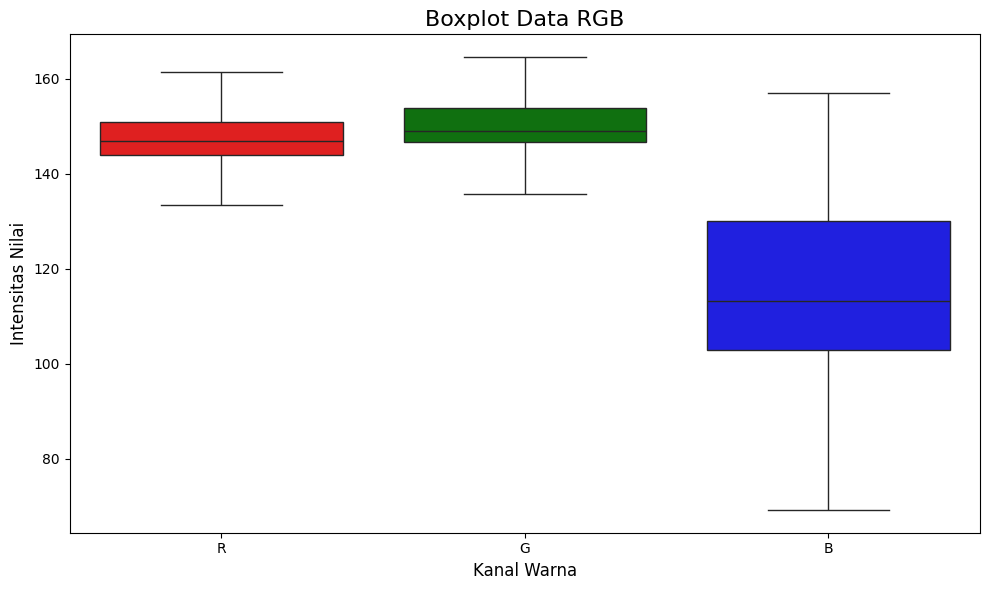

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()

## **Ekstraksi Fitur**

### **Normalisasi Kanal RGB**

In [14]:
def normalize_rgb(df):
    # Salin dataframe
    df_norm = df.copy()
    # Normalisasi kolom R, G, dan B
    df_norm['r'] = df_norm['R'] / 255
    df_norm['g'] = df_norm['G'] / 255
    df_norm['b'] = df_norm['B'] / 255

    return df_norm

In [15]:
df_norm= normalize_rgb(df)
df_norm

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


In [16]:
df_norm_co=normalize_rgb(df_cleaned)
df_norm_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151.0,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151.0,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149.0,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149.0,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149.0,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147.0,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149.0,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147.0,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149.0,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


### **Perbandingan Kanal**

In [17]:
def calculate_ratios(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_rasio = df_norm.copy()

    # Hitung rasio R/G
    df_rasio['R/Gratio'] = df_rasio['R'] / df_rasio['G']

    # Hitung rasio G/B
    df_rasio['G/Bratio'] = df_rasio['G'] / df_rasio['B']

    return df_rasio

In [18]:
df_rasio = calculate_ratios(df_norm)
df_rasio

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


In [19]:
df_rasio_co = calculate_ratios(df_norm_co)
df_rasio_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


### **Mencari Nilai HSV**

In [20]:
def rgb_to_hsv(df):
    # Salin dataframe
    df_hsv = df_rasio.copy()
    
    # Ekstrak kolom r, g, dan b
    r = df_hsv['r']
    g = df_hsv['g']
    b = df_hsv['b']

    # Hitung nilai maksimum (V) dan minimum (m)
    cmax = np.maximum.reduce([r, g, b])
    cmin = np.minimum.reduce([r, g, b])
    delta = cmax - cmin

    # Hitung Hue (H)
    def calculate_hue():
        hue = np.zeros_like(delta)  # Default hue adalah 0
        mask_r_max = (cmax == r) & (delta != 0)
        mask_g_max = (cmax == g) & (delta != 0)
        mask_b_max = (cmax == b) & (delta != 0)

        # Rumus untuk hue jika R adalah maksimum
        hue[mask_r_max] = (60 * ((g[mask_r_max] - b[mask_r_max]) / delta[mask_r_max]) + 360) % 360

        # Rumus untuk hue jika G adalah maksimum
        hue[mask_g_max] = (60 * ((b[mask_g_max] - r[mask_g_max]) / delta[mask_g_max]) + 120) % 360

        # Rumus untuk hue jika B adalah maksimum
        hue[mask_b_max] = (60 * ((r[mask_b_max] - g[mask_b_max]) / delta[mask_b_max]) + 240) % 360

        return hue

    h = calculate_hue()

    # Hitung Saturation (S)
    s = np.where(cmax != 0, delta / cmax, 0)

    # Value (V) adalah nilai maksimum
    v = cmax

    # Tambahkan kolom h, s, dan v ke DataFrame
    df_hsv['H'] = h
    df_hsv['S'] = s
    df_hsv['V'] = v

    return df_hsv

In [21]:
df_hsv = rgb_to_hsv(df_rasio)
df_hsv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


In [22]:
df_hsv_co=rgb_to_hsv(df_rasio_co)
df_hsv_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


### **Mencari Nilai Lab**

#### **Hitung Manual**

In [23]:
def rgb_to_lab(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_lab = df_hsv.copy()

    # Normalisasi RGB ke rentang [0, 1]
    r = df_lab['r']
    g = df_lab['g']
    b = df_lab['b']

    # Koreksi gamma untuk nilai RGB
    def gamma_correction(c):
        return np.where(c > 0.04045, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

    # Terapkan koreksi gamma
    r_linear = gamma_correction(r)
    g_linear = gamma_correction(g)
    b_linear = gamma_correction(b)

    # Transformasi RGB ke XYZ menggunakan matriks standar
    X = 0.4124564 * r_linear + 0.3575761 * g_linear + 0.1804375 * b_linear
    Y = 0.2126729 * r_linear + 0.7151522 * g_linear + 0.0721750 * b_linear
    Z = 0.0193339 * r_linear + 0.1191920 * g_linear + 0.9503041 * b_linear

    # Nilai referensi untuk XYZ (D65/2° standard illuminant)
    Xn, Yn, Zn = 0.95047, 1.0, 1.08883

    # Fungsi untuk menghitung f(t)
    def f(t):
        return np.where(t > 0.008856, t ** (1/3), 7.787 * t + 16/116)

    # Hitung L, a, dan b
    L = 116 * f(Y / Yn) - 16
    a = 500 * (f(X / Xn) - f(Y / Yn))
    b = 200 * (f(Y / Yn) - f(Z / Zn))

    # Tambahkan kolom L, a, dan b ke DataFrame
    df_lab['cL'] = L
    df_lab['ca'] = a
    df_lab['cb'] = b

    return df_lab

In [24]:
df_lab=rgb_to_lab(df_hsv)
df_lab

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


In [25]:
df_lab_co=rgb_to_lab(df_hsv_co)
df_lab_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


#### **Hitung Dengan Library OpenCV**

In [26]:
def rgb_to_lab_with_opencv(df):

    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_cv = df_hsv.copy()

    # Konversi RGB ke LAB menggunakan OpenCV
    rgb_values = df_cv[['R', 'G', 'B']].values.astype(np.uint8)
    rgb_values = rgb_values[:, ::-1]
    lab_values = cv2.cvtColor(rgb_values.reshape(1, -1, 3), cv2.COLOR_BGR2LAB).reshape(-1, 3)

    # Pisahkan nilai L, a, dan b
    L = lab_values[:, 0] * (100 / 255)  # Konversi L ke rentang [0, 100]
    
    # Ubah tipe data a dan b ke float sebelum penggeseran
    a = lab_values[:, 1].astype(float) - 128  # Geser a ke rentang [-128, 127]
    b = lab_values[:, 2].astype(float) - 128  # Geser b ke rentang [-128, 127]

    # Tambahkan kolom cL, ca, dan cb ke DataFrame
    df_cv['cL'] = L
    df_cv['ca'] = a
    df_cv['cb'] = b

    return df_cv

In [27]:
df_cv=rgb_to_lab_with_opencv(df_hsv)
df_cv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.784314,-6.0,23.0
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,61.176471,-6.0,21.0
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.784314,-7.0,23.0
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.176471,-4.0,10.0
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.176471,-8.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.960784,-4.0,7.0
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.745098,-4.0,6.0
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,61.960784,-9.0,20.0
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.352941,-7.0,15.0


In [28]:
df_cv_co=rgb_to_lab_with_opencv(df_hsv_co)
df_cv_co

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.784314,-6.0,23.0
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,61.176471,-6.0,21.0
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.784314,-7.0,23.0
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.176471,-4.0,10.0
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.176471,-8.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.960784,-4.0,7.0
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.745098,-4.0,6.0
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,61.960784,-9.0,20.0
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.352941,-7.0,15.0


# **Seleksi Fitur Gabungan Fitur**

## **Import Library**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
import warnings
import itertools

In [30]:
# Matikan FutureWarning, ConvergenceWarning, dan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## **Mempersiapkan Data**

In [31]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
 6   r                 1441 non-null   float64
 7   g                 1441 non-null   float64
 8   b                 1441 non-null   float64
 9   R/Gratio          1441 non-null   float64
 10  G/Bratio          1441 non-null   float64
 11  H                 1441 non-null   float64
 12  S                 1441 non-null   float64
 13  V                 1441 non-null   float64
 14  cL                1441 non-null   float64
 15  ca                1441 non-null   float64
 16  cb                1441 non-null   float64


### **Membuat Kombinasi Grup**

In [32]:
# Data input
grup_fitur = {
    'RGB': ['R', 'G', 'B'],
    'rgb': ['r', 'g', 'b'],
    'HSV': ['H', 'S', 'V'],
    'CLab': ['cL', 'ca', 'cb'],
    'R/Gratio': ['R/Gratio'],
    'G/Bratio': ['G/Bratio'],
}

# Inisialisasi kamus kombinasi
kombinasi_grup = {}

# Tambahkan semua grup individu terlebih dahulu
for group_name, features in grup_fitur.items():
    kombinasi_grup[group_name] = grup_fitur[group_name]

# Buat set fitur "Full" dengan semua fitur yang digabungkan
all_features = []
for features in grup_fitur.values():
    all_features.extend(features)
kombinasi_grup['Full'] = all_features

# Hasilkan kombinasi dari 2 grup fitur
groups = list(grup_fitur.keys())
for i, j in itertools.combinations(groups, 2):
    combo_name = f"{i}_{j}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j]

# Hasilkan kombinasi dari 3 grup fitur
for i, j, k in itertools.combinations(groups, 3):
    combo_name = f"{i}_{j}_{k}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k]

# Hasilkan kombinasi dari 4 grup fitur
for i, j, k, l in itertools.combinations(groups, 4):
    combo_name = f"{i}_{j}_{k}_{l}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k] + grup_fitur[l]

# Hasilkan kombinasi dari 5 grup fitur
for i, j, k, l, m in itertools.combinations(groups, 5):
    combo_name = f"{i}_{j}_{k}_{l}_{m}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k] + grup_fitur[l] + grup_fitur[m]

### **Membuat Dictionary**

In [33]:
def prepare_data_variasi_fitur(df, kombinasi_grup):
    hasil_split = {}
    hasil_no_split = {}

    for nama_grup, fitur in kombinasi_grup.items():
        X = df[fitur]
        y = df['Perlakuan']

        # Preprocessing data tanpa split untuk ANN: StandardScaler
        scaler_ann = StandardScaler()
        X_ann = scaler_ann.fit_transform(X)

        # Preprocessing data tanpa split untuk AdaBoost SVM: StandardScaler
        scaler_svm = StandardScaler()
        X_svm = scaler_svm.fit_transform(X)

        # Preprocessing data tanpa split untuk AdaBoost DT: Tanpa scaling
        X_dt = X.values

        hasil_no_split[nama_grup] = {
            'X_ann': X_ann,
            'X_svm': X_svm,
            'X_dt': X_dt,
            'y': y,
            'fitur': fitur
        }

        # Membagi data menjadi set pelatihan dan pengujian
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Preprocessing untuk ANN: StandardScaler
        X_train_ann = scaler_ann.fit_transform(X_train)
        X_test_ann = scaler_ann.transform(X_test)

        # Preprocessing untuk AdaBoost SVM: StandardScaler
        X_train_svm = scaler_svm.fit_transform(X_train)
        X_test_svm = scaler_svm.transform(X_test)

        # Preprocessing untuk AdaBoost DT: Tanpa scaling
        X_train_dt = X_train.values
        X_test_dt = X_test.values

        hasil_split[nama_grup] = {
            'X_train_ann': X_train_ann, 'X_test_ann': X_test_ann,
            'X_train_svm': X_train_svm, 'X_test_svm': X_test_svm,
            'X_train_dt': X_train_dt, 'X_test_dt': X_test_dt,
            'y_train': y_train, 'y_test': y_test,
            'fitur': fitur
        }

        print(f"Grup: {nama_grup}")
        print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        print(f"Fitur: {fitur}")
        print(f"Jumlah data training: {X_train.shape[0]}")
        print(f"Jumlah data testing: {X_test.shape[0]}")
        print(f"Jumlah data training ANN: {X_train_ann.shape[0]}")
        print(f"Jumlah data testing ANN: {X_test_ann.shape[0]}")
        print(f"Jumlah data training SVM: {X_train_svm.shape[0]}")
        print(f"Jumlah data testing SVM: {X_test_svm.shape[0]}")
        print(f"Jumlah y_train: {y_train.shape[0]}")
        print(f"Jumlah y_test: {y_test.shape[0]}")

    return hasil_split, hasil_no_split


In [34]:
data_prep, data_prep_cv = prepare_data_variasi_fitur(df_lab, kombinasi_grup)

Grup: RGB
Jumlah fitur yang digunakan: 3
Fitur: ['R', 'G', 'B']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: rgb
Jumlah fitur yang digunakan: 3
Fitur: ['r', 'g', 'b']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: HSV
Jumlah fitur yang digunakan: 3
Fitur: ['H', 'S', 'V']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: CLab
Jumlah fitur yang digunakan: 3
Fitur: ['cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing A

In [35]:
data_prep

{'RGB': {'X_train_ann': array([[ 1.56723454,  1.22336322,  0.34806141],
         [-0.05568036,  0.19057417,  0.13606993],
         [-0.05568036,  2.25615228,  0.56005289],
         ...,
         [-0.05568036, -0.49795187, -1.34787043],
         [ 0.21480545,  0.19057417,  1.62001028],
         [-3.03102435, -2.90779299, -2.6198193 ]]),
  'X_test_ann': array([[-0.46140909, -0.15368885, -0.49990451],
         [ 0.21480545, -0.15368885,  0.77204436],
         [-0.46140909, -0.15368885,  0.98403584],
         ...,
         [ 0.21480545,  0.19057417,  0.13606993],
         [-0.46140909, -0.15368885,  0.98403584],
         [-0.73189491, -0.49795187,  0.56005289]]),
  'X_train_svm': array([[ 1.56723454,  1.22336322,  0.34806141],
         [-0.05568036,  0.19057417,  0.13606993],
         [-0.05568036,  2.25615228,  0.56005289],
         ...,
         [-0.05568036, -0.49795187, -1.34787043],
         [ 0.21480545,  0.19057417,  1.62001028],
         [-3.03102435, -2.90779299, -2.6198193 ]]),
 

In [36]:
data_prep_cv

{'RGB': {'X_ann': array([[ 0.49971716, -0.10202957, -0.48397832],
         [ 0.49971716, -0.10202957, -0.27517211],
         [ 0.24249536, -0.10202957, -0.48397832],
         ...,
         [-0.01472644,  0.56931571, -0.06636589],
         [ 0.24249536,  0.56931571,  0.56005276],
         [ 0.24249536,  0.23364307,  1.60408384]]),
  'X_svm': array([[ 0.49971716, -0.10202957, -0.48397832],
         [ 0.49971716, -0.10202957, -0.27517211],
         [ 0.24249536, -0.10202957, -0.48397832],
         ...,
         [-0.01472644,  0.56931571, -0.06636589],
         [ 0.24249536,  0.56931571,  0.56005276],
         [ 0.24249536,  0.23364307,  1.60408384]]),
  'X_dt': array([[151.  , 149.  , 106.4 ],
         [151.  , 149.  , 109.78],
         [149.  , 149.  , 106.4 ],
         ...,
         [147.  , 153.8 , 113.16],
         [149.  , 153.8 , 123.3 ],
         [149.  , 151.4 , 140.2 ]]),
  'y': 0       0
  1       0
  2       0
  3       0
  4       0
         ..
  1436    3
  1437    3
  1438  

## **Membangun Model**

### **Artiifical Neural Network (ANN)**

####  **Sequential Model**

In [37]:
# def train_ann(X_train, y_train, X_test, y_test, params=None, show_report=False):
#     print("=== Melatih Model ANN dengan Keras ===")
#     from tensorflow.keras.models import Sequential
#     from tensorflow.keras.layers import Dense, Dropout
#     from tensorflow.keras.optimizers import Adam
#     from tensorflow.keras.callbacks import EarlyStopping

#     default_params = {
#         "hidden_layers": [100, 50],
#         "activation": "relu",
#         "output_activation": "softmax",
#         "dropout_rate": 0.0,
#         "learning_rate": 0.001,
#         "loss": "sparse_categorical_crossentropy",
#         "metrics": ["accuracy"],
#         "epochs": 100,
#         "batch_size": 32,
#         "early_stopping": True,
#         "patience": 10,
#         "random_seed": 42
#     }

#     if params:
#         default_params.update(params)

#     import tensorflow as tf
#     tf.random.set_seed(default_params["random_seed"])
#     np.random.seed(default_params["random_seed"])

#     num_classes = len(np.unique(y_train))
#     model = Sequential()
#     model.add(Dense(default_params["hidden_layers"][0], activation=default_params["activation"], input_shape=(X_train.shape[1],)))
#     if default_params["dropout_rate"] > 0:
#         model.add(Dropout(default_params["dropout_rate"]))
#     for units in default_params["hidden_layers"][1:]:
#         model.add(Dense(units, activation=default_params["activation"]))
#         if default_params["dropout_rate"] > 0:
#             model.add(Dropout(default_params["dropout_rate"]))
#     model.add(Dense(num_classes, activation=default_params["output_activation"]))

#     optimizer = Adam(learning_rate=default_params["learning_rate"])
#     model.compile(optimizer=optimizer, loss=default_params["loss"], metrics=default_params["metrics"])

#     callbacks = []
#     if default_params["early_stopping"]:
#         early_stop = EarlyStopping(monitor='val_loss', patience=default_params["patience"], restore_best_weights=True)
#         callbacks.append(early_stop)

#     model.fit(X_train, y_train, epochs=default_params["epochs"], batch_size=default_params["batch_size"],
#               validation_split=0.2, callbacks=callbacks, verbose=0)

#     return model

#### **MLP Sklearn**

In [38]:
def train_ann(X_train, y_train, params=None):
    print("=== Melatih Model ANN ===")

    default_params = {
        "hidden_layer_sizes": (100, 50),
        "activation": "relu",
        "solver": "adam",
        "alpha": 0.0001,
        "learning_rate": "constant",
        "max_iter": 1000,
        "random_state": 42,
        "early_stopping": False,
    }

    if params:
        default_params.update(params)

    ann = MLPClassifier(**default_params)
    ann.fit(X_train, y_train)

    return ann

### **Adaboost Decision Tree**

In [53]:
def train_adaboost_dt(X_train, y_train, params=None):
    print("\n=== Melatih Model AdaBoost dengan Decision Tree ===")

    estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
    default_params = {
        "estimator": estimator,
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    adaboost_dt = AdaBoostClassifier(**default_params)
    adaboost_dt.fit(X_train, y_train)

    return adaboost_dt

### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [40]:
def train_adaboost_svm(X_train, y_train, params=None):
    print("\n=== Melatih Model AdaBoost dengan SVM RBF Kernel ===")

    svc = SVC(kernel='rbf', probability=True, random_state=42)
    default_params = {
        "estimator": svc,
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    adaboost_svm = AdaBoostClassifier(**default_params)
    adaboost_svm.fit(X_train, y_train)

    return adaboost_svm

### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [41]:
def train_bagging_svm(X_train, y_train, params=None):
    print("\n=== Melatih Model Bagging dengan SVM RBF Kernel ===")

    svc = SVC(kernel='rbf', probability=True, random_state=42)
    default_params = {
        "estimator": svc,
        "n_estimators": 50,
        "random_state": 42,
        "n_jobs": -1,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    bagging_svm = BaggingClassifier(**default_params)
    bagging_svm.fit(X_train, y_train)

    return bagging_svm

## **Training dan Evaluasi Model**

### **Fungsi Training, Testing dan Evaluasi Model**

In [42]:
# Daftar fitur lengkap yang digunakan
ALL_FEATURES = [
    'R', 'G', 'B', 'r', 'g', 'b', 
    'R/Gratio', 'G/Bratio', 
    'H', 'S', 'V', 
    'cL', 'ca', 'cb'
]

# Mapping kelompok fitur ke komponen penyusunnya
FEATURE_GROUP_MAP = {
    'RGB': ['R', 'G', 'B'],
    'rgb': ['r', 'g', 'b'],
    'R/Gratio': ['R/Gratio'],
    'G/Bratio': ['G/Bratio'],
    'HSV': ['H', 'S', 'V'],
    'CLab': ['cL', 'ca', 'cb'],
    # tambahkan grup lain jika ada
}


### **Fungsi Metrics Evaluasi**

In [43]:
def metrics_model(model, X, y, set_name="Data", show_report=True):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)
    else:
        y_prob = model.predict(X)

    if len(y_prob.shape) == 2 and y_prob.shape[1] > 1:
        y_pred = np.argmax(y_prob, axis=1)
    else:
        y_pred = (y_prob > 0.5).astype(int).flatten()

    acc = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)

    metrics = {
        "accuracy": acc,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1_score": report['weighted avg']['f1-score']
    }

    if show_report:
        print(f"\n=== Classification Report ({set_name}) ===")
        print(classification_report(y, y_pred))

    return {
        "y_pred": y_pred,
        "y_prob": y_prob,
        "metrics": metrics
    }

### **Fungsi Testing dan Evaluasi Model**

In [44]:
def evaluate_model(feature_groups, model_func, model_name, target_groups=None):
    results = {}
    metrics_data = []

    # Validasi key yang diperlukan
    required_keys = ['X_train_ann', 'X_test_ann', 'X_train_svm', 'X_test_svm', 'X_train_dt', 'X_test_dt', 'y_train', 'y_test']
    for group_name, data in feature_groups.items():
        missing_keys = [key for key in required_keys if key not in data]
        if missing_keys:
            raise ValueError(f"Grup fitur '{group_name}' kehilangan key berikut: {missing_keys}")

    # Mapping untuk preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': ('X_train_ann', 'X_test_ann'),
        'AdaBoost DT': ('X_train_dt', 'X_test_dt'),
        'AdaBoost SVM': ('X_train_svm', 'X_test_svm'),
        'Bagging SVM': ('X_train_svm', 'X_test_svm'),
    }
    
    # Filter grup fitur jika target_groups diberikan
    if target_groups:
        feature_groups = {key: value for key, value in feature_groups.items() if key in target_groups}

    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")
        y_train = data['y_train']
        y_test = data['y_test']

        if model_name in model_preprocessing_map:
            X_train_key, X_test_key = model_preprocessing_map[model_name]
            model = model_func(data[X_train_key], y_train)
            
            train_result = metrics_model(model, data[X_train_key], y_train, "Train", show_report=True)
            test_result = metrics_model(model, data[X_test_key], y_test, "Test", show_report=True)
        else:
            raise ValueError(f"Model {model_name} tidak dikenali.")

        # Simpan hasil evaluasi
        results[group_name] = {
            'model': model_name,
            'train_results': train_result,
            'test_results': test_result,
        }

        # Ekstrak fitur yang dipilih
        if group_name == "Full":
            sorted_features = ALL_FEATURES  # Ambil semua fitur
        else:
            parts = group_name.split('_')
            selected_features = set()

            for part in parts:
                if part in FEATURE_GROUP_MAP:
                    selected_features.update(FEATURE_GROUP_MAP[part])
                elif part in ALL_FEATURES:
                    selected_features.add(part)

            # Urutkan sesuai urutan ALL_FEATURES
            sorted_features = sorted(
                selected_features,
                key=lambda x: ALL_FEATURES.index(x) if x in ALL_FEATURES else float('inf')
            )

        test_acc = test_result['metrics']['accuracy']
        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Train Accuracy': train_result['metrics']['accuracy'],
            'Train Precision': train_result['metrics'].get('precision', 0),
            'Train Recall': train_result['metrics'].get('recall', 0),
            'Train F1-Score': train_result['metrics'].get('f1_score', 0),
            'Test Accuracy': test_acc,
            'Test Precision': test_result['metrics'].get('precision', 0),
            'Test Recall': test_result['metrics'].get('recall', 0),
            'Test F1-Score': test_result['metrics'].get('f1_score', 0),
            'Selected Features': ', '.join(sorted_features),
        })

    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'], 
        ascending=[False, False, False, False]
    ).reset_index(drop=True)

    return results, metrics_df

In [45]:
def evaluate_model_cv(feature_groups, model_func, model_name, n_splits=10, target_groups=None):
    results = {}
    metrics_data = []

    # Validasi key yang diperlukan
    required_keys = ['X_ann', 'X_svm', 'X_dt', 'y']
    for group_name, data in feature_groups.items():
        missing_keys = [key for key in required_keys if key not in data]
        if missing_keys:
            raise ValueError(f"Grup fitur '{group_name}' kehilangan key berikut: {missing_keys}")

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_ann',
        'AdaBoost DT': 'X_dt',
        'AdaBoost SVM': 'X_svm',
        'Bagging SVM': 'X_svm',
    }
    
        # Filter grup fitur jika target_groups diberikan
    if target_groups:
        feature_groups = {key: value for key, value in feature_groups.items() if key in target_groups}

    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")

        # Ambil key preprocessing berdasarkan model
        X_key = model_preprocessing_map[model_name]

        # Ambil data dan label
        X_full = data[X_key]
        y_full = data['y'].values

        # Inisialisasi Stratified K-Fold
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        fold_metrics = {
            'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
            'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []
        }

        # Mulai proses validasi silang
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_full, y_full), 1):
            print(f"Fold {fold}/{n_splits}")

            # Split data train/val
            X_train, X_val = X_full[train_idx], X_full[val_idx]
            y_train, y_val = y_full[train_idx], y_full[val_idx]

            # Latih model
            model = model_func(X_train, y_train)

            # Evaluasi dengan fungsi umum
            train_result = metrics_model(model, X_train, y_train, "Train", show_report=False)
            test_result = metrics_model(model, X_val, y_val, "Validation", show_report=False)

            # Simpan metrik
            fold_metrics['train_accuracy'].append(train_result['metrics']['accuracy'])
            fold_metrics['train_precision'].append(train_result['metrics'].get('precision', 0))
            fold_metrics['train_recall'].append(train_result['metrics'].get('recall', 0))
            fold_metrics['train_f1'].append(train_result['metrics'].get('f1_score', 0))

            fold_metrics['test_accuracy'].append(test_result['metrics']['accuracy'])
            fold_metrics['test_precision'].append(test_result['metrics'].get('precision', 0))
            fold_metrics['test_recall'].append(test_result['metrics'].get('recall', 0))
            fold_metrics['test_f1'].append(test_result['metrics'].get('f1_score', 0))

        # Rata-rata dari semua fold
        avg_metrics = {
            'Train Accuracy': np.mean(fold_metrics['train_accuracy']),
            'Train Precision': np.mean(fold_metrics['train_precision']),
            'Train Recall': np.mean(fold_metrics['train_recall']),
            'Train F1-Score': np.mean(fold_metrics['train_f1']),
            'Test Accuracy': np.mean(fold_metrics['test_accuracy']),
            'Test Precision': np.mean(fold_metrics['test_precision']),
            'Test Recall': np.mean(fold_metrics['test_recall']),
            'Test F1-Score': np.mean(fold_metrics['test_f1']),
        }

        # Simpan model terakhir sebagai representatif
        results[group_name] = {
            'model': model_name,
            'train_results': train_result,
            'test_results': test_result,
        }

        # Ekstrak fitur yang dipilih
        if group_name == "Full":
            sorted_features = ALL_FEATURES  # Ambil semua fitur
        else:
            parts = group_name.split('_')
            selected_features = set()

            for part in parts:
                if part in FEATURE_GROUP_MAP:
                    selected_features.update(FEATURE_GROUP_MAP[part])
                elif part in ALL_FEATURES:
                    selected_features.add(part)

            # Urutkan sesuai urutan ALL_FEATURES
            sorted_features = sorted(
                selected_features,
                key=lambda x: ALL_FEATURES.index(x) if x in ALL_FEATURES else float('inf')
            )

        # Tambahkan ke DataFrame hasil
        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Train Accuracy': avg_metrics['Train Accuracy'],
            'Train Precision': avg_metrics['Train Precision'],
            'Train Recall': avg_metrics['Train Recall'],
            'Train F1-Score': avg_metrics['Train F1-Score'],
            'Test Accuracy': avg_metrics['Test Accuracy'],
            'Test Precision': avg_metrics['Test Precision'],
            'Test Recall': avg_metrics['Test Recall'],
            'Test F1-Score': avg_metrics['Test F1-Score'],
            'Selected Features': ', '.join(sorted_features),
        })

    # Buat DataFrame dan urutkan
    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'], 
        ascending=[False, False, False, False]
    ).reset_index(drop=True)

    return results, metrics_df

### **Artiﬁcial Neural Network (ANN)**

In [46]:
results_ann, metrics_df_ann = evaluate_model(
    data_prep, train_ann, 'ANN'
)


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
=== Melatih Model ANN ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       230
           1       0.71      0.61      0.66       254
           2       0.61      0.85      0.71       284
           3       0.88      0.81      0.84       240

    accuracy                           0.73      1008
   macro avg       0.76      0.73      0.74      1008
weighted avg       0.76      0.73      0.73      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        96
           1       0.66      0.52      0.58       114
           2       0.54      0.82      0.65       106
           3       0.86      0.79      0.83       117

    accuracy                           0.70       433
   macro avg       0.73      0.70      0.70       433
weighted avg       0.73      0

In [47]:
results_ann_cv, metrics_df_ann_cv = evaluate_model_cv(data_prep_cv, train_ann, 'ANN', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: rgb dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: HSV dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== 

#### **Perbandingan Hasil ANN**

In [48]:
metrics_df_ann.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,RGB_rgb_G/Bratio,ANN,0.727183,0.755572,0.727183,0.725913,0.699769,0.731360,0.699769,0.699177,"R, G, B, r, g, b, G/Bratio"
1,RGB_rgb,ANN,0.728175,0.743266,0.728175,0.731506,0.699769,0.720829,0.699769,0.704928,"R, G, B, r, g, b"
2,RGB_rgb_CLab_R/Gratio_G/Bratio,ANN,0.723214,0.750472,0.723214,0.724665,0.697460,0.731170,0.697460,0.699064,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb"
3,RGB,ANN,0.733135,0.755690,0.733135,0.734017,0.697460,0.725733,0.697460,0.699311,"R, G, B"
4,rgb,ANN,0.733135,0.755690,0.733135,0.734017,0.697460,0.725733,0.697460,0.699311,"r, g, b"


In [49]:
metrics_df_ann_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,RGB_rgb_CLab_R/Gratio_G/Bratio,ANN,0.775695,0.786454,0.775695,0.775958,0.726576,0.736081,0.726576,0.725287,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb"
1,RGB_R/Gratio,ANN,0.781864,0.794888,0.781864,0.781821,0.725163,0.740497,0.725163,0.723164,"R, G, B, R/Gratio"
2,rgb_R/Gratio,ANN,0.781864,0.794888,0.781864,0.781821,0.725163,0.740497,0.725163,0.723164,"r, g, b, R/Gratio"
3,RGB_R/Gratio_G/Bratio,ANN,0.779705,0.790070,0.779705,0.779180,0.720321,0.733352,0.720321,0.718650,"R, G, B, R/Gratio, G/Bratio"
4,rgb_R/Gratio_G/Bratio,ANN,0.779705,0.790070,0.779705,0.779180,0.720321,0.733352,0.720321,0.718650,"r, g, b, R/Gratio, G/Bratio"


### **Adaboost Decision Tree**

In [54]:
result_adaboost_dt, metrics_df_adaboost_dt = evaluate_model(
    data_prep, train_adaboost_dt, 'AdaBoost DT'
)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.48      0.62      0.54       230
           1       0.51      0.42      0.46       254
           2       0.69      0.67      0.68       284
           3       0.60      0.57      0.58       240

    accuracy                           0.57      1008
   macro avg       0.57      0.57      0.57      1008
weighted avg       0.58      0.57      0.57      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        96
           1       0.47      0.40      0.43       114
           2       0.50      0.48      0.49       106
           3       0.48      0.42      0.45       117

    accuracy                           0.45       433
   macro avg       0.46      0.45      0.45      

In [55]:
result_adaboost_dt_cv, metrics_df_adaboost_dt_cv = evaluate_model_cv(data_prep_cv, train_adaboost_dt, 'AdaBoost DT', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===
Fold 1/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 2/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 3/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 4/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 5/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 6/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 7/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 8/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 9/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 10/10

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Mengolah Grup Fitur: rgb dengan Model: AdaBoost DT ===
Fold 1/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 2/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 3/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 4/10

=== Melatih Model AdaBoost dengan Decision Tree =

#### **Perbandingan Hasil Adaboost Decision Tree**

In [56]:
metrics_df_adaboost_dt_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,RGB_HSV_R/Gratio,AdaBoost DT,0.695429,0.699610,0.695429,0.694171,0.644646,0.647363,0.644646,0.641907,"R, G, B, R/Gratio, H, S, V"
1,rgb_HSV_R/Gratio,AdaBoost DT,0.695429,0.699610,0.695429,0.694171,0.644646,0.647363,0.644646,0.641907,"r, g, b, R/Gratio, H, S, V"
2,RGB_HSV,AdaBoost DT,0.694888,0.700926,0.694888,0.692570,0.641940,0.646488,0.641940,0.639129,"R, G, B, H, S, V"
3,rgb_HSV,AdaBoost DT,0.694888,0.700926,0.694888,0.692570,0.641940,0.646488,0.641940,0.639129,"r, g, b, H, S, V"
4,rgb_HSV_CLab_G/Bratio,AdaBoost DT,0.703986,0.709993,0.703986,0.702917,0.641940,0.649393,0.641940,0.639709,"r, g, b, G/Bratio, H, S, V, cL, ca, cb"


In [57]:
metrics_df_adaboost_dt.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,HSV_R/Gratio_G/Bratio,AdaBoost DT,0.722222,0.726646,0.722222,0.719564,0.648961,0.656849,0.648961,0.642872,"R/Gratio, G/Bratio, H, S, V"
1,G/Bratio,AdaBoost DT,0.717262,0.717386,0.717262,0.715079,0.642032,0.640801,0.642032,0.634137,G/Bratio
2,rgb_HSV_CLab_R/Gratio,AdaBoost DT,0.669643,0.670612,0.669643,0.667354,0.639723,0.641243,0.639723,0.635537,"r, g, b, R/Gratio, H, S, V, cL, ca, cb"
3,RGB_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb"
4,rgb_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb"


### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [58]:
result_aboost_svm, metrics_df_adaboost_svm = evaluate_model(
    data_prep, train_adaboost_svm, 'AdaBoost SVM'
)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.36      0.24      0.29       230
           1       0.00      0.00      0.00       254
           2       0.27      0.80      0.40       284
           3       0.00      0.00      0.00       240

    accuracy                           0.28      1008
   macro avg       0.16      0.26      0.17      1008
weighted avg       0.16      0.28      0.18      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.32      0.20      0.25        96
           1       0.00      0.00      0.00       114
           2       0.23      0.81      0.36       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.14      0.25      0.15    

In [59]:
result_aboost_svm_cv, metrics_df_adaboost_svm_cv = evaluate_model_cv(data_prep_cv, train_adaboost_svm, 'AdaBoost SVM', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===
Fold 1/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 5/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 6/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 7/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 8/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 9/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 10/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Mengolah Grup Fitur: rgb dengan Model: AdaBoost SVM ===
Fold 1/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model AdaBoost dengan 

#### **Perbandingan Hasil Adaboost SVM Kernel RBF**

In [60]:
metrics_df_adaboost_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,RGB_rgb_R/Gratio_G/Bratio,AdaBoost SVM,0.432958,0.398822,0.432958,0.385489,0.433716,0.402290,0.433716,0.386942,"R, G, B, r, g, b, R/Gratio, G/Bratio"
1,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.430642,0.469670,0.430642,0.402427,0.427495,0.451193,0.427495,0.400986,"R, G, B, r, g, b, R/Gratio, cL, ca, cb"
2,RGB_R/Gratio,AdaBoost SVM,0.429794,0.444169,0.429794,0.392894,0.427486,0.443108,0.427486,0.391326,"R, G, B, R/Gratio"
3,rgb_R/Gratio,AdaBoost SVM,0.426016,0.438541,0.426016,0.385418,0.425402,0.436113,0.425402,0.384184,"r, g, b, R/Gratio"
4,RGB_rgb_CLab,AdaBoost SVM,0.416063,0.458967,0.416063,0.368590,0.406719,0.449880,0.406719,0.361901,"R, G, B, r, g, b, cL, ca, cb"


In [61]:
metrics_df_adaboost_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,RGB_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"R, G, B, G/Bratio, H, S, V, cL, ca, cb"
1,rgb_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"r, g, b, G/Bratio, H, S, V, cL, ca, cb"
2,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.371032,0.282261,0.371032,0.318365,0.339492,0.245313,0.339492,0.281323,"R, G, B, r, g, b, R/Gratio, cL, ca, cb"
3,RGB_rgb_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.367063,0.286588,0.367063,0.315653,0.321016,0.265885,0.321016,0.278389,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb"
4,rgb_CLab_R/Gratio,AdaBoost SVM,0.377976,0.607018,0.377976,0.334607,0.309469,0.555051,0.309469,0.291367,"r, g, b, R/Gratio, cL, ca, cb"


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [62]:
result_bagging_svm, metrics_df_bagging_svm = evaluate_model(
    data_prep, train_bagging_svm, 'Bagging SVM'
)


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       230
           1       0.52      0.53      0.53       254
           2       0.51      0.68      0.58       284
           3       0.87      0.65      0.74       240

    accuracy                           0.62      1008
   macro avg       0.66      0.62      0.63      1008
weighted avg       0.65      0.62      0.63      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        96
           1       0.43      0.39      0.41       114
           2       0.39      0.59      0.47       106
           3       0.91      0.62      0.73       117

    accuracy                           0.56       433
   macro avg       0.61      0.57      0.58      

In [63]:
result_bagging_svm_cv, metrics_df_bagging_svm_cv = evaluate_model_cv(data_prep_cv, train_bagging_svm, 'Bagging SVM', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===
Fold 1/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 5/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 6/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 7/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 8/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 9/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 10/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Mengolah Grup Fitur: rgb dengan Model: Bagging SVM ===
Fold 1/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model Bagging dengan SVM RBF Kernel =

#### **Perbandingan Hasil Bagging SVM Kernel RBF**

In [64]:
metrics_df_bagging_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.635824,0.678146,0.635824,0.644369,0.609976,0.650239,0.609976,0.617230,"R, G, B, r, g, b, R/Gratio, G/Bratio"
1,RGB_rgb_CLab_R/Gratio,Bagging SVM,0.630581,0.671761,0.630581,0.638452,0.602347,0.644259,0.602347,0.609268,"R, G, B, r, g, b, R/Gratio, cL, ca, cb"
2,RGB_rgb_G/Bratio,Bagging SVM,0.623642,0.663793,0.623642,0.631861,0.600963,0.643042,0.600963,0.608971,"R, G, B, r, g, b, G/Bratio"
3,RGB_R/Gratio_G/Bratio,Bagging SVM,0.633742,0.674569,0.633742,0.643153,0.600963,0.642927,0.600963,0.610245,"R, G, B, R/Gratio, G/Bratio"
4,rgb_R/Gratio_G/Bratio,Bagging SVM,0.633742,0.674569,0.633742,0.643153,0.600963,0.642927,0.600963,0.610245,"r, g, b, R/Gratio, G/Bratio"


In [65]:
metrics_df_bagging_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,RGB_rgb_R/Gratio,Bagging SVM,0.638889,0.667027,0.638889,0.642798,0.588915,0.635178,0.588915,0.597493,"R, G, B, r, g, b, R/Gratio"
1,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.634921,0.665895,0.634921,0.643037,0.575058,0.618535,0.575058,0.587649,"R, G, B, r, g, b, R/Gratio, G/Bratio"
2,RGB_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"R, G, B, R/Gratio"
3,rgb_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"r, g, b, R/Gratio"
4,RGB_rgb_CLab_R/Gratio,Bagging SVM,0.628968,0.660001,0.628968,0.636970,0.568129,0.612435,0.568129,0.581220,"R, G, B, r, g, b, R/Gratio, cL, ca, cb"


# **Seleksi Fitur Algoritma**

## **Import Library**

In [66]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, SelectFromModel, mutual_info_classif
from sklearn.base import clone

## **Membuat Dictionary**

In [67]:
def prepare_data(df):
    # Memilih kolom yang akan digunakan sebagai fitur
    feature_columns = [col for col in df.columns if col not in ['Pengambilan', 'IR_Intensity (%)', 'Perlakuan']]
    
    # Memilih fitur dan target
    X = df[feature_columns]
    y = df['Perlakuan']
    
    # Preprocessing data tanpa split untuk setiap model
    scaler_ann_no_split = StandardScaler()
    X_ann_no_split = scaler_ann_no_split.fit_transform(X)
    
    scaler_svm_no_split = StandardScaler()
    X_svm_no_split = scaler_svm_no_split.fit_transform(X)
    
    X_dt_no_split = X.values  # Data tanpa scaling untuk AdaBoost DT
    
    # Membagi data menjadi set pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Preprocessing data yang telah di-split untuk setiap model
    scaler_ann_split = StandardScaler()
    X_train_ann_split = scaler_ann_split.fit_transform(X_train)
    X_test_ann_split = scaler_ann_split.transform(X_test)
    
    scaler_svm_split = StandardScaler()
    X_train_svm_split = scaler_svm_split.fit_transform(X_train)
    X_test_svm_split = scaler_svm_split.transform(X_test)
    
    X_train_dt_split = X_train.values  # Data tanpa scaling untuk AdaBoost DT
    X_test_dt_split = X_test.values
    
    # Hasil data tanpa split
    hasil_no_split = {
        'X_ann': X_ann_no_split,
        'X_svm': X_svm_no_split,
        'X_dt': X_dt_no_split,
        'y': y,
        'feature_columns': feature_columns
    }
    
    # Hasil data yang telah di-split
    hasil_split = {
        'X_train_ann': X_train_ann_split, 'X_test_ann': X_test_ann_split,
        'X_train_svm': X_train_svm_split, 'X_test_svm': X_test_svm_split,
        'X_train_dt': X_train_dt_split, 'X_test_dt': X_test_dt_split,
        'y_train': y_train, 'y_test': y_test,
        'feature_columns': feature_columns
    }
    
    print(f"Jumlah fitur yang digunakan: {len(feature_columns)}")
    print(f"Fitur yang digunakan: {feature_columns}")
    print(f"Jumlah data training: {X_train.shape[0]}")
    print(f"Jumlah data testing: {X_test.shape[0]}")
    
    return hasil_split, hasil_no_split


In [68]:
# Menggunakan fungsi prepare_data untuk menyiapkan data
data_prep_selection, data_prep_selection_cv = prepare_data(df_lab)

Jumlah fitur yang digunakan: 14
Fitur yang digunakan: ['R', 'G', 'B', 'r', 'g', 'b', 'R/Gratio', 'G/Bratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433


## **Membuat Fungsi Seleksi Fitur**

In [69]:
def generic_feature_selection(data_prep, method='pca', model_prefix='ann',
                              n_components=8, threshold=0.01, n_features=10):

    data_selected = {k: v for k, v in data_prep.items()}

    # Cari label: prioritaskan y_train, lalu y
    y_train = data_prep.get('y_train', data_prep.get('y', None))
    if y_train is None:
        raise KeyError("Label 'y_train' atau 'y' tidak ditemukan dalam data_prep")

    # Ambil semua key bertipe fitur (mulai dengan 'X_')
    x_keys = [k for k in data_prep if k.startswith('X_')]
    if not x_keys:
        raise KeyError("Tidak ditemukan key fitur yang dimulai dengan 'X_' di data_prep")

    def get_feature_names(X_data):
        """Ambil nama fitur dari metadata atau dataframe"""
        if 'feature_columns' in data_prep:
            return data_prep['feature_columns']
        elif isinstance(X_data, pd.DataFrame):
            return X_data.columns.tolist()
        else:
            return [f"feature_{i}" for i in range(X_data.shape[1])]

    selected_features = []

    # Loop setiap key fitur dan lakukan feature selection
    for x_key in x_keys:
        X_data_orig = data_prep[x_key]
        feature_names = get_feature_names(X_data_orig)

        if method == 'pca':
            selector = PCA(n_components=n_components)
            X_data = selector.fit_transform(X_data_orig)
            selected_features = [f"pca_component_{i}" for i in range(n_components)]

        elif method == 'selectkbest':
            skb = SelectKBest(score_func=f_classif, k=n_features)
            X_data = skb.fit_transform(X_data_orig, y_train)
            mask = skb.get_support()
            selected_features = [feature_names[i] for i, val in enumerate(mask) if val]

        elif method == 'mutual_info':
            skb = SelectKBest(score_func=mutual_info_classif, k=n_features)
            X_data = skb.fit_transform(X_data_orig, y_train)
            mask = skb.get_support()
            selected_features = [feature_names[i] for i, val in enumerate(mask) if val]

        elif method == 'variance':
            sel = VarianceThreshold(threshold=threshold)
            X_data = sel.fit_transform(X_data_orig)
            mask = sel.get_support()
            selected_features = [feature_names[i] for i, val in enumerate(mask) if val]

        elif method == 'sft':
            base = DecisionTreeClassifier(max_depth=3)
            ab = AdaBoostClassifier(estimator=base, n_estimators=50)
            sfm = SelectFromModel(clone(ab), threshold=threshold).fit(X_data_orig, y_train)
            X_data = sfm.transform(X_data_orig)
            mask = sfm.get_support()
            selected_features = [feature_names[i] for i, val in enumerate(mask) if val]

        else:
            raise ValueError(f"Metode '{method}' tidak didukung")

        # Buat key baru agar tidak menimpa data asli
        new_key = x_key.replace('X_', f'X_{model_prefix}_')
        data_selected[new_key] = X_data

    # Simpan informasi tambahan
    data_selected[f'selected_features_{model_prefix}'] = selected_features
    data_selected[f'feature_selection_method_{model_prefix}'] = method

    return data_selected

In [70]:
feature_selection_functions = {
    'ANN': lambda dp, **kwargs: generic_feature_selection(dp, model_prefix='ann', **kwargs),
    'AdaBoost DT': lambda dp, **kwargs: generic_feature_selection(dp, model_prefix='adt', **kwargs),
    'AdaBoost SVM': lambda dp, **kwargs: generic_feature_selection(dp, model_prefix='absvm', **kwargs),
    'Bagging SVM': lambda dp, **kwargs: generic_feature_selection(dp, model_prefix='bagsvm', **kwargs)
}

In [71]:
model_name_to_func = {
    'ANN': train_ann,
    'AdaBoost DT': train_adaboost_dt,
    'AdaBoost SVM': train_adaboost_svm,
    'Bagging SVM': train_bagging_svm
}

## **Mencari Fitur Terbaik**

### **Inisiasi Parameter**

In [72]:
selection_methods_by_model = {
    'ANN': [
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 14)]},
        {'method': 'selectkbest', 'params': [{'n_features': i} for i in range(3, 14)]},
        {'method': 'variance', 'params': [{'threshold': t} for t in [0.001, 0.005, 0.01, 0.02, 0.05]]}
    ],
    'AdaBoost DT': [
        {'method': 'sft', 'params': [{'threshold': t} for t in [0.001, 0.005, 0.01, 0.02, 0.05]]},
        {'method': 'selectkbest', 'params': [{'n_features': i} for i in range(3, 14)]},
        {'method': 'variance', 'params': [{'threshold': t} for t in [0.001, 0.005, 0.01, 0.02, 0.05]]}
    ],
    'AdaBoost SVM': [
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 14)]},
        {'method': 'selectkbest', 'params': [{'n_features': i} for i in range(3, 14)]},
        {'method': 'variance', 'params': [{'threshold': t} for t in [0.001, 0.005, 0.01, 0.02, 0.05]]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 14)]}
    ],
    'Bagging SVM': [
        {'method': 'selectkbest', 'params': [{'n_features': i} for i in range(3, 14)]},
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 14)]},
        {'method': 'variance', 'params': [{'threshold': t} for t in [0.001, 0.005, 0.01, 0.02, 0.05]]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 14)]}
    ]
}


### **Seleksi Fitur Masing-Masing Model**

#### **Fungsi Seleksi**

In [73]:
def multi_selection_feature(
    data_prep,
    selection_methods_by_model,     # dict: {'ANN': [...], 'AdaBoost DT': [...]}
    feature_selection_functions,    # dict: {'ANN': ann_feature_selection, ...}
    model_name_to_func,             # dict: {'ANN': train_ann, ...}
    evaluate_function               # fungsi evaluasi seperti evaluate_single_model
):
    results_per_model = {}
    metrics_per_model = {}

    # Mapping antara model_key dan key selected_features di data_selected
    feature_key_map = {
        'ANN': 'selected_features_ann',
        'AdaBoost DT': 'selected_features_adt',
        'AdaBoost SVM': 'selected_features_absvm',
        'Bagging SVM': 'selected_features_bagsvm'
    }

    for model_key in model_name_to_func.keys():
        print(f"\n\n=== Memulai Seleksi Fitur untuk Model: {model_key} ===")

        if model_key not in selection_methods_by_model:
            print(f"[Error] Tidak ada metode seleksi fitur untuk model '{model_key}'")
            continue

        all_results = {}
        metrics_list = []

        method_configs = selection_methods_by_model[model_key]

        for method_config in method_configs:
            method = method_config['method']
            param_list = method_config['params']  # list of dicts

            for params in param_list:
                full_params = {'method': method, **params}

                # Ambil fungsi seleksi fitur
                feature_selection_func = feature_selection_functions.get(model_key)
                if not feature_selection_func:
                    print(f"[Error] Fungsi seleksi fitur tidak ditemukan untuk model '{model_key}'")
                    continue

                # Jalankan seleksi fitur
                try:
                    data_selected = feature_selection_func(data_prep.copy(), **full_params)
                except Exception as e:
                    print(f"[Error] Pada metode '{full_params}': {str(e)}")
                    continue

                # Buat nama grup unik
                param_desc = "_".join([f"{k}-{v}" for k, v in params.items()])
                group_name = f"{model_key.upper()}_{method.upper()}_{param_desc}"

                # Evaluasi model
                train_func = model_name_to_func[model_key]
                result, metrics = evaluate_function({group_name: data_selected}, train_func, model_key)

                # Ambil selected features menggunakan mapping
                key = feature_key_map.get(model_key)
                selected_features = data_selected.get(key) if key else None

                # Simpan hasil dan metrics
                all_results[group_name] = result[group_name]
                metrics_data = metrics.to_dict(orient='records')[0]
                metrics_data['Selected Features'] = (
                    ', '.join(selected_features)
                    if isinstance(selected_features, list)
                    else '(tidak tersedia)'
                )
                metrics_list.append(metrics_data)

        # Simpan hasil per model
        results_per_model[model_key] = all_results
        if metrics_list:
            metrics_per_model[model_key] = pd.DataFrame(metrics_list)
        else:
            metrics_per_model[model_key] = pd.DataFrame()

    return results_per_model, metrics_per_model

#### **Perbandingan Hasil Seleksi Fitur**

In [74]:
results_fs, metrics_fs = multi_selection_feature(
    data_prep=data_prep_selection,
    selection_methods_by_model=selection_methods_by_model,
    feature_selection_functions=feature_selection_functions,
    model_name_to_func=model_name_to_func,
    evaluate_function=evaluate_model
)



=== Memulai Seleksi Fitur untuk Model: ANN ===

=== Mengolah Grup Fitur: ANN_PCA_n_components-3 dengan Model: ANN ===
=== Melatih Model ANN ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       230
           1       0.79      0.60      0.68       254
           2       0.66      0.85      0.74       284
           3       0.86      0.82      0.84       240

    accuracy                           0.75      1008
   macro avg       0.77      0.75      0.75      1008
weighted avg       0.76      0.75      0.75      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        96
           1       0.76      0.53      0.62       114
           2       0.59      0.81      0.69       106
           3       0.85      0.78      0.81       117

    accuracy                           0.71       433
   macro avg    

In [75]:
results_fs_cv, metrics_fs_cv = multi_selection_feature(
    data_prep=data_prep_selection_cv,
    selection_methods_by_model=selection_methods_by_model,
    feature_selection_functions=feature_selection_functions,
    model_name_to_func=model_name_to_func,
    evaluate_function=evaluate_model_cv
)



=== Memulai Seleksi Fitur untuk Model: ANN ===

=== Mengolah Grup Fitur: ANN_PCA_n_components-3 dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: ANN_PCA_n_components-4 dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: ANN_PCA_n_components-5 dengan Model: ANN ===
Fold 1/10
=== Me

In [76]:
def extract_best_results(results, metrics, model_name):
    best_result = results.get(model_name)
    best_metric = metrics.get(model_name)
    if best_metric is not None:
        best_metric = best_metric.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'], 
        ascending=[False, False, False, False]
    ).reset_index(drop=True)
    return best_result, best_metric

# Penggunaan
results_fs_ann, metrics_fs_ann = extract_best_results(results_fs, metrics_fs, 'ANN')
results_fs_adaboost_dt, metrics_fs_adaboost_dt = extract_best_results(results_fs, metrics_fs, 'AdaBoost DT')
results_fs_adaboost_svm, metrics_fs_adaboost_svm = extract_best_results(results_fs, metrics_fs, 'AdaBoost SVM')
results_fs_bagging_svm, metrics_fs_bagging_svm = extract_best_results(results_fs, metrics_fs, 'Bagging SVM')

results_fs_ann_cv, metrics_fs_ann_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'ANN')
results_fs_adaboost_dt_cv, metrics_fs_adaboost_dt_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'AdaBoost DT')
results_fs_adaboost_svm_cv, metrics_fs_adaboost_svm_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'AdaBoost SVM')
results_fs_bagging_svm_cv, metrics_fs_bagging_svm_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'Bagging SVM')

In [77]:
metrics_fs_ann_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,ANN_PCA_n_components-3,ANN,0.782944,0.791941,0.782944,0.782897,0.712701,0.721889,0.712701,0.71213,"pca_component_0, pca_component_1, pca_component_2"
1,ANN_PCA_n_components-4,ANN,0.782944,0.791941,0.782944,0.782897,0.712701,0.721889,0.712701,0.71213,"pca_component_0, pca_component_1, pca_componen..."
2,ANN_PCA_n_components-5,ANN,0.782944,0.791941,0.782944,0.782897,0.712701,0.721889,0.712701,0.71213,"pca_component_0, pca_component_1, pca_componen..."
3,ANN_PCA_n_components-6,ANN,0.782944,0.791941,0.782944,0.782897,0.712701,0.721889,0.712701,0.71213,"pca_component_0, pca_component_1, pca_componen..."
4,ANN_PCA_n_components-7,ANN,0.782944,0.791941,0.782944,0.782897,0.712701,0.721889,0.712701,0.71213,"pca_component_0, pca_component_1, pca_componen..."


In [78]:
metrics_fs_ann.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,ANN_PCA_n_components-3,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_component_2"
1,ANN_PCA_n_components-4,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen..."
2,ANN_PCA_n_components-5,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen..."
3,ANN_PCA_n_components-6,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen..."
4,ANN_PCA_n_components-7,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen..."


In [79]:
metrics_fs_adaboost_dt_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,ADABOOST DT_SFT_threshold-0.001,AdaBoost DT,0.69697,0.706196,0.69697,0.697086,0.637773,0.6491,0.637773,0.637754,"R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,..."
1,ADABOOST DT_SFT_threshold-0.005,AdaBoost DT,0.69697,0.706196,0.69697,0.697086,0.637773,0.6491,0.637773,0.637754,"R, G, B, r, b, R/Gratio, G/Bratio, H, S, V, cL..."
2,ADABOOST DT_SFT_threshold-0.01,AdaBoost DT,0.69697,0.706196,0.69697,0.697086,0.637773,0.6491,0.637773,0.637754,"R, G, r, g, b, R/Gratio, G/Bratio, H, S, V, cL..."
3,ADABOOST DT_SFT_threshold-0.02,AdaBoost DT,0.69697,0.706196,0.69697,0.697086,0.637773,0.6491,0.637773,0.637754,"r, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb"
4,ADABOOST DT_SFT_threshold-0.05,AdaBoost DT,0.69697,0.706196,0.69697,0.697086,0.637773,0.6491,0.637773,0.637754,"R/Gratio, H, cL, ca, cb"


In [80]:
metrics_fs_adaboost_dt.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,ADABOOST DT_VARIANCE_threshold-0.001,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, G, B, r, b, G/Bratio, H, S, cL, ca, cb"
1,ADABOOST DT_VARIANCE_threshold-0.005,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, G, B, G/Bratio, H, S, cL, ca, cb"
2,ADABOOST DT_VARIANCE_threshold-0.01,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, G, B, G/Bratio, H, cL, ca, cb"
3,ADABOOST DT_VARIANCE_threshold-0.02,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, G, B, G/Bratio, H, cL, ca, cb"
4,ADABOOST DT_VARIANCE_threshold-0.05,AdaBoost DT,0.672619,0.689679,0.672619,0.676471,0.579677,0.587016,0.579677,0.580954,"R, G, B, H, cL, ca, cb"


In [81]:
metrics_fs_adaboost_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,ADABOOST SVM_MUTUAL_INFO_n_features-3,AdaBoost SVM,0.386842,0.378839,0.386842,0.320269,0.377572,0.352553,0.377572,0.314265,"G/Bratio, S, cL"
1,ADABOOST SVM_MUTUAL_INFO_n_features-4,AdaBoost SVM,0.386842,0.378839,0.386842,0.320269,0.377572,0.352553,0.377572,0.314265,"R/Gratio, G/Bratio, H, cL"
2,ADABOOST SVM_MUTUAL_INFO_n_features-5,AdaBoost SVM,0.386842,0.378839,0.386842,0.320269,0.377572,0.352553,0.377572,0.314265,"R/Gratio, G/Bratio, H, S, cL"
3,ADABOOST SVM_MUTUAL_INFO_n_features-6,AdaBoost SVM,0.386842,0.378839,0.386842,0.320269,0.377572,0.352553,0.377572,0.314265,"R/Gratio, G/Bratio, H, cL, ca, cb"
4,ADABOOST SVM_MUTUAL_INFO_n_features-7,AdaBoost SVM,0.386842,0.378839,0.386842,0.320269,0.377572,0.352553,0.377572,0.314265,"R/Gratio, G/Bratio, H, S, cL, ca, cb"


In [82]:
metrics_fs_adaboost_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,ADABOOST SVM_VARIANCE_threshold-0.001,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R, G, B, r, b, G/Bratio, H, S, cL, ca, cb"
1,ADABOOST SVM_VARIANCE_threshold-0.005,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R, G, B, G/Bratio, H, S, cL, ca, cb"
2,ADABOOST SVM_VARIANCE_threshold-0.01,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R, G, B, G/Bratio, H, cL, ca, cb"
3,ADABOOST SVM_VARIANCE_threshold-0.02,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R, G, B, G/Bratio, H, cL, ca, cb"
4,ADABOOST SVM_VARIANCE_threshold-0.05,AdaBoost SVM,0.320437,0.172416,0.320437,0.223408,0.235566,0.124713,0.235566,0.159282,"R, G, B, H, cL, ca, cb"


In [83]:
metrics_fs_bagging_svm_cv.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,BAGGING SVM_SELECTKBEST_n_features-3,Bagging SVM,0.633126,0.672112,0.633126,0.6421,0.594033,0.632997,0.594033,0.602522,"R, r, cL"
1,BAGGING SVM_SELECTKBEST_n_features-4,Bagging SVM,0.633126,0.672112,0.633126,0.6421,0.594033,0.632997,0.594033,0.602522,"R, r, g, cL"
2,BAGGING SVM_SELECTKBEST_n_features-5,Bagging SVM,0.633126,0.672112,0.633126,0.6421,0.594033,0.632997,0.594033,0.602522,"R, G, r, g, cL"
3,BAGGING SVM_SELECTKBEST_n_features-6,Bagging SVM,0.633126,0.672112,0.633126,0.6421,0.594033,0.632997,0.594033,0.602522,"R, G, r, g, V, cL"
4,BAGGING SVM_SELECTKBEST_n_features-7,Bagging SVM,0.633126,0.672112,0.633126,0.6421,0.594033,0.632997,0.594033,0.602522,"R, G, r, g, b, V, cL"


In [84]:
metrics_fs_bagging_svm.head(5)

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features
0,BAGGING SVM_VARIANCE_threshold-0.001,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R, G, B, r, b, G/Bratio, H, S, cL, ca, cb"
1,BAGGING SVM_VARIANCE_threshold-0.005,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R, G, B, G/Bratio, H, S, cL, ca, cb"
2,BAGGING SVM_VARIANCE_threshold-0.01,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R, G, B, G/Bratio, H, cL, ca, cb"
3,BAGGING SVM_VARIANCE_threshold-0.02,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R, G, B, G/Bratio, H, cL, ca, cb"
4,BAGGING SVM_VARIANCE_threshold-0.05,Bagging SVM,0.626984,0.65849,0.626984,0.635917,0.554273,0.593569,0.554273,0.566293,"R, G, B, H, cL, ca, cb"


# **Fitur Terbaik Tiap Model**

## **Import Library**

## **Menggabungkan Dataframe Evaluasi**

In [85]:
def model_to_tune(evaluasi_klasifikasi, evaluasi_seleksi_fitur):
    # Membuat salinan dari DataFrame inputan
    df_a= evaluasi_klasifikasi.copy()
    df_b= evaluasi_seleksi_fitur.copy()
    
    # Menambahkan kolom untuk membedakan sumber data
    df_a['Sumber'] = 'Gabungan Fitur'
    df_b['Sumber'] = 'Algoritma'
    
    # emnggabungkan hasil evaluasi klasifikasi dan seleksi fitur
    df_gabungan = pd.concat([df_a, df_b], ignore_index=True)
    
    # Isi selected features untuk feature group "Full" dengan ALL_FEATURES
    df_gabungan.loc[df_gabungan['Feature Group'] == 'Full', 'Selected Features'] = ', '.join(ALL_FEATURES)
    
     # Menghitung jumlah fitur dari kolom Selected Features
    df_gabungan['Jumlah Fitur'] = df_gabungan['Selected Features'].apply(
        lambda x: len(x.split(',')) if isinstance(x, str) and x.strip() else 0
    )
    
    # Sorting berdasarkan Test Accuracy (descending),pression, kemudian Recall, lalu F1-Score, lalu jumlah fitur (ascending)
    df_gabungan = df_gabungan.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 'Jumlah Fitur'],
        ascending=[False, False, False, False, True]
    ).reset_index(drop=True)
    df_gabungan.reset_index(drop=True, inplace=True)
    
    return df_gabungan

In [86]:
df_ann = model_to_tune(
    metrics_df_ann, metrics_fs_ann
    )

df_ann


,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,ANN_PCA_n_components-3,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_component_2",Algoritma,3
1,ANN_PCA_n_components-4,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen...",Algoritma,4
2,ANN_PCA_n_components-5,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen...",Algoritma,5
3,ANN_PCA_n_components-6,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen...",Algoritma,6
4,ANN_PCA_n_components-7,ANN,0.751984,0.762711,0.751984,0.750756,0.709007,0.727109,0.709007,0.707759,"pca_component_0, pca_component_1, pca_componen...",Algoritma,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,HSV,ANN,0.665675,0.697379,0.665675,0.671191,0.605081,0.659878,0.605081,0.614445,"H, S, V",Gabungan Fitur,3
75,CLab_R/Gratio_G/Bratio,ANN,0.689484,0.735914,0.689484,0.695530,0.591224,0.663149,0.591224,0.600789,"R/Gratio, G/Bratio, cL, ca, cb",Gabungan Fitur,5
76,R/Gratio_G/Bratio,ANN,0.504960,0.513606,0.504960,0.501404,0.498845,0.521490,0.498845,0.504854,"R/Gratio, G/Bratio",Gabungan Fitur,2
77,G/Bratio,ANN,0.434524,0.408668,0.434524,0.409327,0.436490,0.448687,0.436490,0.418820,G/Bratio,Gabungan Fitur,1


In [87]:
df_ann_cv = model_to_tune(
    metrics_df_ann_cv, metrics_fs_ann_cv
)

In [88]:
df_ann_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,RGB_rgb_CLab_R/Gratio_G/Bratio,ANN,0.775695,0.786454,0.775695,0.775958,0.726576,0.736081,0.726576,0.725287,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",Gabungan Fitur,11
1,RGB_R/Gratio,ANN,0.781864,0.794888,0.781864,0.781821,0.725163,0.740497,0.725163,0.723164,"R, G, B, R/Gratio",Gabungan Fitur,4
2,rgb_R/Gratio,ANN,0.781864,0.794888,0.781864,0.781821,0.725163,0.740497,0.725163,0.723164,"r, g, b, R/Gratio",Gabungan Fitur,4
3,RGB_R/Gratio_G/Bratio,ANN,0.779705,0.790070,0.779705,0.779180,0.720321,0.733352,0.720321,0.718650,"R, G, B, R/Gratio, G/Bratio",Gabungan Fitur,5
4,rgb_R/Gratio_G/Bratio,ANN,0.779705,0.790070,0.779705,0.779180,0.720321,0.733352,0.720321,0.718650,"r, g, b, R/Gratio, G/Bratio",Gabungan Fitur,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,HSV_CLab_G/Bratio,ANN,0.779552,0.789433,0.779552,0.779297,0.702270,0.713955,0.702270,0.701796,"G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,7
86,HSV_G/Bratio,ANN,0.780013,0.788226,0.780013,0.780190,0.700891,0.712674,0.700891,0.700269,"G/Bratio, H, S, V",Gabungan Fitur,4
87,R/Gratio_G/Bratio,ANN,0.608220,0.615821,0.608220,0.608193,0.557945,0.568999,0.557945,0.556492,"R/Gratio, G/Bratio",Gabungan Fitur,2
88,R/Gratio,ANN,0.516309,0.526318,0.516309,0.518670,0.503084,0.513107,0.503084,0.504200,R/Gratio,Gabungan Fitur,1


In [89]:
df_adaboost_dt = model_to_tune(
    metrics_df_adaboost_dt, metrics_fs_adaboost_dt
    )

df_adaboost_dt

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,HSV_R/Gratio_G/Bratio,AdaBoost DT,0.722222,0.726646,0.722222,0.719564,0.648961,0.656849,0.648961,0.642872,"R/Gratio, G/Bratio, H, S, V",Gabungan Fitur,5
1,G/Bratio,AdaBoost DT,0.717262,0.717386,0.717262,0.715079,0.642032,0.640801,0.642032,0.634137,G/Bratio,Gabungan Fitur,1
2,rgb_HSV_CLab_R/Gratio,AdaBoost DT,0.669643,0.670612,0.669643,0.667354,0.639723,0.641243,0.639723,0.635537,"r, g, b, R/Gratio, H, S, V, cL, ca, cb",Gabungan Fitur,10
3,RGB_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,11
4,rgb_HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.729167,0.729253,0.729167,0.728223,0.639723,0.637680,0.639723,0.637081,"r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,RGB_rgb_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.647817,0.659619,0.647817,0.651389,0.519630,0.525541,0.519630,0.520849,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",Gabungan Fitur,11
64,HSV_CLab_R/Gratio_G/Bratio,AdaBoost DT,0.644841,0.658315,0.644841,0.646242,0.510393,0.516578,0.510393,0.508509,"R/Gratio, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,8
65,RGB,AdaBoost DT,0.571429,0.576365,0.571429,0.570556,0.450346,0.457554,0.450346,0.450659,"R, G, B",Gabungan Fitur,3
66,rgb,AdaBoost DT,0.571429,0.576365,0.571429,0.570556,0.450346,0.457554,0.450346,0.450659,"r, g, b",Gabungan Fitur,3


In [90]:
df_adaboost_dt_cv = model_to_tune(
    metrics_df_adaboost_dt_cv, metrics_fs_adaboost_dt_cv
    )
df_adaboost_dt_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,RGB_HSV_R/Gratio,AdaBoost DT,0.695429,0.699610,0.695429,0.694171,0.644646,0.647363,0.644646,0.641907,"R, G, B, R/Gratio, H, S, V",Gabungan Fitur,7
1,rgb_HSV_R/Gratio,AdaBoost DT,0.695429,0.699610,0.695429,0.694171,0.644646,0.647363,0.644646,0.641907,"r, g, b, R/Gratio, H, S, V",Gabungan Fitur,7
2,RGB_HSV,AdaBoost DT,0.694888,0.700926,0.694888,0.692570,0.641940,0.646488,0.641940,0.639129,"R, G, B, H, S, V",Gabungan Fitur,6
3,rgb_HSV,AdaBoost DT,0.694888,0.700926,0.694888,0.692570,0.641940,0.646488,0.641940,0.639129,"r, g, b, H, S, V",Gabungan Fitur,6
4,rgb_HSV_CLab_G/Bratio,AdaBoost DT,0.703986,0.709993,0.703986,0.702917,0.641940,0.649393,0.641940,0.639709,"r, g, b, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,HSV_R/Gratio_G/Bratio,AdaBoost DT,0.678156,0.681889,0.678156,0.676166,0.598190,0.604460,0.598190,0.593635,"R/Gratio, G/Bratio, H, S, V",Gabungan Fitur,5
80,CLab_R/Gratio,AdaBoost DT,0.671679,0.679123,0.671679,0.672178,0.592634,0.601503,0.592634,0.592358,"R/Gratio, cL, ca, cb",Gabungan Fitur,4
81,RGB,AdaBoost DT,0.622636,0.628593,0.622636,0.619545,0.586379,0.594463,0.586379,0.582520,"R, G, B",Gabungan Fitur,3
82,rgb,AdaBoost DT,0.622636,0.628593,0.622636,0.619545,0.586379,0.594456,0.586379,0.582610,"r, g, b",Gabungan Fitur,3


In [91]:
df_adaboost_svm = model_to_tune(
    metrics_df_adaboost_svm, metrics_fs_adaboost_svm
    )

df_adaboost_svm

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,RGB_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"R, G, B, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,10
1,rgb_HSV_CLab_G/Bratio,AdaBoost SVM,0.402778,0.641080,0.402778,0.377514,0.348730,0.594148,0.348730,0.350332,"r, g, b, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,10
2,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.371032,0.282261,0.371032,0.318365,0.339492,0.245313,0.339492,0.281323,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",Gabungan Fitur,10
3,RGB_rgb_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.367063,0.286588,0.367063,0.315653,0.321016,0.265885,0.321016,0.278389,"R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb",Gabungan Fitur,11
4,rgb_CLab_R/Gratio,AdaBoost SVM,0.377976,0.607018,0.377976,0.334607,0.309469,0.555051,0.309469,0.291367,"r, g, b, R/Gratio, cL, ca, cb",Gabungan Fitur,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,RGB_rgb_CLab,AdaBoost SVM,0.320437,0.398771,0.320437,0.225961,0.235566,0.123632,0.235566,0.159445,"R, G, B, r, g, b, cL, ca, cb",Gabungan Fitur,9
75,HSV_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.319444,0.170787,0.319444,0.222420,0.235566,0.123401,0.235566,0.159345,"R/Gratio, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,8
76,HSV_CLab,AdaBoost SVM,0.319444,0.289773,0.319444,0.224003,0.235566,0.122959,0.235566,0.159154,"H, S, V, cL, ca, cb",Gabungan Fitur,6
77,HSV_R/Gratio_G/Bratio,AdaBoost SVM,0.318452,0.170347,0.318452,0.221731,0.235566,0.122748,0.235566,0.159064,"R/Gratio, G/Bratio, H, S, V",Gabungan Fitur,5


In [92]:
df_adaboost_svm_cv = model_to_tune(
    metrics_df_adaboost_svm_cv, metrics_fs_adaboost_svm_cv
    )
df_adaboost_svm_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,RGB_rgb_R/Gratio_G/Bratio,AdaBoost SVM,0.432958,0.398822,0.432958,0.385489,0.433716,0.402290,0.433716,0.386942,"R, G, B, r, g, b, R/Gratio, G/Bratio",Gabungan Fitur,8
1,RGB_rgb_CLab_R/Gratio,AdaBoost SVM,0.430642,0.469670,0.430642,0.402427,0.427495,0.451193,0.427495,0.400986,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",Gabungan Fitur,10
2,RGB_R/Gratio,AdaBoost SVM,0.429794,0.444169,0.429794,0.392894,0.427486,0.443108,0.427486,0.391326,"R, G, B, R/Gratio",Gabungan Fitur,4
3,rgb_R/Gratio,AdaBoost SVM,0.426016,0.438541,0.426016,0.385418,0.425402,0.436113,0.425402,0.384184,"r, g, b, R/Gratio",Gabungan Fitur,4
4,RGB_rgb_CLab,AdaBoost SVM,0.416063,0.458967,0.416063,0.368590,0.406719,0.449880,0.406719,0.361901,"R, G, B, r, g, b, cL, ca, cb",Gabungan Fitur,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,HSV_CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.318373,0.431732,0.318373,0.255535,0.306030,0.423329,0.306030,0.245358,"R/Gratio, G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,8
97,HSV_CLab_R/Gratio,AdaBoost SVM,0.312207,0.369071,0.312207,0.240512,0.303281,0.361093,0.303281,0.236212,"R/Gratio, H, S, V, cL, ca, cb",Gabungan Fitur,7
98,CLab_R/Gratio,AdaBoost SVM,0.306658,0.380222,0.306658,0.229853,0.295618,0.306501,0.295618,0.219456,"R/Gratio, cL, ca, cb",Gabungan Fitur,4
99,CLab_R/Gratio_G/Bratio,AdaBoost SVM,0.299489,0.421321,0.299489,0.220722,0.289330,0.273322,0.289330,0.205460,"R/Gratio, G/Bratio, cL, ca, cb",Gabungan Fitur,5


In [93]:
df_bagging_svm = model_to_tune(
    metrics_df_bagging_svm, metrics_fs_bagging_svm
    )

df_bagging_svm

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,RGB_rgb_R/Gratio,Bagging SVM,0.638889,0.667027,0.638889,0.642798,0.588915,0.635178,0.588915,0.597493,"R, G, B, r, g, b, R/Gratio",Gabungan Fitur,7
1,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.634921,0.665895,0.634921,0.643037,0.575058,0.618535,0.575058,0.587649,"R, G, B, r, g, b, R/Gratio, G/Bratio",Gabungan Fitur,8
2,RGB_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"R, G, B, R/Gratio",Gabungan Fitur,4
3,rgb_R/Gratio,Bagging SVM,0.626984,0.653951,0.626984,0.633154,0.572748,0.613044,0.572748,0.582618,"r, g, b, R/Gratio",Gabungan Fitur,4
4,RGB_rgb_CLab_R/Gratio,Bagging SVM,0.628968,0.660001,0.628968,0.636970,0.568129,0.612435,0.568129,0.581220,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",Gabungan Fitur,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CLab,Bagging SVM,0.592262,0.628590,0.592262,0.603248,0.533487,0.578410,0.533487,0.546475,"cL, ca, cb",Gabungan Fitur,3
75,HSV_CLab_G/Bratio,Bagging SVM,0.604167,0.641971,0.604167,0.616241,0.531178,0.575120,0.531178,0.545884,"G/Bratio, H, S, V, cL, ca, cb",Gabungan Fitur,7
76,R/Gratio_G/Bratio,Bagging SVM,0.497024,0.532329,0.497024,0.492792,0.443418,0.490561,0.443418,0.454160,"R/Gratio, G/Bratio",Gabungan Fitur,2
77,G/Bratio,Bagging SVM,0.436508,0.403651,0.436508,0.399255,0.404157,0.422880,0.404157,0.386360,G/Bratio,Gabungan Fitur,1


In [94]:
df_bagging_svm_cv = model_to_tune(
    metrics_df_bagging_svm_cv, metrics_fs_bagging_svm_cv
    )
df_bagging_svm_cv

,Feature Group,Model,Train Accuracy,Train Precision,Train Recall,Train F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Selected Features,Sumber,Jumlah Fitur
0,RGB_rgb_R/Gratio_G/Bratio,Bagging SVM,0.635824,0.678146,0.635824,0.644369,0.609976,0.650239,0.609976,0.617230,"R, G, B, r, g, b, R/Gratio, G/Bratio",Gabungan Fitur,8
1,RGB_rgb_CLab_R/Gratio,Bagging SVM,0.630581,0.671761,0.630581,0.638452,0.602347,0.644259,0.602347,0.609268,"R, G, B, r, g, b, R/Gratio, cL, ca, cb",Gabungan Fitur,10
2,RGB_rgb_G/Bratio,Bagging SVM,0.623642,0.663793,0.623642,0.631861,0.600963,0.643042,0.600963,0.608971,"R, G, B, r, g, b, G/Bratio",Gabungan Fitur,7
3,RGB_R/Gratio_G/Bratio,Bagging SVM,0.633742,0.674569,0.633742,0.643153,0.600963,0.642927,0.600963,0.610245,"R, G, B, R/Gratio, G/Bratio",Gabungan Fitur,5
4,rgb_R/Gratio_G/Bratio,Bagging SVM,0.633742,0.674569,0.633742,0.643153,0.600963,0.642927,0.600963,0.610245,"r, g, b, R/Gratio, G/Bratio",Gabungan Fitur,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,HSV_R/Gratio,Bagging SVM,0.600278,0.625429,0.600278,0.606424,0.560718,0.588029,0.560718,0.566656,"R/Gratio, H, S, V",Gabungan Fitur,4
97,HSV_R/Gratio_G/Bratio,Bagging SVM,0.593878,0.621332,0.593878,0.602034,0.559334,0.588892,0.559334,0.566614,"R/Gratio, G/Bratio, H, S, V",Gabungan Fitur,5
98,R/Gratio_G/Bratio,Bagging SVM,0.489397,0.503385,0.489397,0.489662,0.468410,0.483383,0.468410,0.467480,"R/Gratio, G/Bratio",Gabungan Fitur,2
99,G/Bratio,Bagging SVM,0.438969,0.437070,0.438969,0.424310,0.433027,0.431469,0.433027,0.415709,G/Bratio,Gabungan Fitur,1


## **Menyimpan Dataframe Evaluasi**

In [96]:
# Direktori output
output_dir_metrics = '../Ipynb/metrics/'
output_dir_data = '../Data Arduino 4 treatment/'

# Fungsi untuk menyimpan DataFrame ke file CSV
def save_csv(dataframes, directory):
    for df, filename in dataframes:
        filepath = f"{directory}{filename}"
        df.to_csv(filepath, index=False)
        print(f"Saved: {filepath}")

# DataFrames untuk disimpan ke direktori metrics
metrics_dfs = [
    (df_ann, 'df_ann.csv'),
    (df_adaboost_dt, 'df_adaboost_dt.csv'),
    (df_adaboost_svm, 'df_adaboost_svm.csv'),
    (df_bagging_svm, 'df_bagging_svm.csv'),
    (df_ann_cv, 'df_ann_cv.csv'),
    (df_adaboost_dt_cv, 'df_adaboost_dt_cv.csv'),
    (df_adaboost_svm_cv, 'df_adaboost_svm_cv.csv'),
    (df_bagging_svm_cv, 'df_bagging_svm_cv.csv'),
    (metrics_df_ann, 'metrics_df_ann.csv'),
    (metrics_df_adaboost_dt, 'metrics_df_adaboost_dt.csv'),
    (metrics_df_adaboost_svm, 'metrics_df_adaboost_svm.csv'),
    (metrics_df_bagging_svm, 'metrics_df_bagging_svm.csv'),
    (metrics_df_ann_cv, 'metrics_df_ann_cv.csv'),
    (metrics_df_adaboost_dt_cv, 'metrics_df_adaboost_dt_cv.csv'),
    (metrics_df_adaboost_svm_cv, 'metrics_df_adaboost_svm_cv.csv'),
    (metrics_df_bagging_svm_cv, 'metrics_df_bagging_svm_cv.csv'),
    (metrics_fs_ann, 'metrics_fs_ann.csv'),
    (metrics_fs_adaboost_dt, 'metrics_fs_adaboost_dt.csv'),
    (metrics_fs_adaboost_svm, 'metrics_fs_adaboost_svm.csv'),
    (metrics_fs_bagging_svm, 'metrics_fs_bagging_svm.csv'),
    (metrics_fs_ann_cv, 'metrics_fs_ann_cv.csv'),
    (metrics_fs_adaboost_dt_cv, 'metrics_fs_adaboost_dt_cv.csv'),
    (metrics_fs_adaboost_svm_cv, 'metrics_fs_adaboost_svm_cv.csv'),
    (metrics_fs_bagging_svm_cv, 'metrics_fs_bagging_svm_cv.csv'),
]

# DataFrames untuk disimpan ke direktori data
data_dfs = [
    (df_lab, 'df_lab.csv'),
    (df_lab_co, 'df_lab_co.csv'),
]

# Gabungkan semua file ke dalam satu proses penyimpanan
save_csv(metrics_dfs, output_dir_metrics)
save_csv(data_dfs, output_dir_data)

Saved: ../Ipynb/metrics/df_ann.csv
Saved: ../Ipynb/metrics/df_adaboost_dt.csv
Saved: ../Ipynb/metrics/df_adaboost_svm.csv
Saved: ../Ipynb/metrics/df_bagging_svm.csv
Saved: ../Ipynb/metrics/df_ann_cv.csv
Saved: ../Ipynb/metrics/df_adaboost_dt_cv.csv
Saved: ../Ipynb/metrics/df_adaboost_svm_cv.csv
Saved: ../Ipynb/metrics/df_bagging_svm_cv.csv
Saved: ../Ipynb/metrics/metrics_df_ann.csv
Saved: ../Ipynb/metrics/metrics_df_adaboost_dt.csv
Saved: ../Ipynb/metrics/metrics_df_adaboost_svm.csv
Saved: ../Ipynb/metrics/metrics_df_bagging_svm.csv
Saved: ../Ipynb/metrics/metrics_df_ann_cv.csv
Saved: ../Ipynb/metrics/metrics_df_adaboost_dt_cv.csv
Saved: ../Ipynb/metrics/metrics_df_adaboost_svm_cv.csv
Saved: ../Ipynb/metrics/metrics_df_bagging_svm_cv.csv
Saved: ../Ipynb/metrics/metrics_fs_ann.csv
Saved: ../Ipynb/metrics/metrics_fs_adaboost_dt.csv
Saved: ../Ipynb/metrics/metrics_fs_adaboost_svm.csv
Saved: ../Ipynb/metrics/metrics_fs_bagging_svm.csv
Saved: ../Ipynb/metrics/metrics_fs_ann_cv.csv
Saved: ..

## **Menyimpan Result Seleksi Fitur**

In [102]:
def save_multiple_dicts(data_dicts, directory='../Ipynb/Results/'):
    # Pastikan direktori ada
    os.makedirs(directory, exist_ok=True)
    
    for data, filename in data_dicts:
        filepath = os.path.join(directory, filename)
        joblib.dump(data, filepath)
        print(f"Saved: {filepath}")



# Daftar data dan file
data_to_save = [
    (results_ann, 'results_ann.pkl'),
    (result_adaboost_dt, 'results_adaboost_dt.pkl'),
    (result_aboost_svm, 'results_adaboost_svm.pkl'),
    (result_bagging_svm, 'results_bagging_svm.pkl'),
    (results_ann_cv, 'results_ann_cv.pkl'),
    (result_adaboost_dt_cv, 'results_adaboost_dt_cv.pkl'),
    (result_aboost_svm_cv, 'results_aboost_svm_cv.pkl'),
    (result_bagging_svm_cv, 'results_bagging_svm_cv.pkl'),
    (results_fs, 'results_fs.pkl'),
    (results_fs_cv, 'results_fs_cv.pkl'),
    (results_fs_ann, 'results_fs_ann.pkl'),
    (results_fs_adaboost_dt, 'results_fs_adaboost_dt.pkl'),
    (results_fs_adaboost_svm, 'results_fs_adaboost_svm.pkl'),
    (results_fs_bagging_svm, 'results_fs_bagging_svm.pkl'),
    (results_fs_ann_cv, 'results_fs_ann_cv.pkl'),
    (results_fs_adaboost_dt_cv, 'results_fs_adaboost_dt_cv.pkl'),
    (results_fs_adaboost_svm_cv, 'results_fs_adaboost_svm_cv.pkl'),
    (results_fs_bagging_svm_cv, 'results_fs_bagging_svm_cv.pkl')
]
    
# Simpan semua file ke direktori results/
save_multiple_dicts(data_to_save, directory='../Ipynb/Results/')

Saved: ../Ipynb/Results/results_ann.pkl
Saved: ../Ipynb/Results/results_adaboost_dt.pkl
Saved: ../Ipynb/Results/results_adaboost_svm.pkl
Saved: ../Ipynb/Results/results_bagging_svm.pkl
Saved: ../Ipynb/Results/results_ann_cv.pkl
Saved: ../Ipynb/Results/results_adaboost_dt_cv.pkl
Saved: ../Ipynb/Results/results_aboost_svm_cv.pkl
Saved: ../Ipynb/Results/results_bagging_svm_cv.pkl
Saved: ../Ipynb/Results/results_fs.pkl
Saved: ../Ipynb/Results/results_fs_cv.pkl
Saved: ../Ipynb/Results/results_fs_ann.pkl
Saved: ../Ipynb/Results/results_fs_adaboost_dt.pkl
Saved: ../Ipynb/Results/results_fs_adaboost_svm.pkl
Saved: ../Ipynb/Results/results_fs_bagging_svm.pkl
Saved: ../Ipynb/Results/results_fs_ann_cv.pkl
Saved: ../Ipynb/Results/results_fs_adaboost_dt_cv.pkl
Saved: ../Ipynb/Results/results_fs_adaboost_svm_cv.pkl
Saved: ../Ipynb/Results/results_fs_bagging_svm_cv.pkl


# **Fine Tuning**

## **Import Library**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import ast
from operator import itemgetter
from itertools import product

## **Membuat Dcitionary**

In [ ]:
def prepare_data_variasi_fitur(df, kombinasi_grup):
    hasil = {}

    for nama_grup, fitur in kombinasi_grup.items():
        print(f"\nGrup: {nama_grup}")
        print(f"Fitur: {fitur}")

        # Validasi kolom
        missing = [f for f in fitur if f not in df.columns]
        if missing:
            raise KeyError(f"[!] Fitur tidak ditemukan di DataFrame: {missing}")

        # Pilih fitur dan target
        X = df[fitur]
        y = df['Perlakuan']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Dictionary untuk simpan hasil preprocessing berdasarkan model
        processed = {
            'y_train': y_train,
            'y_test': y_test,
            'fitur': fitur
        }

        # --- Preprocessing berdasarkan model ---
        if 'ANN' in nama_grup:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            processed.update({
                'X_train_ann': X_train_scaled,
                'X_test_ann': X_test_scaled,
                'scaler_ann': scaler,
                'type': 'ANN'
            })

        elif 'AdaBoost_DT' in nama_grup:
            # Decision Tree / AdaBoost DT tidak butuh scaling
            X_train_vals = X_train.values
            X_test_vals = X_test.values
            processed.update({
                'X_train_dt': X_train_vals,
                'X_test_dt': X_test_vals,
                'type': 'DT'
            })

        elif 'AdaBoost_SVM' in nama_grup or 'Bagging_SVM' in nama_grup:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            processed.update({
                'X_train_svm': X_train_scaled,
                'X_test_svm': X_test_scaled,
                'scaler_svm': scaler,
                'type': 'SVM'
            })

        else:
            # Default: tanpa scaling
            X_train_vals = X_train.values
            X_test_vals = X_test.values
            processed.update({
                'X_train_raw': X_train_vals,
                'X_test_raw': X_test_vals,
                'type': 'Raw'
            })

        # Simpan ke dictionary hasil
        hasil[nama_grup] = processed

        # Print info
        print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        print(f"Jenis model: {processed['type']}")
        print(f"Jumlah data training: {X_train.shape[0]}")
        print(f"Jumlah data testing: {X_test.shape[0]}")

    return hasil

In [ ]:
# Fungsi untuk memastikan fitur berbentuk list
def parse_features(feature_str):
    try:
        # Jika dalam format string list seperti "['R', 'G', ...]"
        return ast.literal_eval(feature_str)
    except (ValueError, SyntaxError):
        # Jika dalam format "R, G, B, ..."
        return [x.strip() for x in feature_str.split(',')]

# Ambil best features dan ubah ke format list
best_features_from_ann = parse_features(df_ann.iloc[0]['Selected Features'])
best_features_from_dt = parse_features(df_adaboost_dt.iloc[0]['Selected Features'])
best_features_from_asvm = parse_features(df_adaboost_svm.iloc[0]['Selected Features'])
best_features_from_bsvm = parse_features(df_bagging_svm.iloc[0]['Selected Features'])

# Simpan ke group_finetune dengan format list fitur
group_finetune = {
    'ANN_Best': best_features_from_ann,
    'AdaBoost_DT_Best': best_features_from_dt,
    'AdaBoost_SVM_Best': best_features_from_asvm,
    'Bagging_SVM_Best': best_features_from_bsvm
}

In [ ]:
data_prep_finetuning = prepare_data_variasi_fitur(df_lab, group_finetune)
data_prep_finetuning


Grup: ANN_Best
Fitur: ['R', 'G', 'B', 'r', 'g', 'b', 'G_B_ratio', 'S', 'V', 'cL']
Jumlah fitur yang digunakan: 10
Jenis model: ANN
Jumlah data training: 1008
Jumlah data testing: 433

Grup: AdaBoost_DT_Best
Fitur: ['H', 'S', 'V', 'R_G_ratio', 'G_B_ratio']
Jumlah fitur yang digunakan: 5
Jenis model: DT
Jumlah data training: 1008
Jumlah data testing: 433

Grup: AdaBoost_SVM_Best
Fitur: ['R', 'G', 'r', 'g', 'R_G_ratio', 'G_B_ratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
Jumlah fitur yang digunakan: 12
Jenis model: SVM
Jumlah data training: 1008
Jumlah data testing: 433

Grup: Bagging_SVM_Best
Fitur: ['R', 'G', 'B', 'r', 'g', 'b', 'R_G_ratio']
Jumlah fitur yang digunakan: 7
Jenis model: SVM
Jumlah data training: 1008
Jumlah data testing: 433


{'ANN_Best': {'y_train': 1167    3
  439     1
  974     2
  410     1
  757     2
         ..
  1095    3
  1130    3
  1294    3
  860     2
  1126    3
  Name: Perlakuan, Length: 1008, dtype: int64,
  'y_test': 168     0
  1001    2
  549     1
  65      0
  629     1
         ..
  982     2
  1191    3
  438     1
  922     2
  96      0
  Name: Perlakuan, Length: 433, dtype: int64,
  'fitur': ['R', 'G', 'B', 'r', 'g', 'b', 'G_B_ratio', 'S', 'V', 'cL'],
  'X_train_ann': array([[ 1.56723454,  1.22336322,  0.34806141, ...,  0.03872934,
           1.13630428,  1.2965007 ],
         [-0.05568036,  0.19057417,  0.13606993, ..., -0.12470228,
           0.09353957,  0.13946893],
         [-0.05568036,  2.25615228,  0.56005289, ...,  0.14968241,
           2.06930429,  1.73501276],
         ...,
         [-0.05568036, -0.49795187, -1.34787043, ...,  1.32614901,
          -0.51016632, -0.53736908],
         [ 0.21480545,  0.19057417,  1.62001028, ..., -1.76872889,
           0.09353957,  0.

In [ ]:
data_prep_finetuning

{'ANN_Best': {'y_train': 1167    3
  439     1
  974     2
  410     1
  757     2
         ..
  1095    3
  1130    3
  1294    3
  860     2
  1126    3
  Name: Perlakuan, Length: 1008, dtype: int64,
  'y_test': 168     0
  1001    2
  549     1
  65      0
  629     1
         ..
  982     2
  1191    3
  438     1
  922     2
  96      0
  Name: Perlakuan, Length: 433, dtype: int64,
  'fitur': ['R', 'G', 'B', 'r', 'g', 'b', 'G_B_ratio', 'S', 'V', 'cL'],
  'X_train_ann': array([[ 1.56723454,  1.22336322,  0.34806141, ...,  0.03872934,
           1.13630428,  1.2965007 ],
         [-0.05568036,  0.19057417,  0.13606993, ..., -0.12470228,
           0.09353957,  0.13946893],
         [-0.05568036,  2.25615228,  0.56005289, ...,  0.14968241,
           2.06930429,  1.73501276],
         ...,
         [-0.05568036, -0.49795187, -1.34787043, ...,  1.32614901,
          -0.51016632, -0.53736908],
         [ 0.21480545,  0.19057417,  1.62001028, ..., -1.76872889,
           0.09353957,  0.

## **Training dan Evaluasi Model**

### **Gabungan Fungsi**

In [ ]:
def convert_to_numpy(X_train, y_train, X_test, y_test):
    if isinstance(X_train, (pd.DataFrame, pd.Series)):
        X_train = X_train.values
    if isinstance(y_train, (pd.DataFrame, pd.Series)):
        y_train = y_train.values
    if X_test is not None and isinstance(X_test, (pd.DataFrame, pd.Series)):
        X_test = X_test.values
    if y_test is not None and isinstance(y_test, (pd.DataFrame, pd.Series)):
        y_test = y_test.values
    return X_train, y_train, X_test, y_test

In [ ]:
def convert_to_numpy(X_train, y_train, X_test, y_test):
    if isinstance(X_train, (pd.DataFrame, pd.Series)):
        X_train = X_train.values
    if isinstance(y_train, (pd.DataFrame, pd.Series)):
        y_train = y_train.values
    if X_test is not None and isinstance(X_test, (pd.DataFrame, pd.Series)):
        X_test = X_test.values
    if y_test is not None and isinstance(y_test, (pd.DataFrame, pd.Series)):
        y_test = y_test.values
    return X_train, y_train, X_test, y_test

In [ ]:
def perform_cross_validation(model_func, X_train, y_train, params, model_name, group_name, cv=3):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    fold_count = 1
    fold_results = []

    print(f"\nStarting {cv}-fold cross-validation for {model_name} on {group_name}")
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_fold_train = X_train[train_idx] if isinstance(X_train, np.ndarray) else X_train.iloc[train_idx]
        X_fold_val = X_train[val_idx] if isinstance(X_train, np.ndarray) else X_train.iloc[val_idx]
        y_fold_train = y_train[train_idx] if isinstance(y_train, np.ndarray) else y_train.iloc[train_idx]
        y_fold_val = y_train[val_idx] if isinstance(y_train, np.ndarray) else y_train.iloc[val_idx]

        print(f"\n--- Fold {fold_count} ---")
        model, train_result, val_result = model_func(X_fold_train, y_fold_train, X_fold_val, y_fold_val, params=params, show_report=False)

        fold_results.append({
            "fold": fold_count,
            "train": train_result["metrics"],
            "val": val_result["metrics"],
            "y_pred": val_result["y_pred"]
        })

        print(f"Classification Report Fold {fold_count} (Validation):")
        print(classification_report(y_fold_val, val_result["y_pred"], digits=4))
        fold_count += 1

    return fold_results

In [ ]:
def store_final_results(model_name, train_results, test_results,
                        acc_scores_train, precision_scores_train, recall_scores_train, f1_scores_train,
                        acc_scores_val, precision_scores_val, recall_scores_val, f1_scores_val):
    return {
        'model': model_name,
        'cv_scores': {
            'train': {
                'accuracy': np.mean(acc_scores_train),
                'precision': np.mean(precision_scores_train),
                'recall': np.mean(recall_scores_train),
                'f1': np.mean(f1_scores_train)
            },
            'validation': {
                'accuracy': np.mean(acc_scores_val),
                'precision': np.mean(precision_scores_val),
                'recall': np.mean(recall_scores_val),
                'f1': np.mean(f1_scores_val)
            }
        },
        'train_metrics': train_results['metrics'],
        'train_pred': train_results['y_pred'],
        'train_prob': train_results['y_prob'],
        'test_metrics': test_results.get('metrics', {}),
        'test_pred': test_results.get('y_pred'),
        'test_prob': test_results.get('y_prob')
    }

In [ ]:
def save_fold_metrics(metrics_data_cv, fold_results, group_name, model_name):
    for result in fold_results:
        fold_num = result["fold"]
        train_m = result["train"]
        val_m = result["val"]
        metrics_data_cv.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Fold': fold_num,
            'Val Accuracy': val_m['accuracy'],
            'Val Precision': val_m['precision'],
            'Val Recall': val_m['recall'],
            'Val F1-Score': val_m['f1_score'],
            'Train Accuracy': train_m['accuracy'],
            'Train Precision': train_m['precision'],
            'Train Recall': train_m['recall'],
            'Train F1-Score': train_m['f1_score']
        })
    
    # Tambahkan rata-rata fold
    avg_train_acc = np.mean([r["train"]["accuracy"] for r in fold_results])
    avg_train_prec = np.mean([r["train"]["precision"] for r in fold_results])
    avg_train_rec = np.mean([r["train"]["recall"] for r in fold_results])
    avg_train_f1 = np.mean([r["train"]["f1_score"] for r in fold_results])

    avg_val_acc = np.mean([r["val"]["accuracy"] for r in fold_results])
    avg_val_prec = np.mean([r["val"]["precision"] for r in fold_results])
    avg_val_rec = np.mean([r["val"]["recall"] for r in fold_results])
    avg_val_f1 = np.mean([r["val"]["f1_score"] for r in fold_results])

    print(f"\n--- Average Metrics Across {len(fold_results)} Folds ---")
    print(f"Train Accuracy: {avg_train_acc:.6f}, Validation Accuracy: {avg_val_acc:.6f}")
    print(f"Train Precision: {avg_train_prec:.6f}, Validation Precision: {avg_val_prec:.6f}")
    print(f"Train Recall: {avg_train_rec:.6f}, Validation Recall: {avg_val_rec:.6f}")
    print(f"Train F1-Score: {avg_train_f1:.6f}, Validation F1-Score: {avg_val_f1:.6f}")

    metrics_data_cv.append({
        'Feature Group': group_name,
        'Model': model_name,
        'Fold': 'Average',
        'Val Accuracy': avg_val_acc,
        'Val Precision': avg_val_prec,
        'Val Recall': avg_val_rec,
        'Val F1-Score': avg_val_f1,
        'Train Accuracy': avg_train_acc,
        'Train Precision': avg_train_prec,
        'Train Recall': avg_train_rec,
        'Train F1-Score': avg_train_f1,
    })

In [ ]:
def save_final_metrics(metrics_data_final, group_name, model_name, train_results, test_results):
    entry = {
        'Feature Group': group_name,
        'Model': model_name,
    }

    # Test metrics jika ada
    if 'y_pred' in test_results:
        entry.update({
            'Test Accuracy': test_results['metrics']['accuracy'],
            'Test Precision': test_results['metrics']['precision'],
            'Test Recall': test_results['metrics']['recall'],
            'Test F1-Score': test_results['metrics']['f1_score']
        })

    # Train metrics
    entry.update({
        'Train Accuracy': train_results['metrics']['accuracy'],
        'Train Precision': train_results['metrics']['precision'],
        'Train Recall': train_results['metrics']['recall'],
        'Train F1-Score': train_results['metrics']['f1_score']
    })

    metrics_data_final.append(entry)

In [ ]:
def sort_by_val_metrics(metrics_df_cv, sort_by=None, ascending=False):
    df = metrics_df_cv.copy()

    if sort_by is None:
        sort_by = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1-Score']

    # Pastikan Fold sebagai string
    df['Fold'] = df['Fold'].astype(str)

    # Pisahkan baris 'Average'
    avg_rows = df[df['Fold'] == 'Average']
    non_avg_rows = df[df['Fold'] != 'Average']

    # Buat mapping nilai rata-rata per grup-model
    avg_dict = avg_rows.set_index(['Feature Group', 'Model'])[sort_by].to_dict(orient='index')

    # Prioritas sorting: Accuracy > Precision > Recall > F1
    def get_sort_key(key):
        if key not in avg_dict:
            return tuple([float('-inf')] * len(sort_by))
        values = itemgetter(*sort_by)(avg_dict[key])
        return tuple(-v for v in values)  # Untuk descending

    # Identifikasi semua grup fitur dan model
    feature_groups = df['Feature Group'].unique()
    models = df['Model'].unique()

    group_model_list = [(g, m) for g in feature_groups for m in models if (g, m) in avg_dict]
    sorted_group_model = sorted(group_model_list, key=get_sort_key)

    # Mapping urutan grup-model
    group_model_rank = {(g, m): idx for idx, (g, m) in enumerate(sorted_group_model)}

    # Parsing Fold jadi numerik untuk sorting
    def parse_fold(fold):
        if fold == 'Average':
            return -1
        try:
            return int(fold)
        except ValueError:
            return float('inf')  # Fold tidak valid taruh di akhir

    df['Group_Model_Rank'] = df.apply(lambda row: group_model_rank.get((row['Feature Group'], row['Model']), len(group_model_rank)), axis=1)
    df['Fold_Order'] = df['Fold'].apply(parse_fold)

    # Sort by Group_Model_Rank lalu Fold_Order
    sorted_df = df.sort_values(by=['Group_Model_Rank', 'Fold_Order'], ascending=[True, True])

    # Hapus kolom tambahan
    sorted_df = sorted_df.drop(columns=['Group_Model_Rank', 'Fold_Order']).reset_index(drop=True)

    return sorted_df

In [ ]:
def evaluate_tuned_model(top_feature_data, model_func, tuned_params, model_name, group_name=None, cv=3):
    results = {}
    metrics_data_cv = []
    metrics_data_final = []

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_train_ann',
        'AdaBoost DT': 'X_train_dt',
        'AdaBoost SVM': 'X_train_svm',
        'Bagging SVM': 'X_train_svm',
        'SVM': 'X_train_svm',
        'Decision Tree': 'X_train_dt',
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")
    X_train_key = model_preprocessing_map[model_name]
    
    # Hanya proses satu grup jika diberikan
    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan")
        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    for group_name, data in groups_to_process.items():
        print(f"\n=== Evaluating {model_name} for {group_name} ===")
        if X_train_key not in data:
            raise ValueError(f"Data '{X_train_key}' tidak tersedia untuk grup fitur '{group_name}'")

        X_train = data[X_train_key]
        y_train = data['y_train']
        X_test_key = X_train_key.replace('train', 'test')
        X_test = data.get(X_test_key, None)
        y_test = data.get('y_test', None)
        params = tuned_params[group_name]['best_params']

        # Convert to numpy arrays if needed
        X_train, y_train, X_test, y_test = convert_to_numpy(X_train, y_train, X_test, y_test)

        # Cross-validation evaluation
        fold_results = perform_cross_validation(model_func, X_train, y_train, params, model_name, group_name, cv=cv)
        acc_scores_val = [r['val']['accuracy'] for r in fold_results]
        precision_scores_val = [r['val']['precision'] for r in fold_results]
        recall_scores_val = [r['val']['recall'] for r in fold_results]
        f1_scores_val = [r['val']['f1_score'] for r in fold_results]
        acc_scores_train = [r['train']['accuracy'] for r in fold_results]
        precision_scores_train = [r['train']['precision'] for r in fold_results]
        recall_scores_train = [r['train']['recall'] for r in fold_results]
        f1_scores_train = [r['train']['f1_score'] for r in fold_results]

        save_fold_metrics(metrics_data_cv, fold_results, group_name, model_name)

        # Final training with all data
        final_model, train_results, test_results = model_func(X_train, y_train, X_test, y_test, params=params, show_report=True)

        # Store final results
        results[group_name] = store_final_results(
            model_name, train_results, test_results,
            acc_scores_train, precision_scores_train, recall_scores_train, f1_scores_train,
            acc_scores_val, precision_scores_val, recall_scores_val, f1_scores_val
        )

        # Save final metrics
        save_final_metrics(metrics_data_final, group_name, model_name, train_results, test_results)

    # Build DataFrames
    metrics_df_cv = pd.DataFrame(metrics_data_cv)
    metrics_df_final = pd.DataFrame(metrics_data_final)

    # Tambahkan sorting di sini
    metrics_df_cv = sort_by_val_metrics(metrics_df_cv)  # Urutkan berdasarkan Val Accuracy
    metrics_df_final = pd.DataFrame(metrics_data_final).sort_values(by=['Test Accuracy'], ascending=False)
    metrics_df_final.reset_index(drop=True, inplace=True)

    return results, metrics_df_cv, metrics_df_final

### **Artiﬁcial Neural Network (ANN)**

In [ ]:
def fine_tune_ann_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}

    # Jika group_name diberikan, hanya proses grup itu saja
    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")

        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    # Loop dan fine-tuning
    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning ANN untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_ann']
        y_train = data['y_train']

        param_grid = {
            'hidden_layer_sizes': [(64,), (128, 64), (64, 32)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive'],
            'max_iter': [200, 300, 500]
        }

        ann = MLPClassifier(random_state=42)
        grid_search = GridSearchCV(estimator=ann, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)
        
        # Evaluasi pada test set
        X_test = data['X_test_ann']
        y_test = data['y_test']
        test_score = grid_search.score(X_test, y_test)

        tuned_params[name] = {
            'best_params': grid_search.best_params_,
            'train_score': grid_search.best_score_,
            'test_score': test_score,
        }

        print(f"Best Parameters for {name}: {grid_search.best_params_}")
        print(f"Best Score (Train CV): {grid_search.best_score_:.4f}")

    return tuned_params

In [ ]:
def fine_tune_ann_keras_for_top_features(top_feature_data, group_name=None, verbose=True):
    tuned_params = {}

    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")
        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    param_grid = {
        "hidden_layers": [[64, 32], [128, 64], [256, 128]],
        "activation": ["relu", "tanh"],
        "learning_rate": [0.001, 0.0001],
        "dropout_rate": [0.0, 0.2, 0.5],
        "batch_size": [16, 32],
        "epochs": [100]
    }

    all_params_combinations = list(product(
        param_grid["hidden_layers"],
        param_grid["activation"],
        param_grid["learning_rate"],
        param_grid["dropout_rate"],
        param_grid["batch_size"]
    ))

    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning Keras ANN untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_ann']
        y_train = data['y_train']
        X_test = data['X_test_ann']
        y_test = data['y_test']

        best_test_score = 0
        best_train_score = 0
        best_params = None

        for params_tuple in all_params_combinations:
            hidden_layers, activation, learning_rate, dropout_rate, batch_size = params_tuple

            custom_params = {
                "hidden_layers": hidden_layers,
                "activation": activation,
                "learning_rate": learning_rate,
                "dropout_rate": dropout_rate,
                "batch_size": batch_size,
                "epochs": 100,
                "early_stopping": True,
                "patience": 10
            }

            try:
                _, train_result, test_result = train_ann(
                    X_train, y_train, X_test, y_test, params=custom_params, show_report=False
                )

                train_acc = train_result['metrics']['accuracy']
                val_acc = test_result['metrics']['accuracy']

                if verbose:
                    print(f"[Tuning] Params: {custom_params} | Train Acc: {train_acc:.4f}, Test Acc: {val_acc:.4f}")

                if val_acc > best_test_score:
                    best_test_score = val_acc
                    best_train_score = train_acc
                    best_params = custom_params

            except Exception as e:
                print(f"[Error] Dengan params {custom_params}: {str(e)}")

        # Simpan hasil terbaik
        tuned_params[name] = {
            'best_params': best_params,
            'best_train_accuracy': best_train_score,
            'best_test_accuracy': best_test_score
        }

        print(f"\nBest Parameters for {name}: {best_params}")
        print(f"Best Train Accuracy: {best_train_score:.4f}")
        print(f"Best Test Accuracy: {best_test_score:.4f}")

    return tuned_params

In [ ]:
tuned_params_ann = fine_tune_ann_for_top_features(data_prep_finetuning, 'ANN_Best')


=== Fine-Tuning ANN untuk Kombinasi Fitur: ANN_Best ===
Best Parameters for ANN_Best: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'max_iter': 500}
Best Score (Train CV): 0.7073


In [ ]:
results_ann_tuned, metrics_df_cv_ann_tuned, metrics_df_final_ann_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    model_func=train_ann,
    tuned_params=tuned_params_ann,
    group_name='ANN_Best',
    model_name='ANN',
    cv=10
)


=== Evaluating ANN for ANN_Best ===

Starting 10-fold cross-validation for ANN on ANN_Best

--- Fold 1 ---
=== Melatih Model ANN ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7200    0.7826    0.7500        23
           1     0.8333    0.5769    0.6818        26
           2     0.6774    0.7500    0.7119        28
           3     0.7407    0.8333    0.7843        24

    accuracy                         0.7327       101
   macro avg     0.7429    0.7357    0.7320       101
weighted avg     0.7423    0.7327    0.7300       101


--- Fold 2 ---
=== Melatih Model ANN ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7778    0.6087    0.6829        23
           1     0.6818    0.5769    0.6250        26
           2     0.6857    0.8571    0.7619        28
           3     0.8077    0.8750    0.8400        24

    accuracy                   

In [ ]:
metrics_df_cv_ann_tuned

,Feature Group,Model,Fold,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,ANN_Best,ANN,Average,0.720248,0.734399,0.720248,0.718508,0.778328,0.790122,0.778328,0.778129
1,ANN_Best,ANN,1,0.732673,0.742299,0.732673,0.730030,0.785006,0.793393,0.785006,0.785094
2,ANN_Best,ANN,2,0.732673,0.734661,0.732673,0.727234,0.770673,0.781482,0.770673,0.770195
3,ANN_Best,ANN,3,0.752475,0.754946,0.752475,0.752337,0.778390,0.790091,0.778390,0.778878
4,ANN_Best,ANN,4,0.663366,0.696792,0.663366,0.665402,0.778390,0.794581,0.778390,0.778598
5,ANN_Best,ANN,5,0.673267,0.692791,0.673267,0.672993,0.780595,0.796745,0.780595,0.780759
6,ANN_Best,ANN,6,0.712871,0.736870,0.712871,0.716540,0.788313,0.795672,0.788313,0.788093
7,ANN_Best,ANN,7,0.782178,0.785230,0.782178,0.778746,0.785006,0.797745,0.785006,0.784201
8,ANN_Best,ANN,8,0.702970,0.713478,0.702970,0.698143,0.756340,0.772444,0.756340,0.755233
9,ANN_Best,ANN,9,0.730000,0.754474,0.730000,0.725699,0.779736,0.789311,0.779736,0.779680


In [ ]:
metrics_df_final_ann_tuned

,Feature Group,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,ANN_Best,ANN,0.685912,0.695116,0.685912,0.685217,0.707341,0.717888,0.707341,0.706074


### **Adaboost Decision Tree**

In [ ]:
def fine_tune_adaboost_dt_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}
        # Jika group_name diberikan, hanya proses grup itu saja
    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")

        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_dt']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [50, 100, 200],  # Bisa ditambah jika perlu
            'learning_rate': [0.1, 0.5, 1.0],
            'algorithm': ['SAMME', 'SAMME.R'],
            'estimator__max_depth': [3, 5, 9],
            'estimator__min_samples_split': [2, 5],
            'estimator__min_samples_leaf': [1, 2],
        }

        dt = DecisionTreeClassifier(random_state=42)
        adaboost_dt = AdaBoostClassifier(estimator=dt, random_state=42)
        grid_search = GridSearchCV(estimator=adaboost_dt, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)

        # Evaluasi pada test set
        X_test = data['X_test_dt']
        y_test = data['y_test']
        test_score = grid_search.score(X_test, y_test)

        tuned_params[name] = {
            'best_params': grid_search.best_params_,
            'train_score': grid_search.best_score_,
            'test_score': test_score,
        }

        print(f"Best Parameters for {name}: {grid_search.best_params_}")
        print(f"Train Score: {grid_search.best_score_:.4f}")
        print(f"Test Score: {test_score:.4f}")

    return tuned_params

In [ ]:
tuned_params_adaboost_dt = fine_tune_adaboost_dt_for_top_features(data_prep_finetuning, 'AdaBoost_DT_Best')


=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: AdaBoost_DT_Best ===
Best Parameters for AdaBoost_DT_Best: {'algorithm': 'SAMME', 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'learning_rate': 0.5, 'n_estimators': 50}
Train Score: 0.7024
Test Score: 0.6928


In [ ]:
results_adaboost_dt_tuned, metrics_df_cv_adaboost_dt_tuned, metrics_df_final_adaboost_dt_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    model_func=train_adaboost_dt,
    tuned_params=tuned_params_adaboost_dt,
    group_name='AdaBoost_DT_Best',
    model_name='AdaBoost DT',
    cv=10
)


=== Evaluating AdaBoost DT for AdaBoost_DT_Best ===

Starting 10-fold cross-validation for AdaBoost DT on AdaBoost_DT_Best

--- Fold 1 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7083    0.7391    0.7234        23
           1     0.8125    0.5000    0.6190        26
           2     0.6579    0.8929    0.7576        28
           3     0.8261    0.7917    0.8085        24

    accuracy                         0.7327       101
   macro avg     0.7512    0.7309    0.7271       101
weighted avg     0.7491    0.7327    0.7262       101


--- Fold 2 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7647    0.5652    0.6500        23
           1     0.6667    0.6154    0.6400        26
           2     0.7353    0.8929    0.8065        28


In [ ]:
metrics_df_cv_adaboost_dt_tuned

,Feature Group,Model,Fold,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,AdaBoost_DT_Best,AdaBoost DT,Average,0.705347,0.714703,0.705347,0.702533,0.808641,0.815507,0.808641,0.807538
1,AdaBoost_DT_Best,AdaBoost DT,1,0.732673,0.749147,0.732673,0.726237,0.807056,0.820365,0.807056,0.805309
2,AdaBoost_DT_Best,AdaBoost DT,2,0.742574,0.741529,0.742574,0.735947,0.821389,0.826499,0.821389,0.820551
3,AdaBoost_DT_Best,AdaBoost DT,3,0.732673,0.732779,0.732673,0.730941,0.807056,0.813102,0.807056,0.806307
4,AdaBoost_DT_Best,AdaBoost DT,4,0.633663,0.631009,0.633663,0.629922,0.802646,0.807185,0.802646,0.801666
5,AdaBoost_DT_Best,AdaBoost DT,5,0.653465,0.666198,0.653465,0.653257,0.804851,0.809349,0.804851,0.804624
6,AdaBoost_DT_Best,AdaBoost DT,6,0.732673,0.760775,0.732673,0.733604,0.800441,0.804756,0.800441,0.799215
7,AdaBoost_DT_Best,AdaBoost DT,7,0.742574,0.743946,0.742574,0.739872,0.800441,0.809942,0.800441,0.798185
8,AdaBoost_DT_Best,AdaBoost DT,8,0.683168,0.688072,0.683168,0.682519,0.818082,0.822735,0.818082,0.817280
9,AdaBoost_DT_Best,AdaBoost DT,9,0.660000,0.669316,0.660000,0.653178,0.811674,0.819777,0.811674,0.810857


In [ ]:
metrics_df_final_adaboost_dt_tuned

,Feature Group,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,AdaBoost_DT_Best,AdaBoost DT,0.692841,0.703582,0.692841,0.683052,0.800595,0.810846,0.800595,0.798136


### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [ ]:
def fine_tune_adaboost_svm_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}
        # Jika group_name diberikan, hanya proses grup itu saja
    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")

        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_svm']
        y_train = data['y_train']

        # Parameter grid untuk tuning AdaBoost dan SVC
        param_grid = {
            'n_estimators': [10, 50, 100],  # Jumlah estimator dalam ensemble AdaBoost
            'learning_rate': [0.05, 0.1, 0.5, 1.0],  # Tingkat pembelajaran AdaBoost
            'algorithm': ['SAMME', 'SAMME.R'],  # Algoritma boosting AdaBoost
            'estimator__C': [0.1, 1.0, 10.0],  # Parameter regularisasi untuk SVM
            'estimator__gamma': [0.1, 1, 10, 'scale'],  # Parameter gamma untuk SVM
        }

        svm = SVC(kernel='rbf', probability=True, random_state=42)
        adaboost_svm = AdaBoostClassifier(estimator=svm, random_state=42)
        grid_search = GridSearchCV(estimator=adaboost_svm, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)

        # Evaluasi pada test set
        X_test = data['X_test_svm']
        y_test = data['y_test']
        test_score = grid_search.score(X_test, y_test)

        tuned_params[name] = {
            'best_params': grid_search.best_params_,
            'train_score': grid_search.best_score_,
            'test_score': test_score,
        }

        print(f"Best Parameters for {name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.4f}")

    return tuned_params

In [ ]:
tuned_params_adaboost_svm = fine_tune_adaboost_svm_for_top_features(data_prep_finetuning, 'AdaBoost_SVM_Best')


=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: AdaBoost_SVM_Best ===
Best Parameters for AdaBoost_SVM_Best: {'algorithm': 'SAMME.R', 'estimator__C': 1.0, 'estimator__gamma': 1, 'learning_rate': 1.0, 'n_estimators': 10}
Best Score: 0.6835


In [ ]:
results_adaboost_svm_tuned, metrics_df_cv_adaboost_svm_tuned, metrics_df_final_adaboost_svm_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    model_func=train_adaboost_svm,
    tuned_params=tuned_params_adaboost_svm,
    group_name='AdaBoost_SVM_Best',
    model_name='AdaBoost SVM',
    cv=10
)


=== Evaluating AdaBoost SVM for AdaBoost_SVM_Best ===

Starting 10-fold cross-validation for AdaBoost SVM on AdaBoost_SVM_Best

--- Fold 1 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.6800    0.7391    0.7083        23
           1     0.8667    0.5000    0.6341        26
           2     0.6410    0.8929    0.7463        28
           3     0.8182    0.7500    0.7826        24

    accuracy                         0.7228       101
   macro avg     0.7515    0.7205    0.7178       101
weighted avg     0.7501    0.7228    0.7174       101


--- Fold 2 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7647    0.5652    0.6500        23
           1     0.6667    0.3846    0.4878        26
           2     0.5952    0.8929    0.7143     

In [ ]:
metrics_df_cv_adaboost_svm_tuned

,Feature Group,Model,Fold,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,AdaBoost_SVM_Best,AdaBoost SVM,Average,0.683574,0.711399,0.683574,0.677063,0.767634,0.791256,0.767634,0.763204
1,AdaBoost_SVM_Best,AdaBoost SVM,1,0.722772,0.750083,0.722772,0.717402,0.759647,0.781670,0.759647,0.754348
2,AdaBoost_SVM_Best,AdaBoost SVM,2,0.683168,0.695593,0.683168,0.667303,0.765160,0.806236,0.765160,0.758056
3,AdaBoost_SVM_Best,AdaBoost SVM,3,0.772277,0.775064,0.772277,0.768074,0.771775,0.796609,0.771775,0.769854
4,AdaBoost_SVM_Best,AdaBoost SVM,4,0.653465,0.706746,0.653465,0.643074,0.754135,0.788916,0.754135,0.746318
5,AdaBoost_SVM_Best,AdaBoost SVM,5,0.643564,0.662046,0.643564,0.642218,0.764057,0.776493,0.764057,0.760902
6,AdaBoost_SVM_Best,AdaBoost SVM,6,0.673267,0.708178,0.673267,0.669658,0.787211,0.802396,0.787211,0.784102
7,AdaBoost_SVM_Best,AdaBoost SVM,7,0.663366,0.685440,0.663366,0.655473,0.747519,0.781125,0.747519,0.740828
8,AdaBoost_SVM_Best,AdaBoost SVM,8,0.613861,0.642626,0.613861,0.605504,0.767365,0.786348,0.767365,0.762377
9,AdaBoost_SVM_Best,AdaBoost SVM,9,0.710000,0.754683,0.710000,0.701724,0.780837,0.800604,0.780837,0.778083


In [ ]:
metrics_df_final_adaboost_svm_tuned

,Feature Group,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,AdaBoost_SVM_Best,AdaBoost SVM,0.704388,0.720863,0.704388,0.69944,0.776786,0.793785,0.776786,0.775678


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [ ]:
def fine_tune_bagging_svm_for_top_features(top_feature_data, group_name=None):
    tuned_params = {}
        # Jika group_name diberikan, hanya proses grup itu saja
    if group_name is not None:
        if group_name not in top_feature_data:
            raise KeyError(f"[!] Grup '{group_name}' tidak ditemukan dalam top_feature_data")

        groups_to_process = {group_name: top_feature_data[group_name]}
    else:
        groups_to_process = top_feature_data

    for name, data in groups_to_process.items():
        print(f"\n=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: {name} ===")
        X_train = data['X_train_svm']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [50, 100, 150, 200],  # Jumlah estimator dalam ensemble Bagging
            'max_samples': [0.5, 0.75, 1.0],
            'max_features': [0.5, 0.75, 1.0],
            'estimator__C': [0.1, 1.0, 10.0],  # Parameter regularisasi untuk SVM
            'estimator__gamma': [0.1, 1, 10, 'scale'],  # Parameter gamma untuk SVM
        }

        svm = SVC(kernel='rbf', probability=True, random_state=42)
        bagging_svm = BaggingClassifier(estimator=svm, random_state=42)
        grid_search = GridSearchCV(estimator=bagging_svm, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)
        
        # Evaluasi pada test set
        X_test = data['X_test_svm']
        y_test = data['y_test']
        test_score = grid_search.score(X_test, y_test)

        tuned_params[name] = {
            'best_params': grid_search.best_params_,
            'train_score': grid_search.best_score_,
            'test_score': test_score,
        }

        print(f"Best Parameters for {name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.4f}")

    return tuned_params

In [ ]:
tuned_params_bagging_svm = fine_tune_bagging_svm_for_top_features(data_prep_finetuning, 'Bagging_SVM_Best')


=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: Bagging_SVM_Best ===
Best Parameters for Bagging_SVM_Best: {'estimator__C': 10.0, 'estimator__gamma': 10, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}
Best Score: 0.7202


In [ ]:
results_bagging_svm_tuned, metrics_df_cv_bagging_svm_tuned, metrics_df_final_bagging_svm_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    model_func=train_bagging_svm,
    tuned_params=tuned_params_bagging_svm,
    group_name='Bagging_SVM_Best',
    model_name='Bagging SVM',
    cv=10
)


=== Evaluating Bagging SVM for Bagging_SVM_Best ===

Starting 10-fold cross-validation for Bagging SVM on Bagging_SVM_Best

--- Fold 1 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7083    0.7391    0.7234        23
           1     0.7895    0.5769    0.6667        26
           2     0.7419    0.8214    0.7797        28
           3     0.7407    0.8333    0.7843        24

    accuracy                         0.7426       101
   macro avg     0.7451    0.7427    0.7385       101
weighted avg     0.7462    0.7426    0.7389       101


--- Fold 2 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.8000    0.6957    0.7442        23
           1     0.8235    0.5385    0.6512        26
           2     0.7297    0.9643    0.8308        28


In [ ]:
metrics_df_cv_bagging_svm_tuned

,Feature Group,Model,Fold,Val Accuracy,Val Precision,Val Recall,Val F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,Bagging_SVM_Best,Bagging SVM,Average,0.735109,0.750575,0.735109,0.731744,0.820105,0.831803,0.820105,0.818594
1,Bagging_SVM_Best,Bagging SVM,1,0.742574,0.746237,0.742574,0.738868,0.813671,0.827216,0.813671,0.812027
2,Bagging_SVM_Best,Bagging SVM,2,0.782178,0.790097,0.782178,0.772415,0.818082,0.832802,0.818082,0.816850
3,Bagging_SVM_Best,Bagging SVM,3,0.782178,0.784649,0.782178,0.778467,0.815877,0.828309,0.815877,0.814428
4,Bagging_SVM_Best,Bagging SVM,4,0.693069,0.719997,0.693069,0.690182,0.826902,0.838508,0.826902,0.825656
5,Bagging_SVM_Best,Bagging SVM,5,0.683168,0.717366,0.683168,0.683862,0.822492,0.832617,0.822492,0.821498
6,Bagging_SVM_Best,Bagging SVM,6,0.712871,0.736278,0.712871,0.714634,0.828004,0.835491,0.828004,0.825905
7,Bagging_SVM_Best,Bagging SVM,7,0.782178,0.785428,0.782178,0.779195,0.812569,0.826755,0.812569,0.811032
8,Bagging_SVM_Best,Bagging SVM,8,0.712871,0.729442,0.712871,0.713152,0.819184,0.830408,0.819184,0.817175
9,Bagging_SVM_Best,Bagging SVM,9,0.750000,0.784514,0.750000,0.741982,0.823789,0.835258,0.823789,0.822445


In [ ]:
metrics_df_final_bagging_svm_tuned

,Feature Group,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Train Accuracy,Train Precision,Train Recall,Train F1-Score
0,Bagging_SVM_Best,Bagging SVM,0.734411,0.750511,0.734411,0.729467,0.818452,0.831358,0.818452,0.816573


# **Perbandingan Metriks Evaluasi**

## **Import library**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

## **Inisiasi Parameter**

In [ ]:
model_names = ['ANN', 'AdaBoost DT', 'AdaBoost SVM', 'Bagging SVM']

In [ ]:
results_dict_gb = {
    'ANN': results_ann,
    'AdaBoost DT': result_adaboost_dt,
    'AdaBoost SVM': result_aboost_svm,
    'Bagging SVM': result_bagging_svm,
}

metrics_df_ann_copy = metrics_df_ann.copy()
metrics_df_adaboost_dt_copy = metrics_df_adaboost_dt.copy()
metrics_df_adaboost_svm_copy = metrics_df_adaboost_svm.copy()
metrics_df_bagging_svm_copy = metrics_df_bagging_svm.copy()

metrics_dict_gb = pd.concat([
    metrics_df_ann_copy,
    metrics_df_adaboost_dt_copy,
    metrics_df_adaboost_svm_copy,
    metrics_df_bagging_svm_copy
], ignore_index=True)

In [ ]:
metrics_fs_ann_copy = metrics_fs_ann.copy()
metrics_fs_adaboost_dt_copy = metrics_fs_adaboost_dt.copy()
metrics_fs_adaboost_svm_copy = metrics_fs_adaboost_svm.copy()
metrics_fs_bagging_svm_copy = metrics_fs_bagging_svm.copy()

metrics_dict_fs = pd.concat([
    metrics_fs_ann_copy,
    metrics_fs_adaboost_dt_copy,
    metrics_fs_adaboost_svm_copy,
    metrics_fs_bagging_svm_copy
], ignore_index=True)

In [ ]:
# results_dict_ht = {
#     'ANN': results_ann_tuned,
#     'AdaBoost DT': results_adaboost_dt_tuned,
#     'AdaBoost SVM': results_adaboost_svm_tuned,
#     'Bagging SVM': results_bagging_svm_tuned,
# }

# metrics_df_final_ann_tuned_copy = metrics_df_final_ann_tuned.copy()
# metrics_df_final_adaboost_dt_tuned_copy = metrics_df_final_adaboost_dt_tuned.copy()
# metrics_df_final_adaboost_svm_tuned_copy = metrics_df_final_adaboost_svm_tuned.copy()
# metrics_df_final_bagging_svm_tuned_copy = metrics_df_final_bagging_svm_tuned.copy()

# metrics_df_final_dict_ht = pd.concat([
#     metrics_df_final_ann_tuned_copy,
#     metrics_df_final_adaboost_dt_tuned_copy,
#     metrics_df_final_adaboost_svm_tuned_copy,
#     metrics_df_final_bagging_svm_tuned_copy
# ], ignore_index=True)

In [ ]:
# metrics_df_cv_ann_tuned_copy = metrics_df_cv_ann_tuned.copy()
# metrics_df_cv_adaboost_dt_tuned_copy = metrics_df_cv_adaboost_dt_tuned.copy()
# metrics_df_cv_adaboost_svm_tuned_copy = metrics_df_cv_adaboost_svm_tuned.copy()
# metrics_df_cv_bagging_svm_tuned_copy = metrics_df_cv_bagging_svm_tuned.copy()

# metrics_dicts_tuned_cv = pd.concat([
#     metrics_df_cv_ann_tuned_copy,
#     metrics_df_cv_adaboost_dt_tuned_copy,
#     metrics_df_cv_adaboost_svm_tuned_copy,
#     metrics_df_cv_bagging_svm_tuned_copy
# ], ignore_index=True)


# # drop semua kolom fold selain average
# metrics_dicts_average_cv = metrics_dicts_tuned_cv[metrics_dicts_tuned_cv['Fold'] == 'Average'].copy()
# metrics_dicts_average_cv.reset_index(drop=True, inplace=True)

## **Confusion Matrix**

### **Fungsi Confusion Matrix**

In [ ]:
def visualize_top_feature_combinations(data_prep, results, metrics_df, models=None, top_n=4, method='gb'):
    if models is None:
        models = metrics_df['Model'].unique()

    if len(models) > 1:
        top_n = 1

    num_plots = len(models) * top_n
    rows = (num_plots + 1) // 2
    cols = 2

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 8))
    axes = axes.flatten()
    plot_idx = 0

    for model_name in models:
        top_features_df = metrics_df[metrics_df['Model'] == model_name].nlargest(top_n, 'Test Accuracy')
        top_feature_groups = top_features_df['Feature Group'].tolist()

        for feature_group in top_feature_groups:
            if plot_idx >= len(axes):
                break
            
            # Ambil y_pred berdasarkan method
            if method == 'gb':
                if feature_group not in data_prep:
                    print(f"Skipping {feature_group}: tidak ditemukan di data_prep")
                y_test = data_prep[feature_group]['y_test']
                y_pred = results[model_name][feature_group]['test_results']['y_pred']

            elif method == 'ag':
                y_test = data_prep['y_test']
                y_pred = results[model_name][feature_group]['test_results']['y_pred']

            elif method == 'ht':
                y_test = data_prep[feature_group]['y_test']
                y_pred = results[model_name][feature_group]['test_pred']

            else:
                raise ValueError(f"Method '{method}' tidak didukung.")

            # Hitung confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[plot_idx])
            axes[plot_idx].set_title(f'{model_name}\nFeature Group: {feature_group}')
            axes[plot_idx].set_xlabel('Predicted')
            axes[plot_idx].set_ylabel('Actual')

            plot_idx += 1

    # Sembunyikan subplot kosong
    for j in range(plot_idx, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


### **Gabungan Fitur**

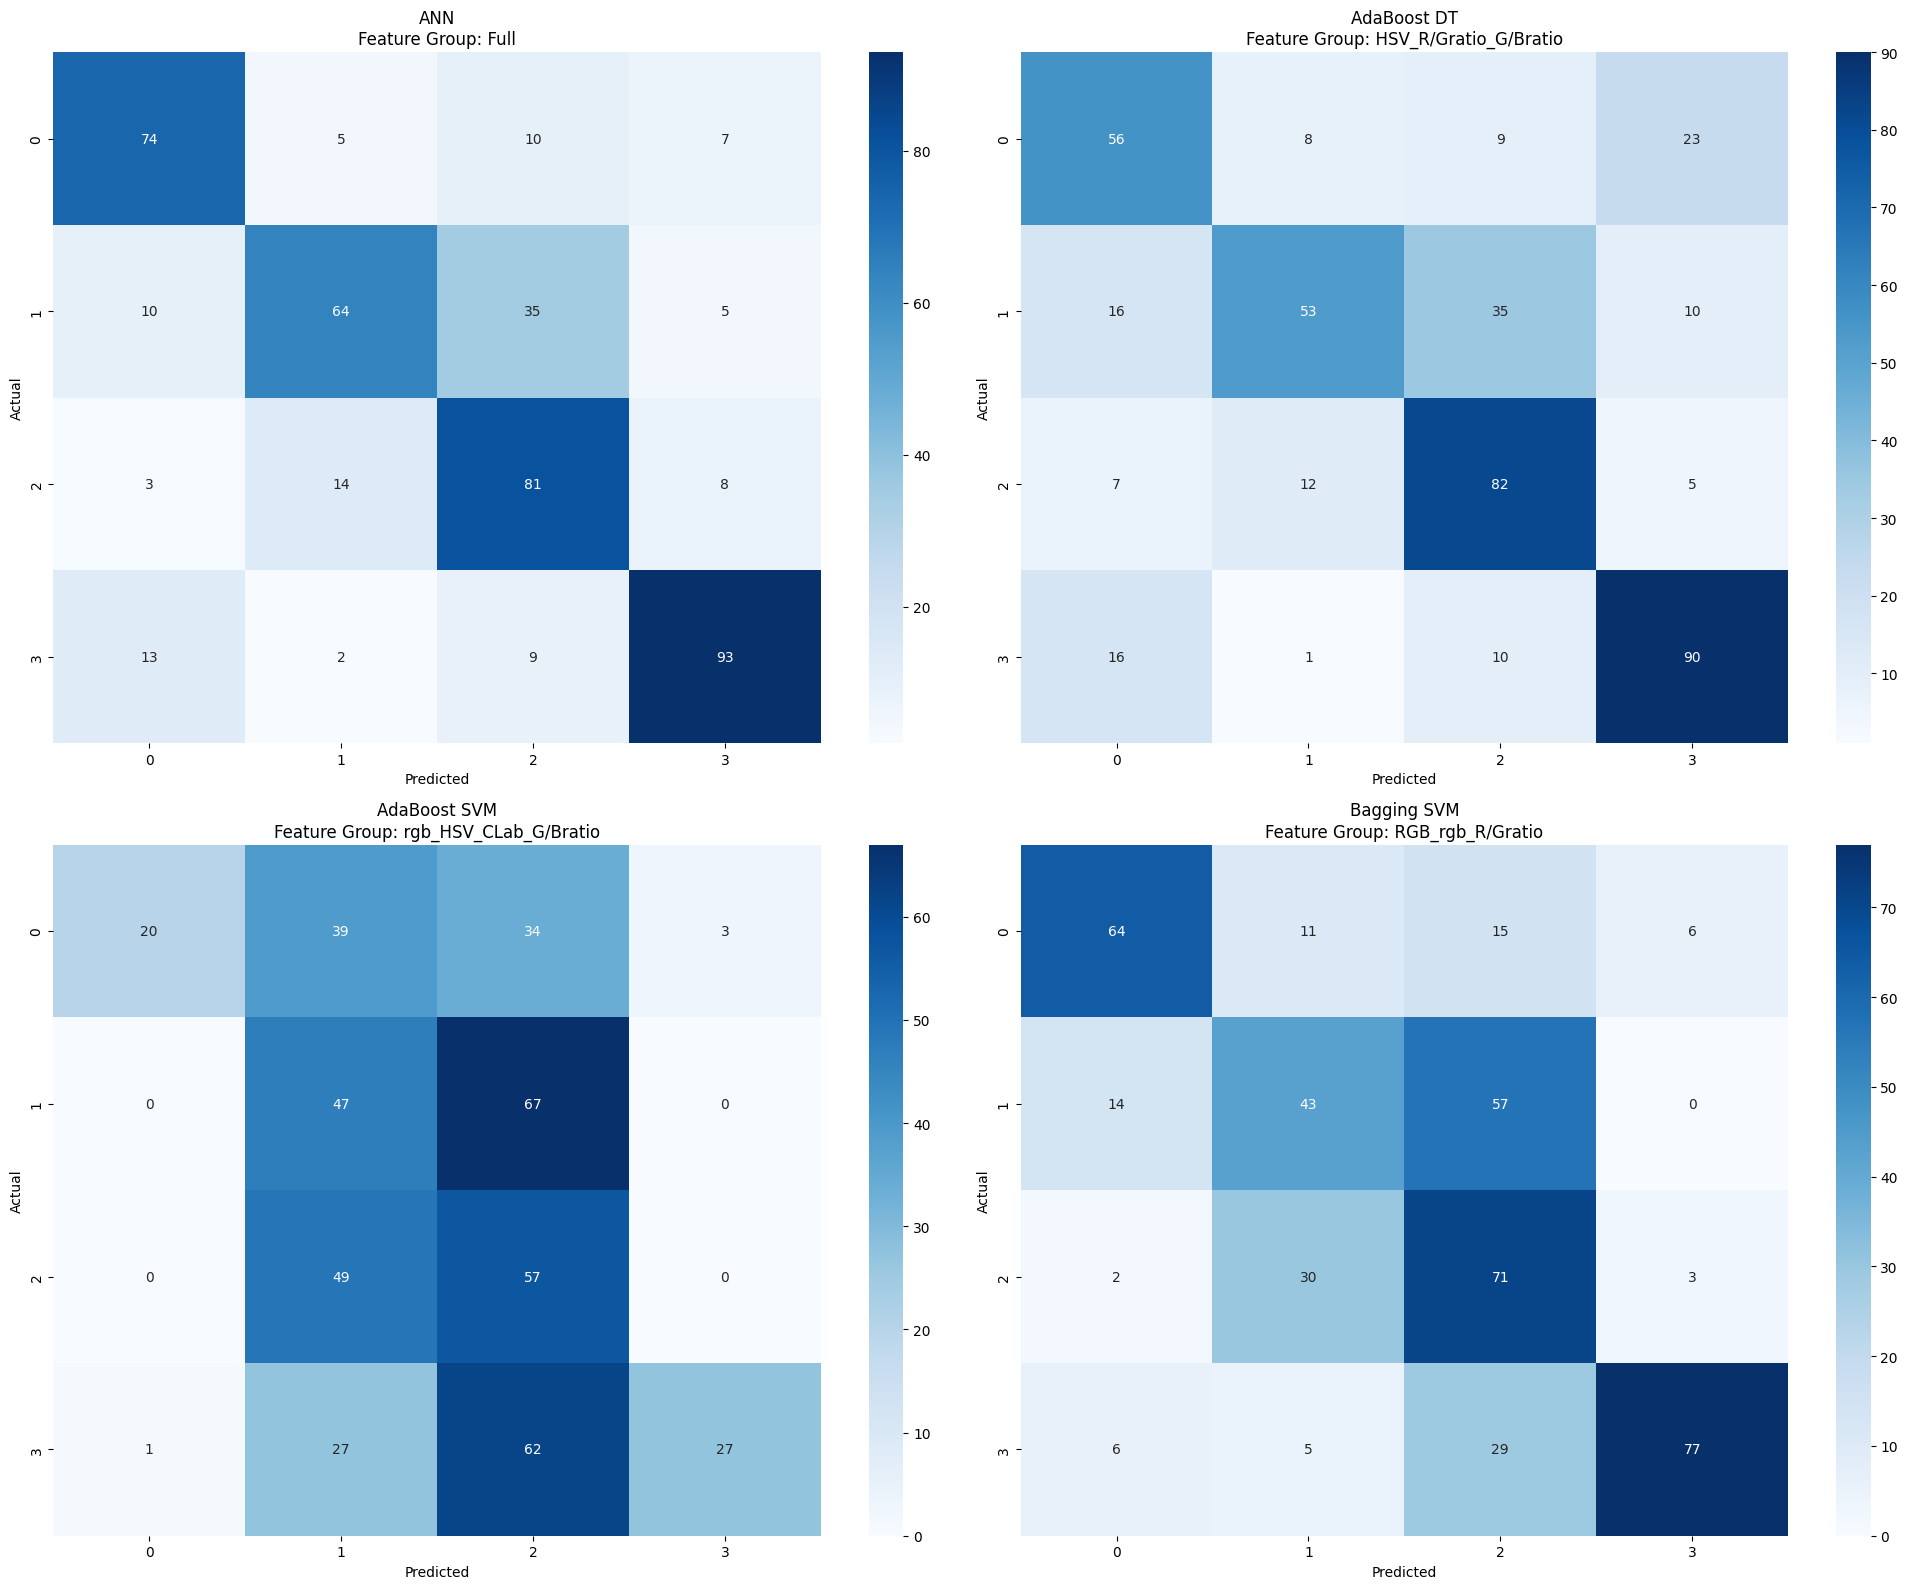

In [ ]:
visualize_top_feature_combinations(
    data_prep=data_prep,
    results=results_dict_gb,
    metrics_df=metrics_dict_gb,
    models=model_names,
    method='gb'
)

### **Seleksi Fitur**

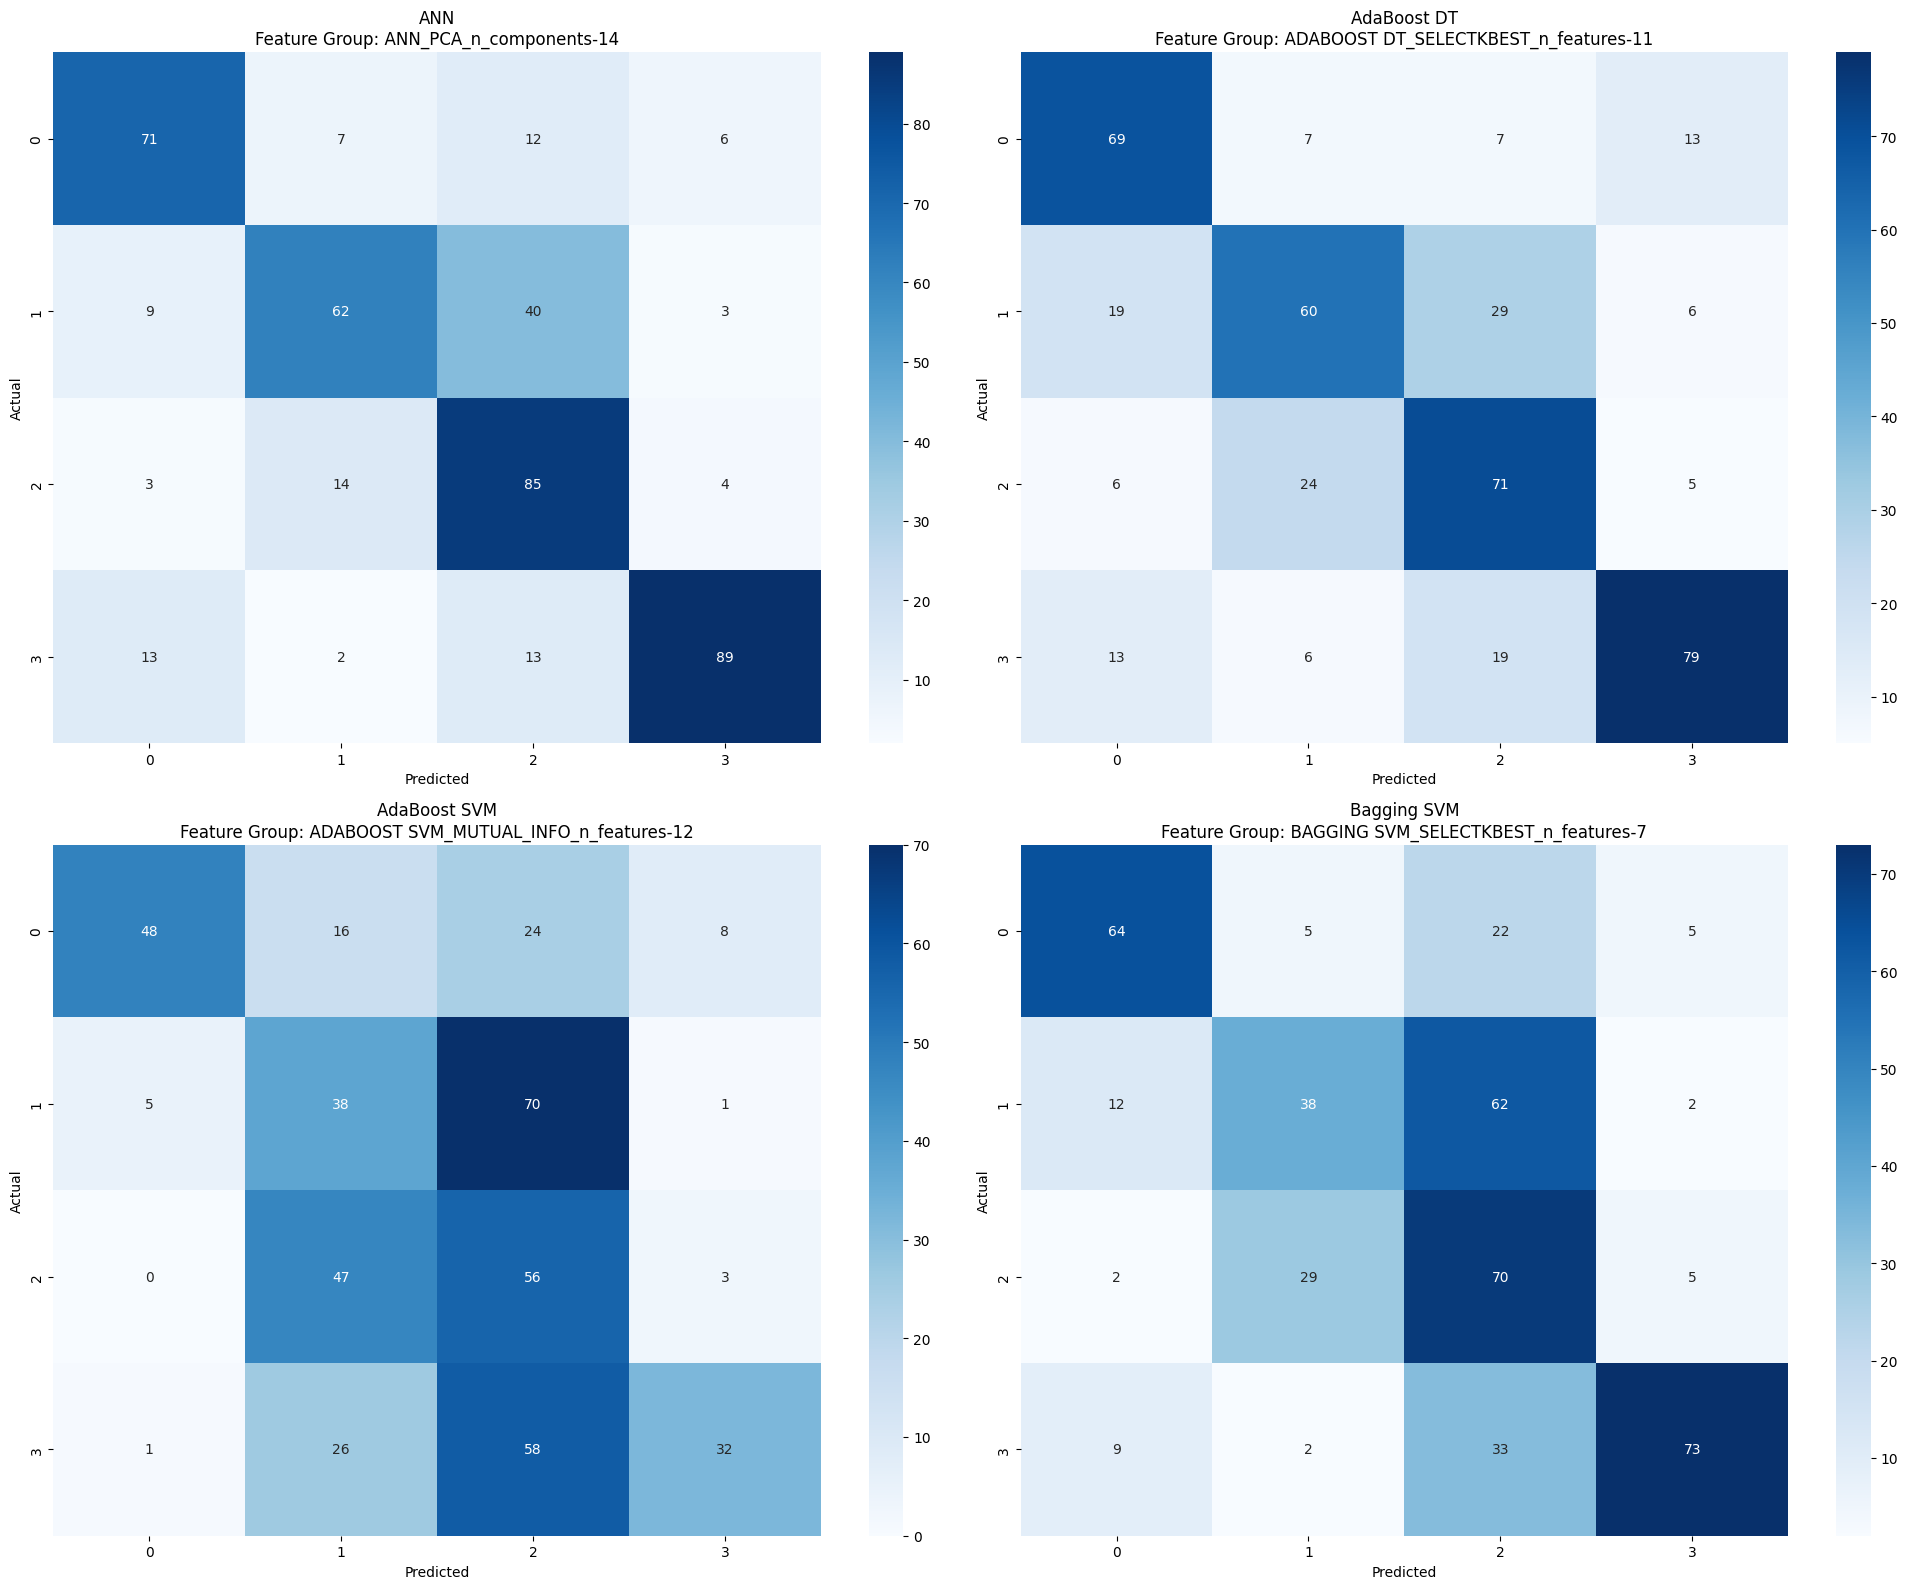

In [ ]:
visualize_top_feature_combinations(
    data_prep=data_prep_selection,
    results=results_fs,
    metrics_df=metrics_dict_fs,
    models=model_names,
    method='ag'
)

### **Hyperparameter Tuning**

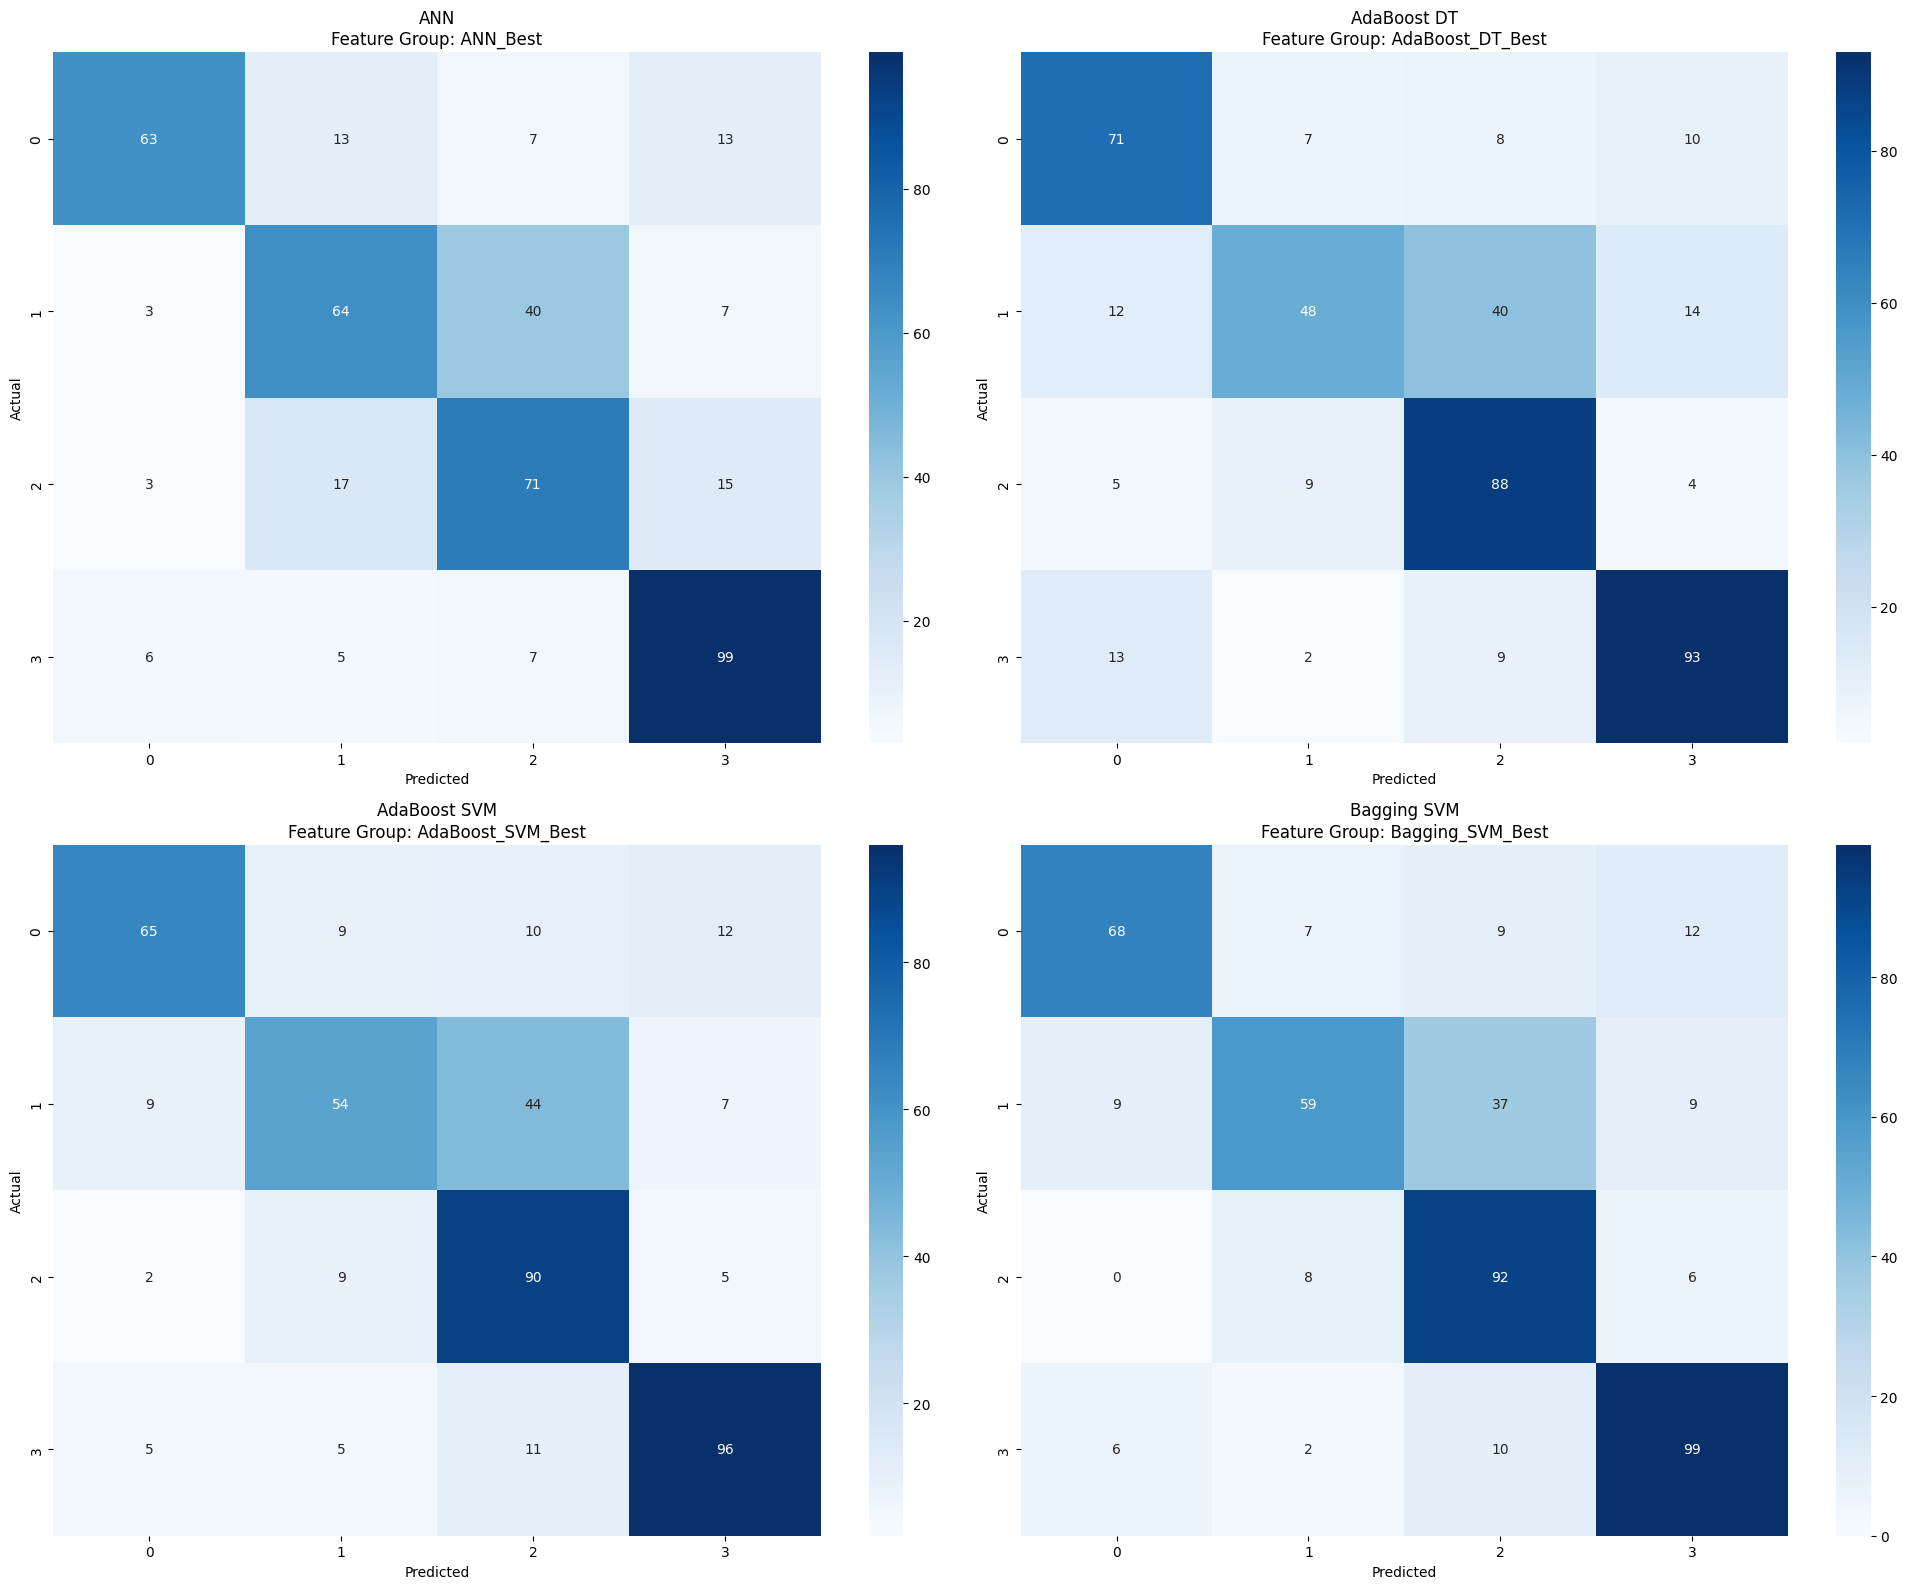

In [ ]:
visualize_top_feature_combinations(
    data_prep=data_prep_finetuning,
    results=results_dict_ht,
    metrics_df=metrics_df_final_dict_ht,
    models=model_names,
    method='ht'
)

## **ROC-AUC**

### **Fungsi ROC-AUC**

In [ ]:
def plot_roc_per_class(results, data_prep, metrics_df, models=None, method='gb', top_n=4):
    if models is None:
        models = metrics_df['Model'].unique().tolist()

    # Ambil sample y_test untuk cek jumlah kelas
    first_model = models[0]
    top_group_for_first = metrics_df[metrics_df['Model'] == first_model].nlargest(1, 'Test Accuracy')['Feature Group'].iloc[0]

    if method == 'gb':
        y_test_sample = data_prep[top_group_for_first]['y_test']
    elif method == 'ag':
        y_test_sample = data_prep['y_test']
    elif method == 'ht':
        y_test_sample = data_prep[top_group_for_first]['y_test']
    classes = np.unique(y_test_sample)
    n_classes = len(classes)

    # Setup figure dengan grid: 2 kolom per baris
    n_cols = 2
    n_rows = (n_classes + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten agar mudah diiterasi

    # Warna untuk setiap model
    model_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']
    model_color_map = {model: model_colors[i % len(model_colors)] for i, model in enumerate(models)}

    # Loop tiap kelas
    for cls_idx, class_label in enumerate(classes):
        ax = axes[cls_idx]
        ax.set_title(f"Class {class_label} - ROC Curve (All Models)")

        # Loop tiap model
        for model_name in models:
            color = model_color_map[model_name]

            # Ambil grup terbaik untuk model ini
            top_group = metrics_df[metrics_df['Model'] == model_name].nlargest(1, 'Test Accuracy')['Feature Group'].iloc[0]

            # Akses y_test dan y_prob sesuai method
            if method == 'gb':
                if top_group not in data_prep:
                    print(f"Skipping {model_name} ({top_group}): tidak ditemukan di data_prep")
                    continue
                y_test = data_prep[top_group]['y_test']
                y_prob = results[model_name][top_group]['test_results']['y_prob']
            elif method == 'ag':
                y_test = data_prep['y_test']
                y_prob = results[model_name][top_group]['test_results']['y_prob']
            elif method == 'ht':
                y_test = data_prep[top_group]['y_test']
                y_prob = results[model_name][top_group]['test_prob']

            # Binarize y_test untuk kelas tertentu
            y_test_bin = label_binarize(y_test, classes=classes)[:, cls_idx]

            # Hitung FPR, TPR, dan AUC
            fpr, tpr, _ = roc_curve(y_test_bin, y_prob[:, cls_idx])
            roc_auc = auc(fpr, tpr)

            # Plot ROC Curve
            ax.plot(
                fpr, tpr,
                color=color,
                lw=1.5,
                linestyle='-',
                label=f'{model_name} ({top_group}, AUC = {roc_auc:.2f})'
            )

        # Tambahkan diagonal reference line
        ax.plot([0, 1], [0, 1], 'k--', lw=1.5)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc="lower right")

    # Nonaktifkan axis kosong jika jumlah kelas ganjil
    for i in range(len(classes), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### **Gabungan Fitur**

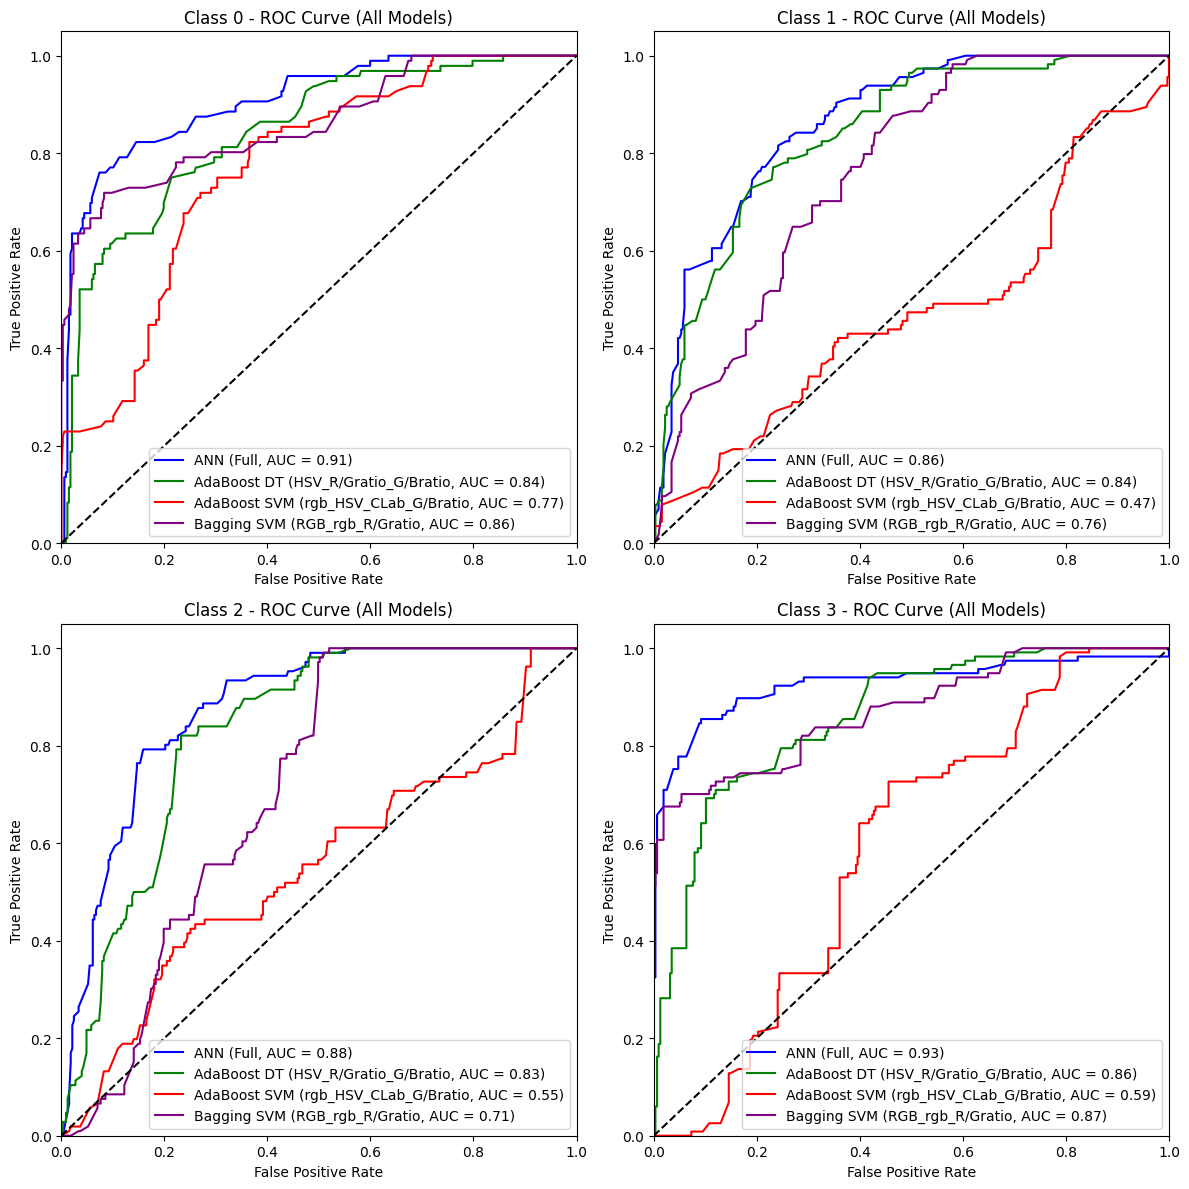

In [ ]:
plot_roc_per_class(
    results=results_dict_gb,
    data_prep=data_prep,
    metrics_df=metrics_dict_gb,
    models=model_names,
    method='gb'
)

### **Seleksi Fitur**

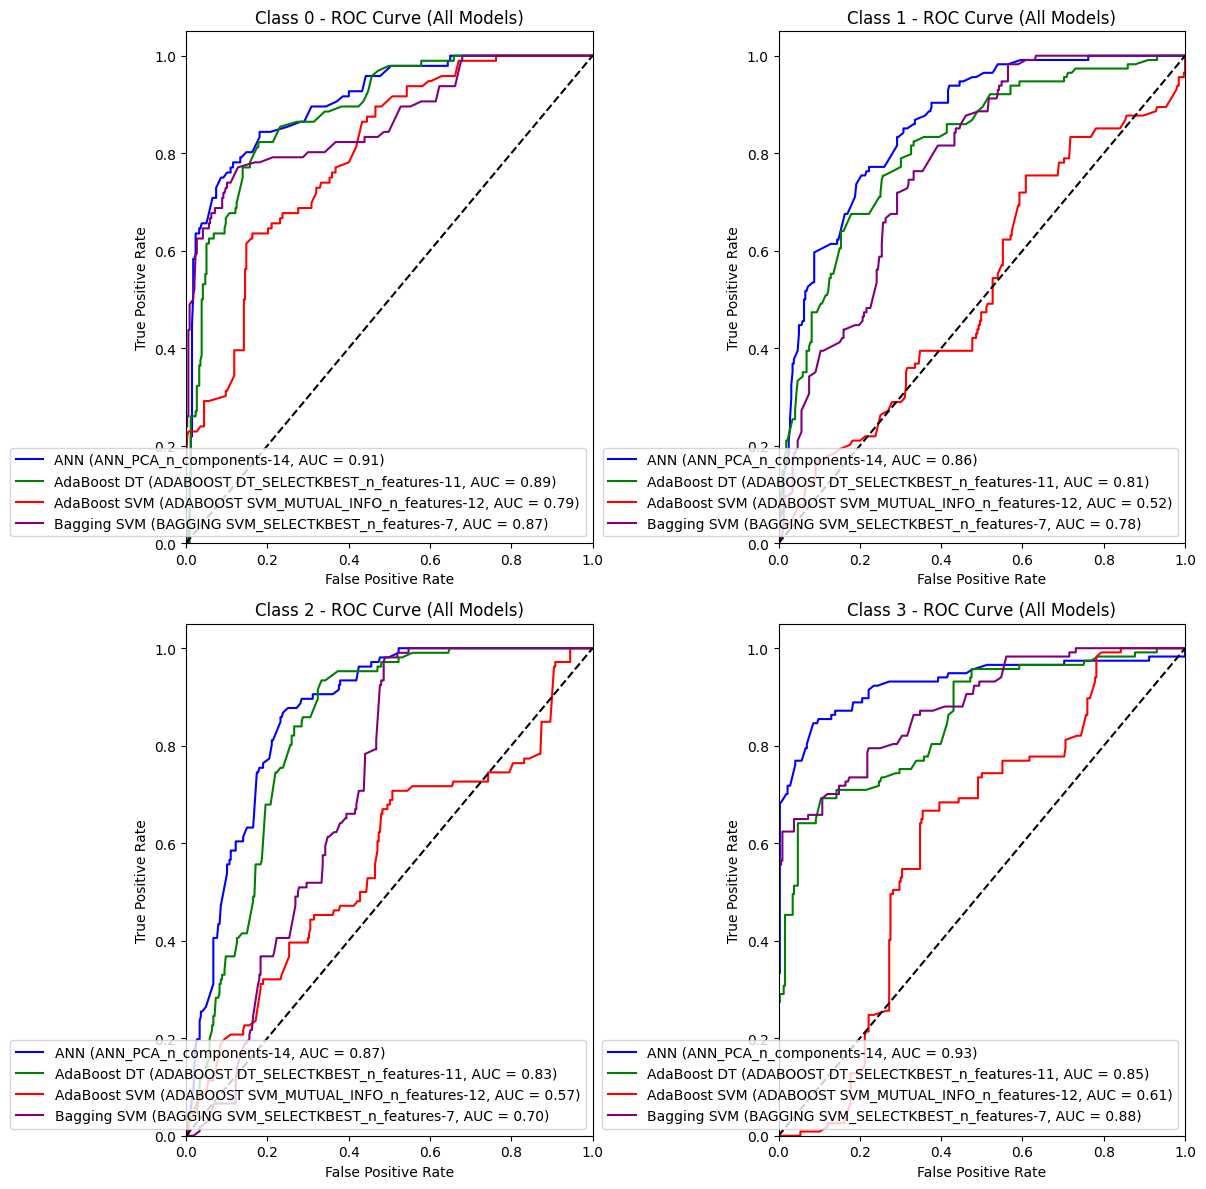

In [ ]:
plot_roc_per_class(
    results=results_fs,
    data_prep=data_prep_selection,
    metrics_df=metrics_dict_fs,
    models=model_names,
    method='ag'
)

### **Hyperparameter Tuning**

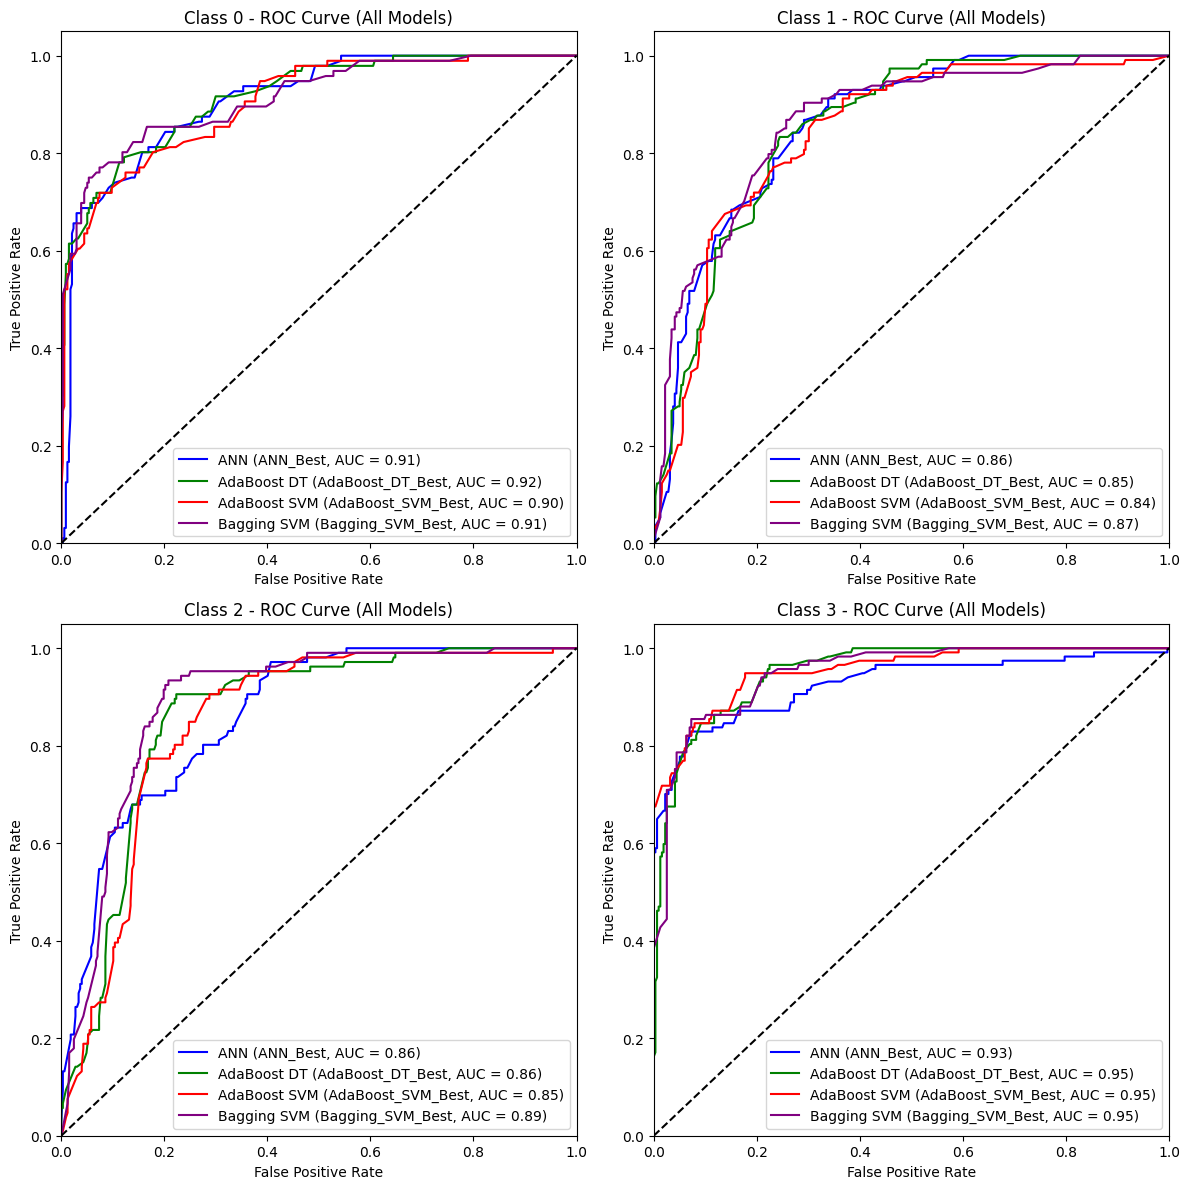

In [ ]:
plot_roc_per_class(
    results=results_dict_ht,
    data_prep=data_prep_finetuning,
    metrics_df=metrics_df_final_dict_ht,
    models=model_names,
    method='ht'
)

## **Classification Report**

### **Fungsi Classification Report**

In [ ]:
def visualize_model_feature_metrics(all_metrics_df, model_names, top_n=1):

    def get_metric_column(df, metric_name):
        """Mencari kolom metrik yang sesuai (Test atau Val)."""
        if f"Test {metric_name}" in df.columns:
            return f"Test {metric_name}"
        elif f"Val {metric_name}" in df.columns:
            return f"Val {metric_name}"
        else:
            raise KeyError(f"Kolom untuk '{metric_name}' tidak ditemukan dalam DataFrame.")

    n_models = len(model_names)

    # Atur layout grid berdasarkan jumlah model
    cols_per_row = 2 if n_models > 1 else 1  # Jika banyak model, 2 kolom per baris
    rows = (n_models + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 4))
    
    # Flatten axes agar mudah diiterasi
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    plot_idx = 0  # Indeks subplot

    for model_name in model_names:
        # Filter data untuk model tertentu
        model_df = all_metrics_df[all_metrics_df['Model'] == model_name]
        if model_df.empty:
            raise ValueError(f"Tidak ada data untuk model '{model_name}' dalam DataFrame.")

        # Ambil top_n kombinasi fitur berdasarkan Test Accuracy
        accuracy_col = get_metric_column(model_df, "Accuracy")
        top_features_df = model_df.nlargest(top_n, accuracy_col)
        feature_group = top_features_df.iloc[0]['Feature Group']

        ax = axes[plot_idx]

        # Ambil metrik
        metrics = top_features_df.iloc[0]
        labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        values = [
            metrics[get_metric_column(model_df, "Accuracy")],
            metrics[get_metric_column(model_df, "Precision")],
            metrics[get_metric_column(model_df, "Recall")],
            metrics[get_metric_column(model_df, "F1-Score")]
        ]

        # Plot barchart
        bars = sns.barplot(x=labels, y=values, ax=ax, palette='tab10',hue=labels)
        ax.set_title(f"{model_name} - {feature_group}")
        ax.set_ylim(0, 1)
        ax.set_ylabel('Score')
        ax.set_xlabel('Metrics')
        ax.grid(axis='y')

        # Label persentase di atas bar
        for bar, value in zip(bars.patches, values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{value:.2%}",
                ha='center',
                va='bottom',
                fontsize=10
            )

        plot_idx += 1

    # Hapus subplot kosong jika ada
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### **Gabungan Fitur**

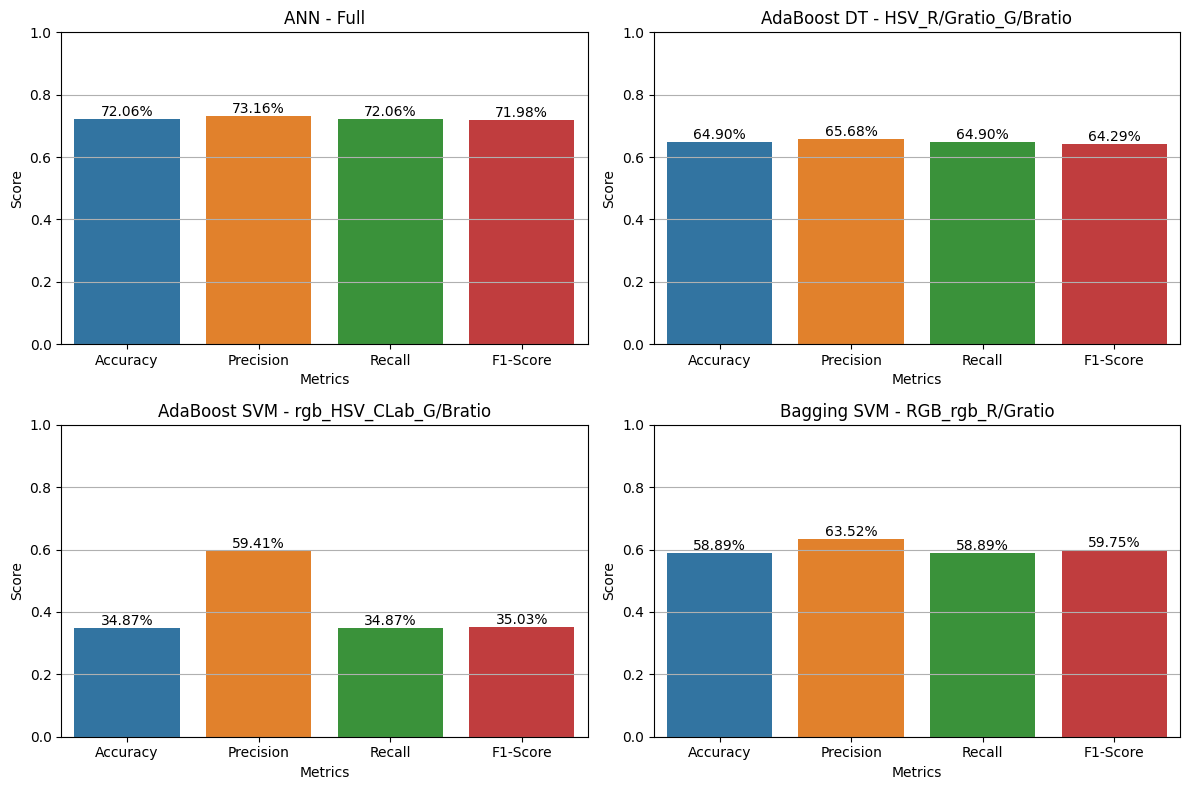

In [ ]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_gb,
    model_names=model_names,
)

### **Seleksi Fitur**

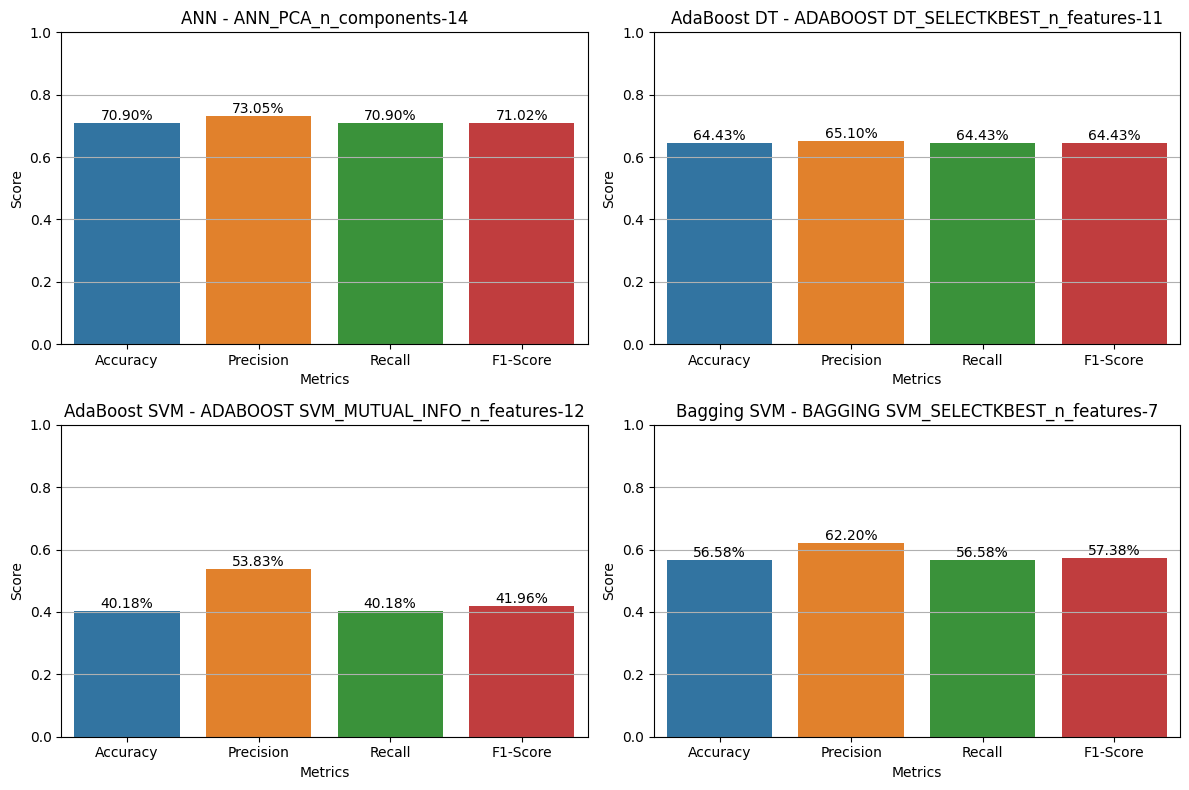

In [ ]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_fs,
    model_names=model_names,
)

### **Hyperparameter Tuning**

#### **Cross Validation**

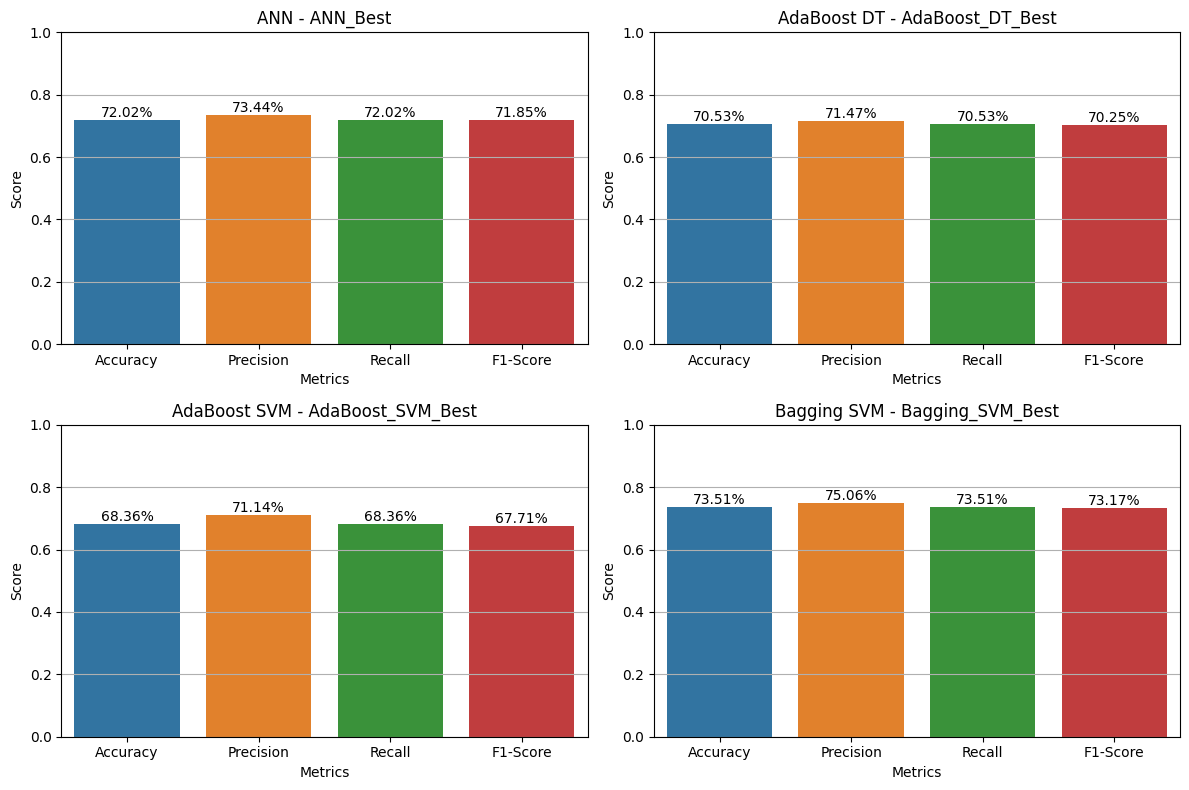

In [ ]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dicts_average_cv,
    model_names=model_names,
)

#### **Final Model**

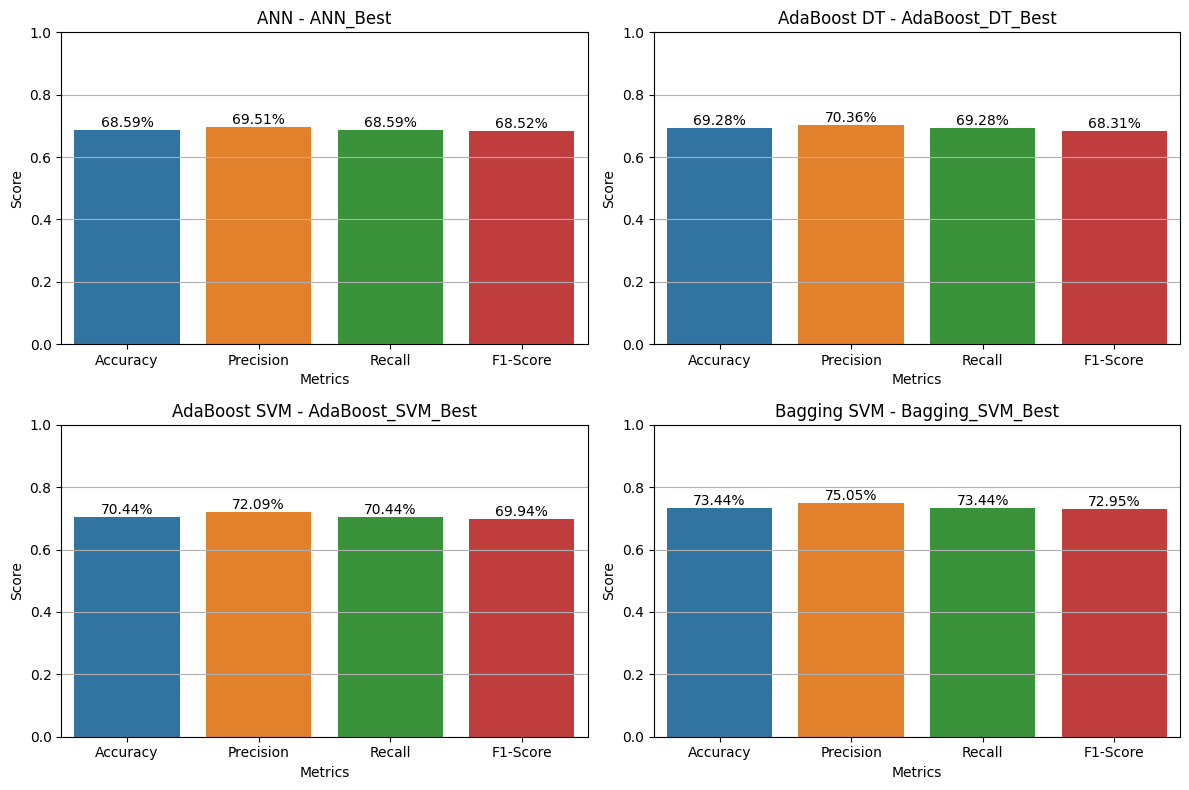

In [ ]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_df_final_dict_ht,
    model_names=model_names,
)

# **UJI COBA**

### **Percobaan ANN**

In [ ]:
import random
import os
import tensorflow as tf

SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.neural_network import MLPClassifier

# Utility function untuk membuat dan melatih model ANN
def create_and_train_ann(X_train, y_train, X_val=None, y_val=None, num_classes=None):
    print("=== Melatih Model ANN dengan MLPClassifier (Tanpa Scaler) ===")
    
    # Jika tidak ada validasi, gunakan sebagian training sebagai validasi
    if X_val is None or y_val is None:
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )

    # Parameter default sesuai spesifikasi
    default_params = {
        "hidden_layer_sizes": (100, 50),
        "activation": "relu",
        "solver": "adam",
        "alpha": 0.0001,         # L2 regularization strength
        "batch_size": 32,
        "max_iter": 1000,
        "early_stopping": True,  # Gunakan early stopping
        "random_state": 42,
        "verbose": False
    }

    # Buat model
    model = MLPClassifier(**default_params)

    # Latih model
    model.fit(X_train, y_train)

    # Evaluasi
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)

    print(f"Akurasi Training: {train_acc:.4f}")
    print(f"Akurasi Validasi: {val_acc:.4f}")

    # Simulasi history seperti Keras untuk kompatibilitas
    history = {
        'accuracy': [train_acc],
        'val_accuracy': [val_acc],
        'loss': [model.loss_],
    }

    return model, history

# 1. RAW FEATURES
def select_features_raw(X_train, X_test, y_train, feature_names):
    print("Menggunakan fitur asli (tanpa ekstraksi/seleksi)")
    print(f"Jumlah fitur: {X_train.shape[1]}")
    print(f"Fitur yang digunakan: {feature_names}")
    
    return X_train, X_test, feature_names

# 2. PCA
def select_features_pca(X_train, X_test, y_train, feature_names, n_components=8):
    
    # Menerapkan PCA
    pca = PCA(n_components=min(n_components, X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    print("Fitur yang dipilih dengan PCA:")
    
    # Print variance explained
    explained_variance = pca.explained_variance_ratio_
    print("Variance Explained oleh komponen PCA:")
    for i, var in enumerate(explained_variance):
        print(f"PC{i+1}: {var:.4f}")
    print(f"Total: {sum(explained_variance):.4f}")
    
    # Visualisasi loading factors (opsional)
    print("\nLoading factors (kontribusi fitur asli ke PC):")
    for i in range(min(3, len(explained_variance))):  # hanya 3 PC pertama
        print(f"\nPC{i+1} coefficients:")
        # Urutkan berdasarkan nilai absolut
        coeffs = pca.components_[i]
        sorted_indices = np.argsort(np.abs(coeffs))[::-1]  # Descending order
        for idx in sorted_indices[:5]:  # top 5 fitur
            print(f"  {feature_names[idx]}: {coeffs[idx]:.4f}")
    
    return X_train_pca, X_test_pca, [f"PC{i+1}" for i in range(pca.n_components_)]

# 3. LDA
def select_features_lda(X_train, X_test, y_train, feature_names, n_components=None):
    
    # Menentukan jumlah komponen
    n_classes = len(np.unique(y_train))
    if n_components is None:
        n_components = min(n_classes-1, X_train.shape[1])
    else:
        n_components = min(n_classes-1, n_components, X_train.shape[1])
    
    # Menerapkan LDA
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    
    print("Fitur yang dipilih dengan LDA:")
    print("Discriminant Analysis:")
    for i in range(n_components):
        print(f"LD{i+1} explains discrimination between classes")
    
    # Tampilkan koefisien transformasi
    print("\nKontribusi fitur asli ke komponen LDA:")
    for i in range(n_components):
        print(f"\nLD{i+1} coefficients:")
        # Urutkan koefisien berdasarkan nilai absolut
        coeffs = lda.scalings_[:, i]
        sorted_indices = np.argsort(np.abs(coeffs))[::-1]  # Descending order
        for idx in sorted_indices:
            print(f"  {feature_names[idx]}: {coeffs[idx]:.4f}")
    
    return X_train_lda, X_test_lda, [f"LD{i+1}" for i in range(n_components)]

# 4. Kernel PCA
def select_features_kernel_pca(X_train, X_test, y_train, feature_names, n_components=8):
    
    # Menerapkan Kernel PCA
    kpca = KernelPCA(
        n_components=min(n_components, X_train.shape[1]),
        kernel='rbf',  # Gaussian kernel
        gamma=None  # 1/n_features by default
    )
    
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)
    
    print("Fitur yang dipilih dengan Kernel PCA:")
    print(f"Jumlah komponen: {kpca.n_components}")
    print(f"Kernel: RBF (Gaussian)")
    
    # Variance explained tidak tersedia untuk Kernel PCA
    if hasattr(kpca, 'lambdas_'):
        explained_var = kpca.lambdas_ / np.sum(kpca.lambdas_)
        print("\nApproximate variance explained:")
        for i, var in enumerate(explained_var[:min(5, len(explained_var))]):
            print(f"Component {i+1}: {var:.4f}")
    
    return X_train_kpca, X_test_kpca, [f"KPCA{i+1}" for i in range(kpca.n_components)]

# 5. Autoencoder untuk ekstraksi fitur
def select_features_autoencoder(X_train, X_test, y_train, feature_names, encoding_dim=5):
    
    # Dimensi input
    input_dim = X_train.shape[1]
    
    # Define encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(min(input_dim*2, 64), activation='relu')(input_layer)
    encoded = Dense(min(input_dim, 32), activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu', name='bottleneck')(encoded)
    
    # Define decoder untuk training
    decoded = Dense(min(input_dim, 32), activation='relu')(encoded)
    decoded = Dense(min(input_dim*2, 64), activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)
    
    # Define autoencoder
    autoencoder = Model(input_layer, output_layer)
    encoder = Model(input_layer, encoded)
    
    # Compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')
    
    # Early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Train autoencoder
    print("Melatih autoencoder untuk ekstraksi fitur...")
    history = autoencoder.fit(
        X_train, X_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Extract features
    X_train_encoded = encoder.predict(X_train)
    X_test_encoded = encoder.predict(X_test)
    
    print("Fitur yang dipilih dengan Autoencoder:")
    print(f"Jumlah fitur laten: {encoding_dim}")
    print(f"Arsitektur autoencoder: {input_dim} -> {min(input_dim*2, 64)} -> {min(input_dim, 32)} -> {encoding_dim}")
    print(f"Training loss: {history.history['loss'][-1]:.4f}")
    print(f"Validation loss: {history.history['val_loss'][-1]:.4f}")
    
    return X_train_encoded, X_test_encoded, [f"AE{i+1}" for i in range(encoding_dim)]

# 6. SelectKBest (filter method)
def select_features_kbest(X_train, X_test, y_train, feature_names, k=8):
    
    # Menerapkan SelectKBest dengan f_classif (ANOVA)
    selector = SelectKBest(f_classif, k=min(k, X_train.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Mendapatkan fitur yang terpilih
    selected_indices = selector.get_support(indices=True)
    selected_features = [feature_names[i] for i in selected_indices]
    
    print("Fitur yang dipilih dengan SelectKBest (ANOVA f-value):")
    print(f"Jumlah fitur terpilih: {len(selected_features)}")
    print(f"Fitur terpilih: {selected_features}")
    
    # Tampilkan skor fitur
    print("\nSkor fitur berdasarkan ANOVA F-value:")
    for i, score in enumerate(selector.scores_):
        if i in selected_indices:
            print(f"  {feature_names[i]}: {score:.4f} (TERPILIH)")
        else:
            print(f"  {feature_names[i]}: {score:.4f}")
    
    return X_train_selected, X_test_selected, selected_features

# 7. RFE (wrapper method)
def select_features_rfe(X_train, X_test, y_train, feature_names, n_features=8):
    
    # Menggunakan LogisticRegression sebagai estimator
    estimator = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs',random_state=42)
    
    # Menerapkan RFE
    selector = RFE(estimator, n_features_to_select=min(n_features, X_train.shape[1]), step=1)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Mendapatkan fitur terpilih
    selected_indices = selector.get_support(indices=True)
    selected_features = [feature_names[i] for i in selected_indices]
    
    print("Fitur yang dipilih dengan RFE:")
    print(f"Jumlah fitur terpilih: {len(selected_features)}")
    print(f"Fitur terpilih: {selected_features}")
    
    # Tampilkan ranking fitur
    print("\nRanking fitur (1 = terpilih):")
    for i, rank in enumerate(selector.ranking_):
        if rank == 1:
            print(f"  {feature_names[i]}: {rank} (TERPILIH)")
        else:
            print(f"  {feature_names[i]}: {rank}")
    
    return X_train_selected, X_test_selected, selected_features

# 8. Gabungan PCA dan LDA
def select_features_pca_lda(X_train, X_test, y_train, feature_names, n_pca=5, n_lda=3):
    
    # 1. Menerapkan PCA
    pca = PCA(n_components=min(n_pca, X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # 2. Menerapkan LDA pada hasil PCA
    n_classes = len(np.unique(y_train))
    n_components_lda = min(n_classes-1, n_lda, n_pca)
    
    lda = LDA(n_components=n_components_lda)
    X_train_pca_lda = lda.fit_transform(X_train_pca, y_train)
    X_test_pca_lda = lda.transform(X_test_pca)
    
    print("Fitur yang dipilih dengan PCA+LDA:")
    print(f"Jumlah komponen PCA: {n_pca}")
    print(f"Jumlah komponen LDA: {n_components_lda}")
    
    # Print variance explained PCA
    explained_variance = pca.explained_variance_ratio_
    print("\nVariance Explained oleh komponen PCA:")
    for i, var in enumerate(explained_variance):
        print(f"PC{i+1}: {var:.4f}")
    print(f"Total: {sum(explained_variance):.4f}")
    
    # Tampilkan koefisien LDA
    print("\nKontribusi komponen PCA ke komponen LDA:")
    for i in range(n_components_lda):
        print(f"\nLD{i+1} coefficients:")
        coeffs = lda.scalings_[:, i]
        sorted_indices = np.argsort(np.abs(coeffs))[::-1]
        for j, idx in enumerate(sorted_indices):
            print(f"  PC{idx+1}: {coeffs[idx]:.4f}")
    
    return X_train_pca_lda, X_test_pca_lda, [f"PCA_LD{i+1}" for i in range(n_components_lda)]


In [ ]:
def evaluate_method(X_train, X_test, y_train, y_test, method_name, feature_names, n_components=5):
    print(f"\n{'='*30}")
    print(f"Evaluasi metode: {method_name} (tanpa cross-validation)")
    print(f"{'='*30}")

    # Memilih fitur berdasarkan metode
    if method_name == 'raw':
        X_train_feat, X_test_feat, _ = select_features_raw(X_train, X_test, y_train, feature_names)
    elif method_name == 'pca':
        X_train_feat, X_test_feat, _ = select_features_pca(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'lda':
        X_train_feat, X_test_feat, _ = select_features_lda(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'kernel_pca':
        X_train_feat, X_test_feat, _ = select_features_kernel_pca(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'autoencoder':
        X_train_feat, X_test_feat, _ = select_features_autoencoder(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'kbest':
        X_train_feat, X_test_feat, _ = select_features_kbest(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'rfe':
        X_train_feat, X_test_feat, _ = select_features_rfe(X_train, X_test, y_train, feature_names, n_components)
    elif method_name == 'pca_lda':
        X_train_feat, X_test_feat, _ = select_features_pca_lda(X_train, X_test, y_train, feature_names, n_pca=8, n_lda=n_components)
    else:
        print(f"Metode '{method_name}' tidak valid.")
        return None
    
    n_classes = len(np.unique(y_train))

    model, _ = create_and_train_ann(X_train_feat, y_train, X_test_feat, y_test, n_classes)

    train_acc = model.score(X_train_feat, y_train)
    test_acc = model.score(X_test_feat, y_test)

    print(f"Akurasi Train: {train_acc:.4f}")
    print(f"Akurasi Test:  {test_acc:.4f}")
    return train_acc, test_acc

In [ ]:
def compare_feature_selection_methods(data_dict, n_components=5):
    X_train = data_dict['X_train_ann']
    X_test = data_dict['X_test_ann']
    y_train = data_dict['y_train'].values
    y_test = data_dict['y_test'].values
    feature_names = data_dict['feature_columns']

    print(f"{'='*60}")
    print("PERBANDINGAN METODE SELEKSI/EKSTRAKSI FITUR UNTUK ANN")
    print("Tanpa Cross Validation - Akurasi Train & Test Dipisah")
    print(f"{'='*60}")
    print(f"Bentuk data train: {X_train.shape}")
    print(f"Bentuk data test: {X_test.shape}")
    print(f"Jumlah kelas: {len(np.unique(y_train))}")
    print(f"Jumlah komponen untuk ekstraksi: {n_components}")

    methods = ['raw', 'pca', 'lda', 'kernel_pca', 'autoencoder', 'kbest', 'rfe', 'pca_lda']
    results = {}  # Simpan (train_acc, test_acc)

    for method in methods:
        print(f"\nMemproses metode: {method}")
        train_acc, test_acc = evaluate_method(
            X_train, X_test, y_train, y_test, method, feature_names, n_components
        )
        results[method] = (train_acc, test_acc)

    print(f"\n{'='*60}")
    print("HASIL PERBANDINGAN METODE (Train vs Test)")
    print(f"{'='*60}")
    print(f"{'Metode':<15} {'Train Acc':<12} {'Test Acc':<12}")
    print(f"{'-'*15} {'-'*12} {'-'*12}")
    
    sorted_methods = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
    
    for method, (train_acc, test_acc) in sorted_methods:
        print(f"{method:<15} {train_acc:.4f}       {test_acc:.4f}")

    best_method = sorted_methods[0][0]
    best_test_acc = sorted_methods[0][1][1]
    print(f"\nMetode terbaik: {best_method} dengan akurasi test {best_test_acc:.4f}")

    # Visualisasi akurasi test
    plt.figure(figsize=(12, 6))
    methods_names = [m for m, _ in sorted_methods]
    test_accuracies = [acc for _, (_, acc) in sorted_methods]
    train_accuracies = [acc for _, (acc, _) in sorted_methods]
    
    barWidth = 0.4
    r1 = np.arange(len(test_accuracies))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, test_accuracies, color='skyblue', width=barWidth, label='Test')
    plt.bar(r2, train_accuracies, color='salmon', width=barWidth, label='Train')

    plt.xlabel('Metode')
    plt.ylabel('Akurasi')
    plt.title('Perbandingan Akurasi Train dan Test untuk Setiap Metode')
    plt.xticks([r + barWidth / 2 for r in range(len(methods_names))], methods_names)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return best_method, results

PERBANDINGAN METODE SELEKSI/EKSTRAKSI FITUR UNTUK ANN
Tanpa Cross Validation - Akurasi Train & Test Dipisah
Bentuk data train: (1008, 14)
Bentuk data test: (433, 14)
Jumlah kelas: 4
Jumlah komponen untuk ekstraksi: 5

Memproses metode: raw

Evaluasi metode: raw (tanpa cross-validation)
Menggunakan fitur asli (tanpa ekstraksi/seleksi)
Jumlah fitur: 14
Fitur yang digunakan: ['R', 'G', 'B', 'r', 'g', 'b', 'R_G_ratio', 'G_B_ratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
=== Melatih Model ANN dengan MLPClassifier (Tanpa Scaler) ===
Akurasi Training: 0.6171
Akurasi Validasi: 0.5427
Akurasi Train: 0.6171
Akurasi Test:  0.5427

Memproses metode: pca

Evaluasi metode: pca (tanpa cross-validation)
Fitur yang dipilih dengan PCA:
Variance Explained oleh komponen PCA:
PC1: 0.5224
PC2: 0.2678
PC3: 0.1621
PC4: 0.0424
PC5: 0.0037
Total: 0.9984

Loading factors (kontribusi fitur asli ke PC):

PC1 coefficients:
  b: -0.3357
  B: -0.3357
  cL: -0.3181
  G_B_ratio: 0.2913
  r: -0.2907

PC2 coefficients:
  cb: 0

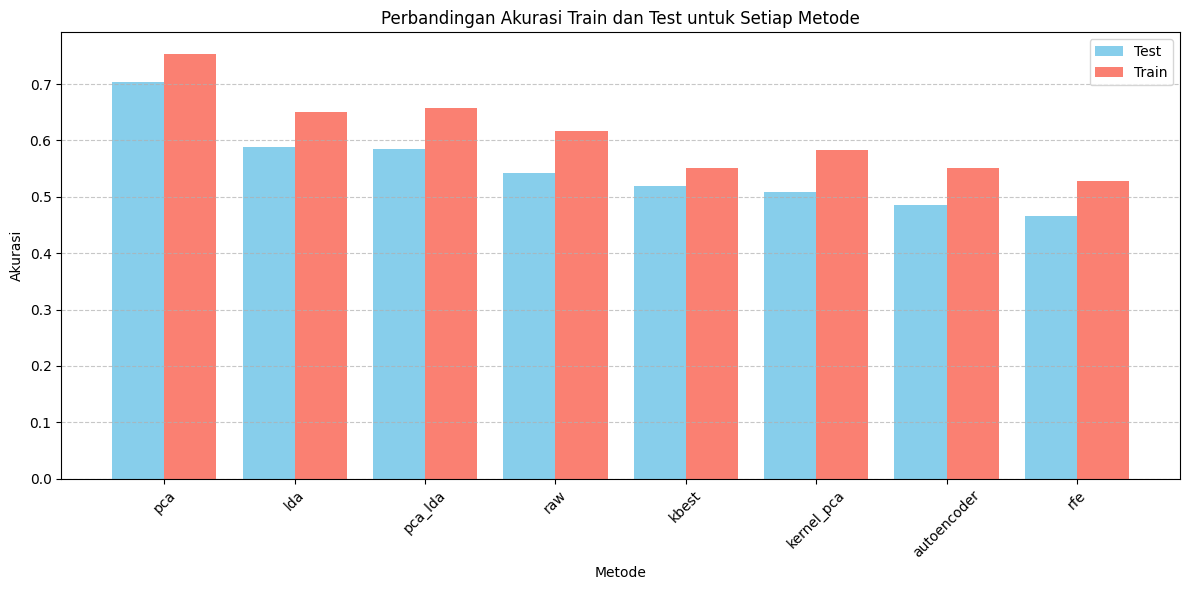

('pca',
 {'raw': (0.6170634920634921, 0.5427251732101617),
  'pca': (0.753968253968254, 0.7043879907621247),
  'lda': (0.6498015873015873, 0.5889145496535797),
  'kernel_pca': (0.5823412698412699, 0.5080831408775982),
  'autoencoder': (0.5505952380952381, 0.48498845265588914),
  'kbest': (0.5515873015873016, 0.5196304849884527),
  'rfe': (0.5287698412698413, 0.4665127020785219),
  'pca_lda': (0.6577380952380952, 0.5842956120092379)})

In [ ]:
compare_feature_selection_methods(data_prep_selection, n_components=5)